In [1]:
from loaddatastructs import *
from helperfuncs import *
from plottingfuncs import *

import matplotlib.animation as animation
from matplotlib.ticker import FormatStrFormatter
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


Compute total nitrate in gas (nitric acid) and aerosol (NO3) phases

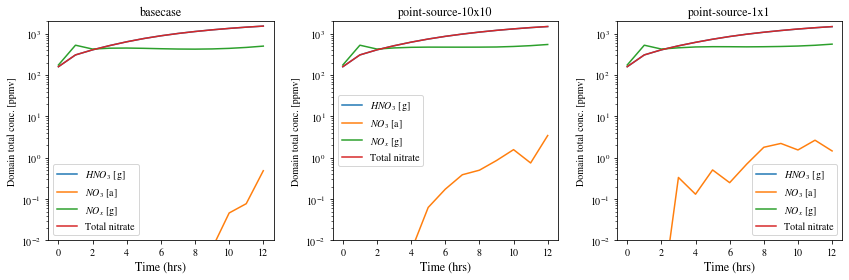

In [15]:
scenarios = ['basecase', 
             #'basecase-nochem',
             'point-source-10x10',
             'point-source-1x1' 
             #'point-source-10x10-nodep'
             ]
fig, ax = plt.subplots(1, len(scenarios), figsize=(4*len(scenarios), 4))
for i, scenario in enumerate(scenarios):
    scenario_data = aerodata_dict[scenario]['aerodata']

    nitricacid_total = (scenario_data['hno3'][:]).sum(axis=(1,2,3))
    nox_total = (scenario_data['no'][:] + scenario_data['no2'][:]).sum(axis=(1,2,3))
    #nitrate_total = scenario_data['pmc_NO3'][:].sum(axis=(1,2,3)) # aerosol species in mass conc (kg m^-3)
    #print(scenario, nitricacid_total[0])
    dry_air_molar_weight = 28.9644 # g/mol
    nitrate_molar_weight = 62.0049 # g/mol

    # convert from mass conc. [kg m^-3] to volume mixing ratio [ppmv]
    nitrate_VMR = convertMassConctoVolumeMixingRatio(scenario_data, species_name='pmc_NO3', 
                                                     species_molar_weight=nitrate_molar_weight)

    #inverse_airdens = aerodata_dict[scenario]['aerodata']['ALT'][:, :, :, :]
    #nitrate_MMR = inverse_airdens*scenario_data['pmc_NO3'][:] # mass mixing ratio of nitrate
    #nitrate_VMR = 1e6*(dry_air_molar_weight/nitrate_molar_weight)*nitrate_MMR # Volume mixing ratio in ppmv
    # need to multiply by 1e6 to convert from mol nitrate / mol air to micromol

    nitrate_total = (nitrate_VMR).sum(axis=(1,2,3))

    ax[i].plot(nitricacid_total, label='$HNO_3$ [g]')
    ax[i].plot(nitrate_total, label='$NO_3$ [a]')
    ax[i].plot(nox_total, label='$NO_x$ [g]')
    ax[i].plot(nitricacid_total + nitrate_total, label = 'Total nitrate')
    ax[i].legend()
    ax[i].set_title(scenario)
    #ax[i].set_ylim(-10, 1600)
    ax[i].set_yscale('log')
    ax[i].set_ylim(1e-2, 2000)
    ax[i].set_ylabel('Domain total conc. [ppmv]')
    ax[i].set_xlabel('Time (hrs)', fontsize=12)
    #ax[i].set_xticks(np.linspace(0, n_times-1, 7))
    #ax[i].set_xticklabels((1/12)*np.linspace(0, n_times-1, 7))
plt.tight_layout()

Compute total ammonia in gas (NH3) and aerosol (NH4) phases. The total concentration of ammonia for the point-source case is lower, largely owing to a reducing in the total amount of ammonia in the gas phase. This may be due to gas deposition - currently running a simulation with deposition turned off to determine whether this is the contributing factor.

basecase final ammonia total: 730.62
point-source-10x10 final ammonia total: 730.80
point-source-1x1 final ammonia total: 731.68


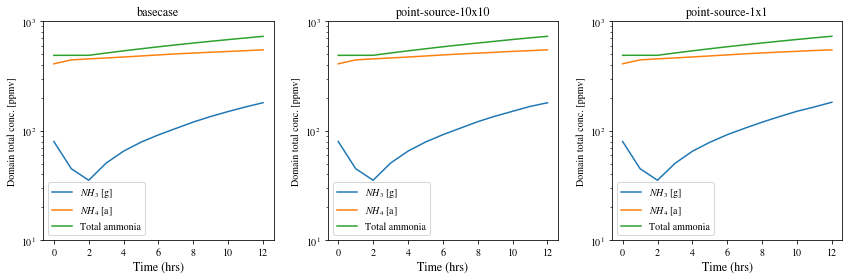

In [19]:
scenarios = ['basecase', 
             #'basecase-nochem',
             'point-source-10x10',
             'point-source-1x1' 
             #'point-source-10x10-nodep'
             ]
fig, ax = plt.subplots(1, len(scenarios), figsize=(4*len(scenarios), 4))
for i, scenario in enumerate(scenarios):
    scenario_data = aerodata_dict[scenario]['aerodata']

    ammonia_total = (scenario_data['nh3'][:, :, : :]).sum(axis=(1,2,3))
    ammonium_total = scenario_data['pmc_NH4'][:, :, : :].sum(axis=(1,2,3)) # aerosol species in mass conc (kg m^-3)

    ammonium_molar_weight = 18.04

    # convert from mass conc. [kg m^-3] to volume mixing ratio [ppmv]
    ammonium_VMR = convertMassConctoVolumeMixingRatio(scenario_data, species_name='pmc_NH4', 
                                                     species_molar_weight=ammonium_molar_weight)

    ammonium_total = (ammonium_VMR).sum(axis=(1,2,3))

    ax[i].plot(ammonia_total, label='$NH_3$ [g]')
    ax[i].plot(ammonium_total, label='$NH_4$ [a]')
    ax[i].plot(ammonia_total + ammonium_total, label = 'Total ammonia')
    ax[i].legend()
    ax[i].set_title(scenario)
    #ax[i].set_ylim(0, 800)
    ax[i].set_yscale('log')
    ax[i].set_ylim(10, 1000)
    ax[i].set_ylabel('Domain total conc. [ppmv]')
    ax[i].set_xlabel('Time (hrs)', fontsize=12)
    #ax[i].set_xticks(np.linspace(0, n_times-1, 7))
    #ax[i].set_xticklabels((1/12)*np.linspace(0, n_times-1, 7))
    total = ammonia_total + ammonium_total
    print(f'{scenario} final ammonia total: {total[-1]:6.2f}')
plt.tight_layout()

In [22]:
scenarios = [#'basecase', 
             #'basecase-nochem',
             'point-source-10x10', 
             #'point-source-10x10-nodep'
             ]
#fig, ax = plt.subplots(1, len(scenarios), figsize=(4*len(scenarios), 4))
for i, scenario in enumerate(scenarios):
    scenario_data = aerodata_dict[scenario]['aerodata']

    gasammonia_total = (scenario_data['nh3'][:])
    ammonium_total = scenario_data['pmc_NH4'][:] # aerosol species in mass conc (kg m^-3)

    ammonium_molar_weight = 18.04

    # convert from mass conc. [kg m^-3] to volume mixing ratio [ppmv]
    ammonium_VMR = convertMassConctoVolumeMixingRatio(scenario_data, species_name='pmc_NH4', 
                                                     species_molar_weight=ammonium_molar_weight)
    ammonium_total = (ammonium_VMR)

    total_ammonia = gasammonia_total + ammonium_total

    nitricacid_total = (scenario_data['hno3'][:])
    nitrate_molar_weight = 62.0049 # g/mol

    # convert from mass conc. [kg m^-3] to volume mixing ratio [ppmv]
    nitrate_VMR = convertMassConctoVolumeMixingRatio(scenario_data, species_name='pmc_NO3', 
                                                     species_molar_weight=nitrate_molar_weight)

    aeronitrate_total = (nitrate_VMR)

    total_nitrate = nitricacid_total + aeronitrate_total

    sulfate_molar_weight = 96.06 # g/mol
    sulfate_VMR = convertMassConctoVolumeMixingRatio(scenario_data, species_name='pmc_SO4', 
                                                     species_molar_weight=nitrate_molar_weight)

    """
    ax[i].plot(ammonia_total, label='$NH_3$ [g]')
    ax[i].plot(ammonium_total, label='$NH_4$ [a]')
    ax[i].plot(ammonia_total + ammonium_total, label = 'Total ammonia')
    ax[i].legend()
    ax[i].set_title(scenario)
    #ax[i].set_ylim(0, 50)
    ax[i].set_ylabel('Domain total conc. [ppmv]')
    ax[i].set_xlabel('Time (hrs)', fontsize=12)
    ax[i].set_xticks(np.linspace(0, n_times-1, 7))
    ax[i].set_xticklabels((1/12)*np.linspace(0, n_times-1, 7))
    """
#plt.tight_layout()

In [23]:
sna_ratio = (total_ammonia - 2*sulfate_VMR)/total_nitrate

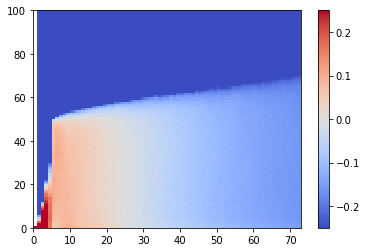

In [21]:
c = plt.pcolormesh(sna_ratio.mean(axis=(2, 3)).T, vmin=-.25, vmax=.25, cmap='coolwarm')
plt.colorbar()

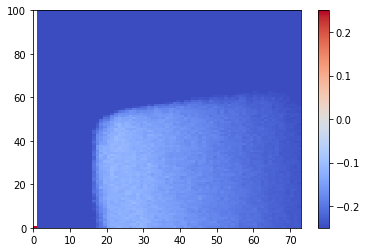

In [24]:
c = plt.pcolormesh(sna_ratio.mean(axis=(2, 3)).T, vmin=-.25, vmax=.25, cmap='coolwarm')
plt.colorbar()

Dry deposition of nitric acid (HNO3) should occur faster in the gas phase than aerosol phase. Turning off dry dep, I dont really see a major difference in nitric acid. The only difference I see is marginally less ammonia in the boundary layer when dry dep is off (which is confusing, I would have thought it would be the other way around since deposition is a sink).

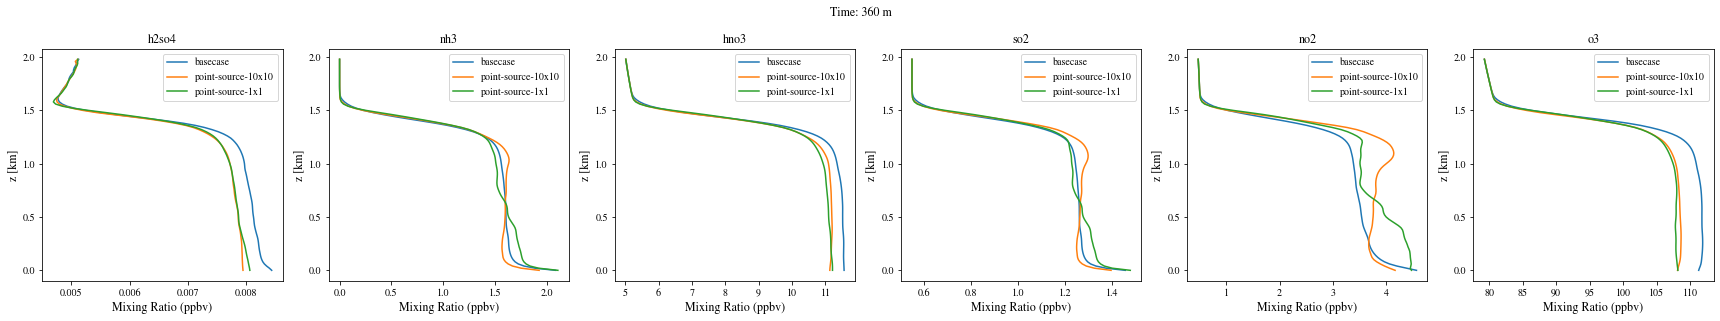

In [10]:
plotScenariosVarsVerticalProfile(scenarios=['basecase', 'point-source-10x10', 'point-source-1x1'], variables=['h2so4', 'nh3', 'hno3', 'so2', 'no2', 'o3'#'pmc_SO4'
                                                                                                              ], time=12, delta_t=30)

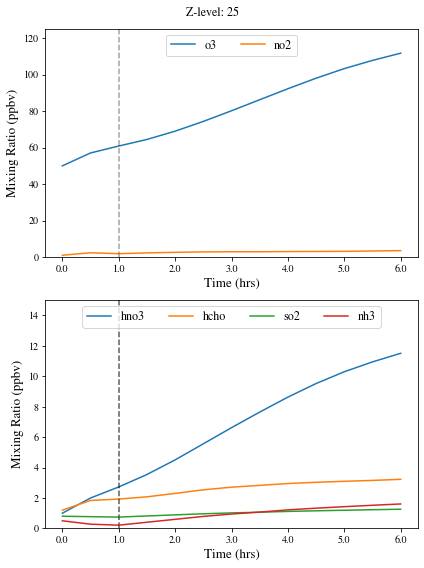

In [58]:
fig, axs  = plt.subplots(2,1, figsize=(6,8))

scenario = 'basecase'
zidx = 25
delta_t = .5
for variable in ['o3', 'no2']:
    ax = axs[0]
    times = np.arange(n_times)
    var_array = np.zeros((n_times))
    for itime in times:
        if variable in aero_vars:
            inverse_airdens = aerodata_dict[scenario]['aerodata']['ALT'][itime, zidx, :, :]
            array = 1e9*inverse_airdens*aerodata_dict[scenario]['aerodata'][variable][itime, zidx, :, :]
            var_units = 'Mixing Ratio (ppbv)'
        elif variable in gas_vars:
            array = 1000*aerodata_dict[scenario]['aerodata'][variable][itime, zidx, :, :] # convert ppmv to ppbv
            var_units = 'Mixing Ratio (ppbv)'
        elif variable in wrf_vars:
            array = aerodata_dict[scenario]['aerodata'][variable][itime, zidx, :, :]
            var_units = ''
        var_array[itime] = array.mean(axis=(0,1))
        

    ax.plot(times, var_array, label = variable)

    ax.legend(fontsize=12, ncol=2, loc='upper center')
    ax.set_ylim(0, 125)
    ax.set_xlabel('Time (hrs)', fontsize=13)
    ax.set_ylabel(f'{var_units}', fontsize=13)
    ax.set_xticks(np.arange(0, n_times, 1)[::2])
    ax.set_xticklabels(delta_t*np.arange(0, n_times, 1)[::2])
    ax.axvline(x=2.0, ls='--', c='k', alpha=.2)

for variable in ['hno3', 'hcho', 'so2', 'nh3']:
    ax = axs[1]
    times = np.arange(n_times)
    var_array = np.zeros((n_times))
    for itime in times:
        if variable in aero_vars:
            inverse_airdens = aerodata_dict[scenario]['aerodata']['ALT'][itime, zidx, :, :]
            array = 1e9*inverse_airdens*aerodata_dict[scenario]['aerodata'][variable][itime, zidx, :, :]
            var_units = 'Mixing Ratio (ppbv)'
        elif variable in gas_vars:
            array = 1000*aerodata_dict[scenario]['aerodata'][variable][itime, zidx, :, :] # convert ppmv to ppbv
            var_units = 'Mixing Ratio (ppbv)'
        elif variable in wrf_vars:
            array = aerodata_dict[scenario]['aerodata'][variable][itime, zidx, :, :]
            var_units = ''
        var_array[itime] = array.mean(axis=(0,1))
        

    ax.plot(times, var_array, label = variable)

    ax.legend(fontsize=12, ncol=4, loc='upper center')
    ax.set_ylim(0, 15)
    ax.set_xlabel('Time (hrs)', fontsize=13)
    ax.set_ylabel(f'{var_units}', fontsize=13)
    ax.set_xticks(np.arange(0, n_times, 1)[::2])
    ax.set_xticklabels(delta_t*np.arange(0, n_times, 1)[::2])
    ax.axvline(x=2.0, ls='--', c='k', alpha=.2)

plt.suptitle(f'Z-level: {zidx}')
plt.tight_layout()


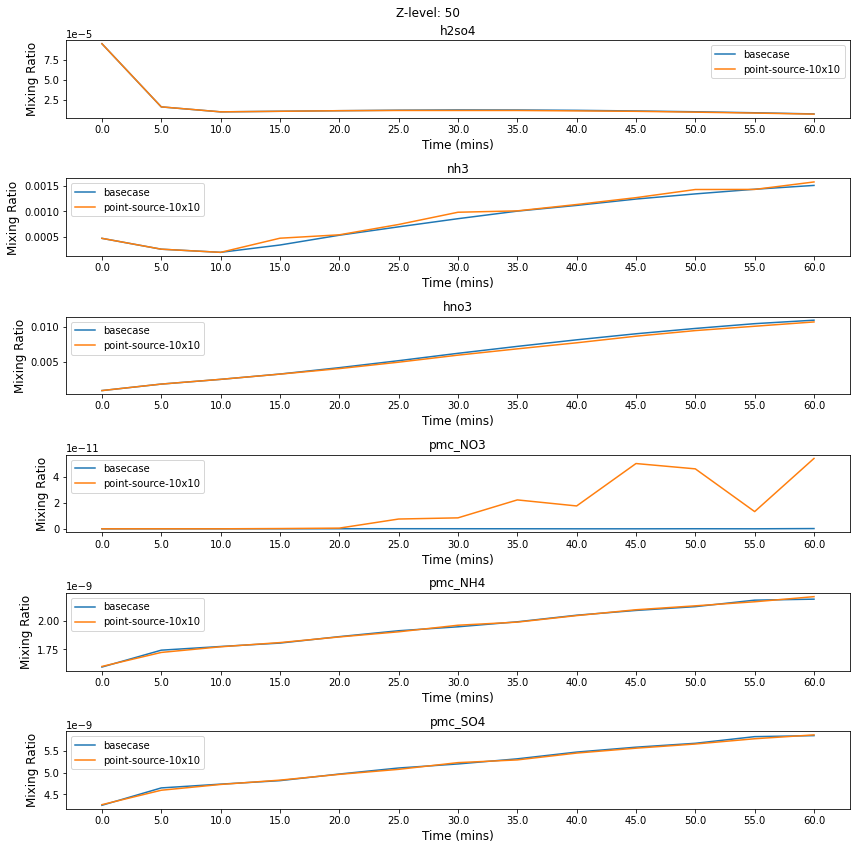

In [5]:
scenarios = ['basecase', #'basecase-nocoag', #'fx1fy0', 'road-8x', 
             'point-source-10x10', #'point-source-10x10-nocoag'
             #'point-source-10x10-nodep'
             ]
variables = ['h2so4', 'nh3', 'hno3', 'pmc_NO3', 'pmc_NH4', 'pmc_SO4']
mixingratio = True
zlevel = 50
plotScenariosVarsLevelConc(scenarios, variables, zlevel, mixingratio)

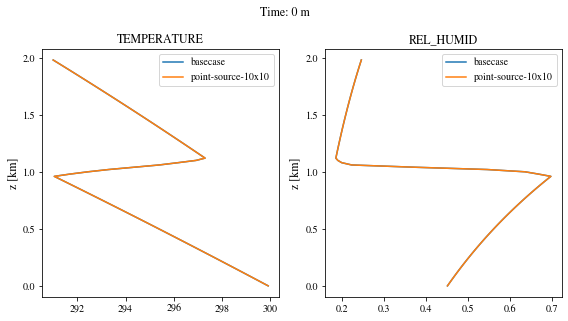

In [4]:
plotScenariosVarsVerticalProfile(scenarios=['basecase', 'point-source-10x10'], variables=['TEMPERATURE', 'REL_HUMID'], time=0, delta_t=30)

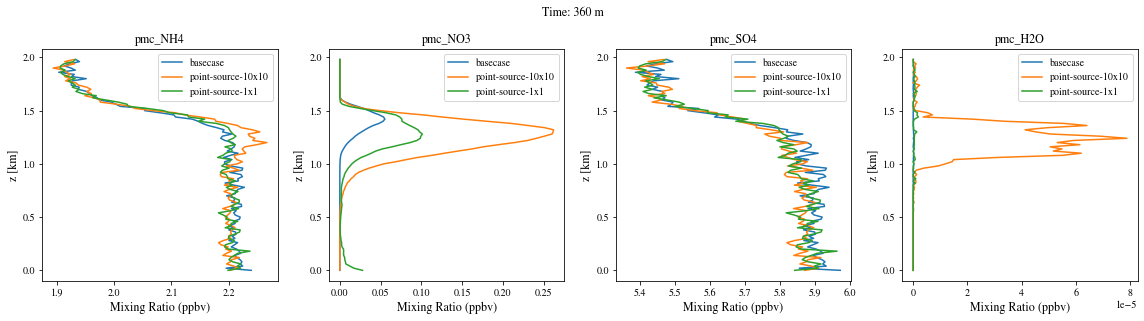

In [61]:
plotScenariosVarsVerticalProfile(scenarios=['basecase', 'point-source-10x10', 'point-source-1x1'], variables=['pmc_NH4', 'pmc_NO3', 'pmc_SO4', 'pmc_H2O',
                                                                                          #'pmc_ARO1'
                                                                                          ], 
                                 time=12, delta_t=30)

In [3]:
bin_edges = aerodata_dict['basecase']['distdata']['BIN_EDGES'][:].data[0]#scenario_aerodata['BIN_EDGES'][:].data[0]
bin_centers = aerodata_dict['basecase']['distdata']['BIN_CENTERS'][:].data[0]#scenario_aerodata['BIN_CENTERS'][:].data[0]

In [50]:
def plotDistDiff(scenario1, scenario2, i, j, k, **kwargs):
    scenario1_aerodata = aerodata_dict[scenario1]['aerodata']
    scenario1_distdata = aerodata_dict[scenario1]['distdata']
    scenario2_aerodata = aerodata_dict[scenario2]['aerodata']
    scenario2_distdata = aerodata_dict[scenario2]['distdata']
    fig, ax = plt.subplots(1,2, figsize=(8,4))

    # Configurable keyword arguments
    times = kwargs.get('times', np.array([12, 24, 48, 72]))
    num_xlims = kwargs.get('num_xlims', (5e-9, 5e-6))
    num_ylims = kwargs.get('num_ylims', (-1000, 1000))
    mass_xlims = kwargs.get('mass_xlims', (5e-9, 5e-6))
    mass_ylims = kwargs.get('mass_ylims', (-2e-14, 2e-14))
    numconctimeidx=kwargs.get('numconctimeidx', 72)
    local_binning = kwargs.get('local_binning', None)
    reldiff = kwargs.get('reldiff', False)
    if not isinstance(times, np.ndarray):
        times = np.array(times)
   
    colors = plt.cm.viridis(np.linspace(.2, .9, times.size))
    for dist_idx, dist_type in enumerate(['num', 'mass']):

        for c, time in zip(colors, times):

            label = f't={5*time}'
            scenario1_bin_vals = []
            scenario2_bin_vals = []
            bin_edges = scenario1_distdata['BIN_EDGES'][:].data[0]#scenario_aerodata['BIN_EDGES'][:].data[0]
            bin_centers = scenario1_distdata['BIN_CENTERS'][:].data[0]#scenario_aerodata['BIN_CENTERS'][:].data[0]
            bin_width = bin_edges[1:] - bin_edges[:-1]
            for bin_idx in range(100):
                bin_idx += 1 # 1 indexing 
                scenario1_bin_data = scenario1_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j, i].data.item()
                scenario2_bin_data = scenario2_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j, i].data.item()

                if local_binning:
                    scenario1_bin_data = (scenario1_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j-local_binning:j+local_binning, i-local_binning:i+local_binning].data).mean()
                    scenario2_bin_data = (scenario2_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j-local_binning:j+local_binning, i-local_binning:i+local_binning].data).mean()
                scenario1_bin_vals.append(scenario1_bin_data)
                scenario2_bin_vals.append(scenario2_bin_data)

            diff = np.array(scenario1_bin_vals) - np.array(scenario2_bin_vals)
            if reldiff:
                diff = diff / np.array(scenario2_bin_vals)
                diff[diff>1] = np.nan
                diff[diff<-1]=np.nan
            #print(f"{dist_type} net difference: {diff.sum()}")
            ax[dist_idx].plot(bin_centers, diff, label=label, c=c, lw=1.5)
            ax[dist_idx].set_xscale('log')

            
            ax[dist_idx].legend()
            
            ax[dist_idx].set_xlabel('Diameter [m]')

            ax[dist_idx].axhline(y=0, c='k', xmin=0, xmax=1, ls='--', lw=1, zorder=0)

    ax[0].set_xlim(num_xlims[0], num_xlims[1])
    ax[0].set_ylim(num_ylims[0], num_ylims[1])
    ax[1].set_xlim(mass_xlims[0], mass_xlims[1])
    ax[1].set_ylim(mass_ylims[0], mass_ylims[1])
    ax[0].set_ylabel('Number concentration [m$^{-3}$]')
    ax[0].set_title(f'Number distribution')
    ax[1].set_ylabel('Mass concentration')
    ax[1].set_title(f'Mass distribution')

    plt.suptitle(f'{scenario1} - {scenario2}, i={i}, j={j}, k={k}')
    plt.tight_layout()




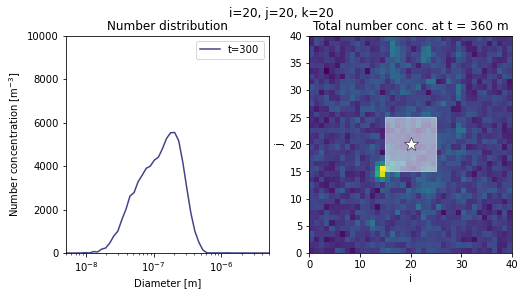

In [18]:
plotNumberDist(scenario='point-source-10x10', i=20, j=20, k=20, times=[60], local_binning=5)

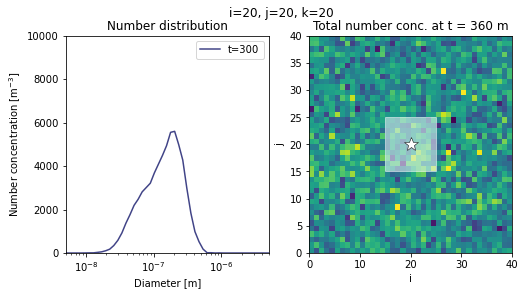

In [19]:
plotNumberDist(scenario='basecase', i=20, j=20, k=20, times=[60], local_binning=5)

In [21]:
def plotDists(scenarios, i, j, k, time, **kwargs):
    
    fig, ax = plt.subplots(1,2, figsize=(8,4))

    # Configurable keyword arguments
    
    num_xlims = kwargs.get('num_xlims', (5e-9, 5e-6))
    num_ylims = kwargs.get('num_ylims', (1e6, 1e10))
    mass_xlims = kwargs.get('mass_xlims', (5e-9, 5e-6))
    mass_ylims = kwargs.get('mass_ylims', (1e-20, 1e-13))
    numconctimeidx=kwargs.get('numconctimeidx', 72)
    local_binning = kwargs.get('local_binning', None)
    #colors = plt.cm.viridis(np.linspace(.2, .9, times.size))

    for dist_idx, dist_type in enumerate(['num', 'mass']):
        for scenario in scenarios:
            scenario_aerodata = aerodata_dict[scenario]['aerodata']
            scenario_distdata = aerodata_dict[scenario]['distdata']


            x_vals = []
            bin_vals = []
            bin_edges = scenario_distdata['BIN_EDGES'][:].data[0]#scenario_aerodata['BIN_EDGES'][:].data[0]
            bin_centers = scenario_distdata['BIN_CENTERS'][:].data[0]#scenario_aerodata['BIN_CENTERS'][:].data[0]
            bin_width = bin_edges[1:] - bin_edges[:-1]
            for bin_idx in range(100):
                bin_idx += 1 # 1 indexing 
                bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j, i].data.item()#/1e6
                if local_binning:
                    bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j-local_binning:j+local_binning, i-local_binning:i+local_binning].data#/1e6
                    bin_data = bin_data.mean()
                bin_vals.append(bin_data)
                x_vals.append(bin_idx)

            ax[dist_idx].plot(bin_centers, bin_vals, label=f'{scenario}', lw=1.5)
            ax[dist_idx].set_xscale('log')

    ax[0].set_xlim(num_xlims[0], num_xlims[1])
    ax[0].set_ylim(num_ylims[0], num_ylims[1])
    ax[0].legend()
    ax[0].set_ylabel('Number concentration [m$^{-3}$]')
    ax[0].set_xlabel('Diameter [m]')
    ax[0].set_title('Number distribution')
    ax[0].set_yscale('log')

    ax[1].set_xlim(mass_xlims[0], mass_xlims[1])
    #ax[1].set_ylim(mass_ylims[0], mass_ylims[1])
    ax[1].legend()
    ax[1].set_ylabel('Mass concentration [kg$\\cdot$ m$^{-3}$]')
    ax[1].set_xlabel('Diameter [m]')
    ax[1].set_title('Mass distribution')
    #ax[1].set_yscale('log')


    plt.suptitle(f'i={i}, j={j}, k={k}, t={5*time} mins')
    plt.tight_layout()

In [24]:
def plotMassDistsRatio(scenarios, i, j, k, time, **kwargs):
    
    fig, ax = plt.subplots(1,2, figsize=(8,4))

    # Configurable keyword arguments
    
    mass_xlims = kwargs.get('mass_xlims', (5e-9, 5e-6))
    mass_ylims = kwargs.get('mass_ylims', (1e-16, 1e-13))
    ratio_ylims = kwargs.get('ratio_ylims', (0, 5))
    local_binning = kwargs.get('local_binning', None)
    #colors = plt.cm.viridis(np.linspace(.2, .9, times.size))

    basecase_aerodata = aerodata_dict['basecase']['aerodata']
    basecase_distdata = aerodata_dict['basecase']['distdata']
    bin_vals = []
    bin_edges = basecase_distdata['BIN_EDGES'][:].data[0]#scenario_aerodata['BIN_EDGES'][:].data[0]
    bin_centers = basecase_distdata['BIN_CENTERS'][:].data[0]#scenario_aerodata['BIN_CENTERS'][:].data[0]
    dist_type = 'mass'
    for bin_idx in range(100):
        bin_idx += 1 # 1 indexing 
        bin_data = basecase_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j, i].data.item()
        if local_binning:
            bin_data = basecase_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j-local_binning:j+local_binning, i-local_binning:i+local_binning].data
            bin_data = bin_data.mean()
        bin_vals.append(bin_data)
    basecase_bin_vals = np.array(bin_vals)

    for dist_idx, dist_type in enumerate(['mass', 'mass']):
        for scenario in scenarios:
            scenario_aerodata = aerodata_dict[scenario]['aerodata']
            scenario_distdata = aerodata_dict[scenario]['distdata']

            bin_vals = []
            bin_edges = scenario_distdata['BIN_EDGES'][:].data[0]#scenario_aerodata['BIN_EDGES'][:].data[0]
            bin_centers = scenario_distdata['BIN_CENTERS'][:].data[0]#scenario_aerodata['BIN_CENTERS'][:].data[0]
            for bin_idx in range(100):
                bin_idx += 1 # 1 indexing 
                bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j, i].data.item()
                if local_binning:
                    bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j-local_binning:j+local_binning, i-local_binning:i+local_binning].data
                    bin_data = bin_data.mean()
                bin_vals.append(bin_data)
            bin_vals = np.array(bin_vals)

            if dist_idx == 0:
                ax[dist_idx].plot(bin_centers, bin_vals, label=f'{scenario}', lw=1.5)
            if dist_idx == 1:
                mass_ratio = bin_vals/basecase_bin_vals
                ax[dist_idx].plot(bin_centers, mass_ratio, label=f'{scenario}', lw=1.5)
                print(f'{scenario}, ratio min: {np.nanmin(mass_ratio)}')
            ax[dist_idx].set_xscale('log')

    ax[0].set_xlim(mass_xlims[0], mass_xlims[1])
    ax[0].set_ylim(mass_ylims[0], mass_ylims[1])
    ax[0].set_yscale('log')
    #ax[0].legend()
    ax[0].set_ylabel('Mass concentration [kg$\\cdot$ m$^{-3}$]')
    ax[0].set_xlabel('Diameter [m]')
    ax[0].set_title('Mass distribution')

    ax[1].set_xlim(mass_xlims[0], mass_xlims[1])
    ax[1].set_ylim(ratio_ylims[0], ratio_ylims[1])
    ax[1].legend()
    ax[1].set_ylabel('scenario / base case')
    ax[1].set_xlabel('Diameter [m]')
    ax[1].set_title('Mass ratio')

    plt.suptitle(f'i={i}, j={j}, k={k}, t={5*time} mins')
    plt.tight_layout()

More heterogeneous scenarios lead to more mass increase for larger particles (why? Mass growth due to coagulation is likely negigble, perhaps due to the higher local gas phase concentrations in conjunction with more surface area among larger particles that enhances mass increase?)- perhaps this preferential paritioning of species (including hygroscopic compounds) into larger aerosol means that the smaller aerosol composition is less hydrophillic when compared to the base case where the mass increase is more distributed about the accumulation mode (~.4 microns). This would then help explain why the higher heterogeneity cases result in fewer CCN as the hydrophillic material is concentrated among larger particles, of which there are fewer than the accumulation mode particles. Thus, less of the accumulation mode particles will activate and the overall concentration of CCN will be lower owing to the decrease in accumulation mode CCN relative to the base case.

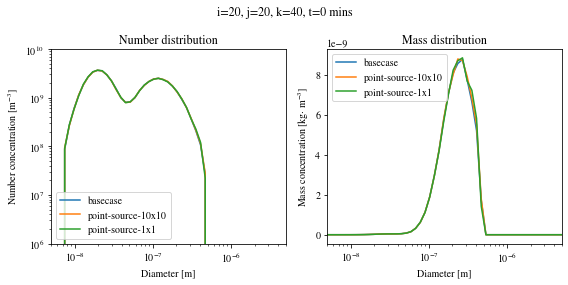

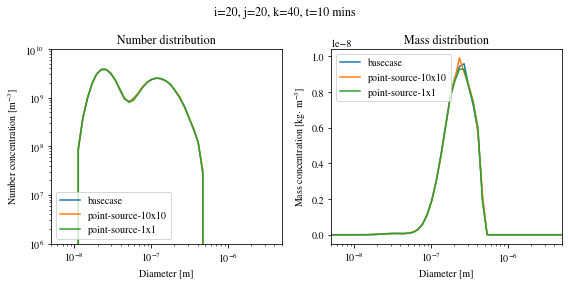

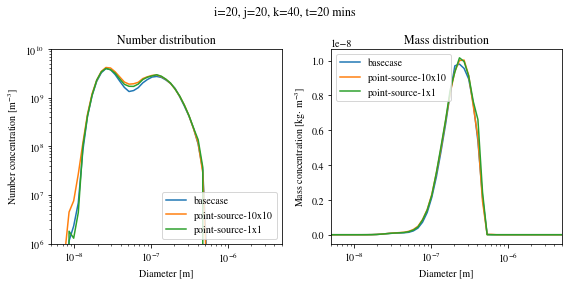

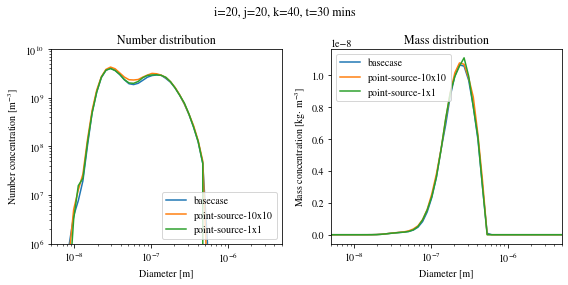

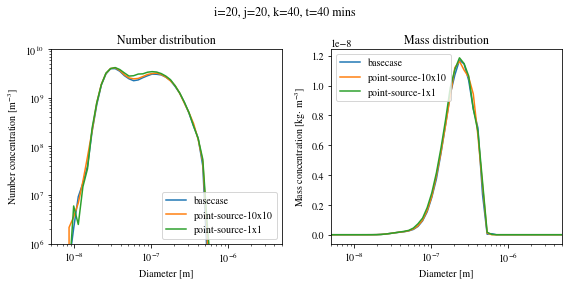

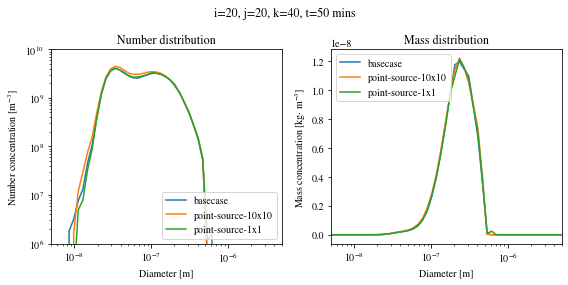

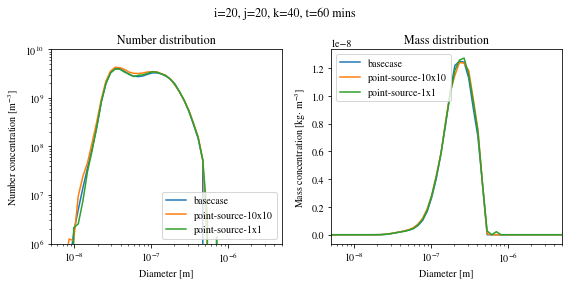

In [23]:
for t in np.arange(0, 13, 2):
    plotDists(scenarios=['basecase', #'fx2fy2', 'road-16x', 'road-8x', 
                         'point-source-10x10', 'point-source-1x1'], i=20, j=20, k=40, time=t, local_binning=10, 
                         #num_ylims=(1, 7000)
                         )

/tmp/ipykernel_154614/39799591.py:48: RuntimeWarning: invalid value encountered in divide
  mass_ratio = bin_vals/basecase_bin_vals
/tmp/ipykernel_154614/39799591.py:48: RuntimeWarning: divide by zero encountered in divide
  mass_ratio = bin_vals/basecase_bin_vals
/tmp/ipykernel_154614/39799591.py:48: RuntimeWarning: invalid value encountered in divide
  mass_ratio = bin_vals/basecase_bin_vals
/tmp/ipykernel_154614/39799591.py:48: RuntimeWarning: divide by zero encountered in divide
  mass_ratio = bin_vals/basecase_bin_vals
/tmp/ipykernel_154614/39799591.py:48: RuntimeWarning: invalid value encountered in divide
  mass_ratio = bin_vals/basecase_bin_vals
/tmp/ipykernel_154614/39799591.py:48: RuntimeWarning: divide by zero encountered in divide
  mass_ratio = bin_vals/basecase_bin_vals
/tmp/ipykernel_154614/39799591.py:48: RuntimeWarning: invalid value encountered in divide
  mass_ratio = bin_vals/basecase_bin_vals


basecase, ratio min: 1.0
fx2fy2, ratio min: 0.633477509021759
fx1fy1, ratio min: 0.5992273688316345
fx1fy0, ratio min: 0.6172999143600464


/tmp/ipykernel_154614/39799591.py:48: RuntimeWarning: divide by zero encountered in divide
  mass_ratio = bin_vals/basecase_bin_vals
/tmp/ipykernel_154614/39799591.py:48: RuntimeWarning: invalid value encountered in divide
  mass_ratio = bin_vals/basecase_bin_vals
/tmp/ipykernel_154614/39799591.py:48: RuntimeWarning: divide by zero encountered in divide
  mass_ratio = bin_vals/basecase_bin_vals
/tmp/ipykernel_154614/39799591.py:48: RuntimeWarning: invalid value encountered in divide
  mass_ratio = bin_vals/basecase_bin_vals
/tmp/ipykernel_154614/39799591.py:48: RuntimeWarning: divide by zero encountered in divide
  mass_ratio = bin_vals/basecase_bin_vals
/tmp/ipykernel_154614/39799591.py:48: RuntimeWarning: invalid value encountered in divide
  mass_ratio = bin_vals/basecase_bin_vals
/tmp/ipykernel_154614/39799591.py:48: RuntimeWarning: divide by zero encountered in divide
  mass_ratio = bin_vals/basecase_bin_vals
/tmp/ipykernel_154614/39799591.py:48: RuntimeWarning: invalid value enco

road-16x, ratio min: 0.4484183192253113
road-8x, ratio min: 0.2331472486257553
road-double, ratio min: 0.10870224982500076
point-source-10x10, ratio min: 0.14619144797325134


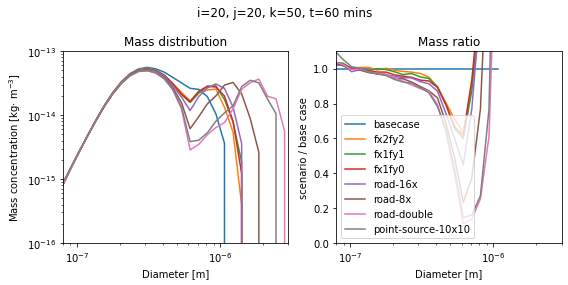

In [25]:
t = 12
plotMassDistsRatio(scenarios=['basecase', 'fx2fy2', 'fx1fy1', 'fx1fy0', 'road-16x', 'road-8x', 'road-double', 'point-source-10x10'], i=20, j=20, k=50, time=t, local_binning=20, ratio_ylims=(0, 1.1), mass_xlims=(8e-8, 3e-6))

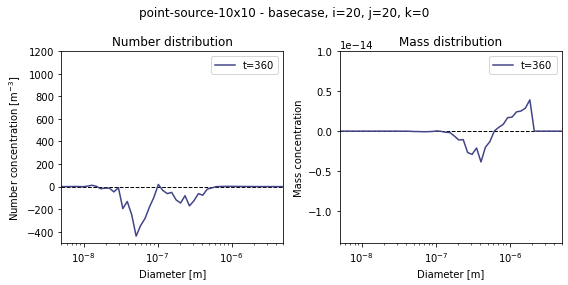

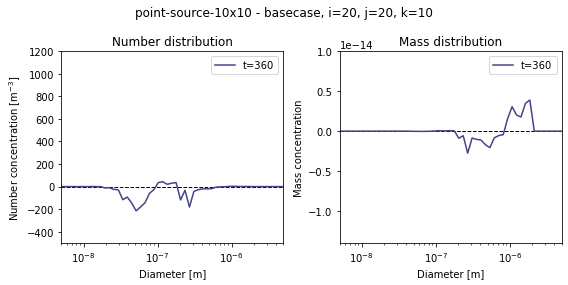

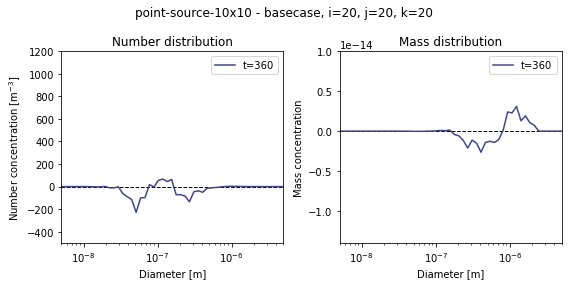

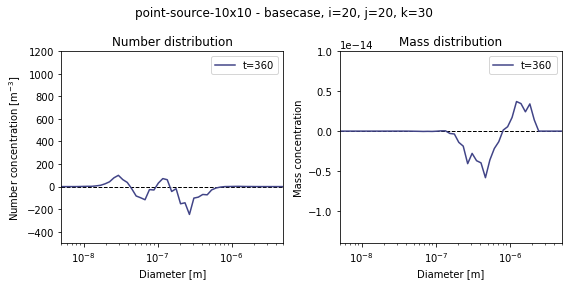

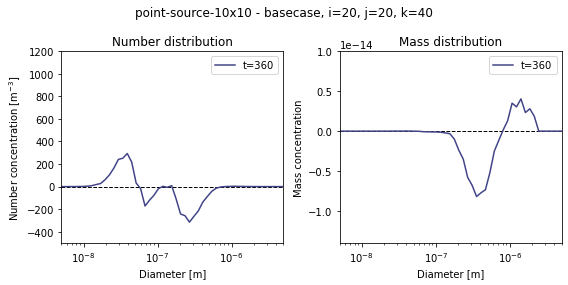

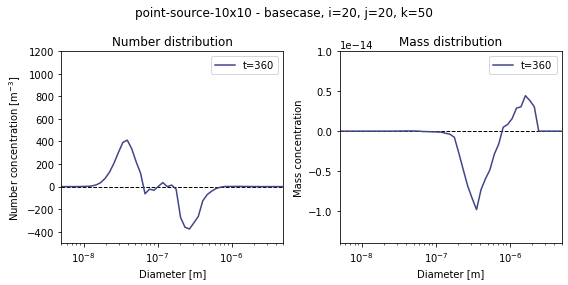

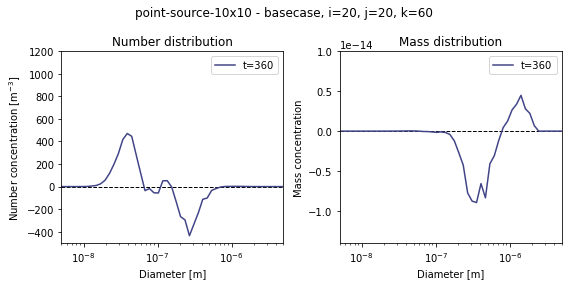

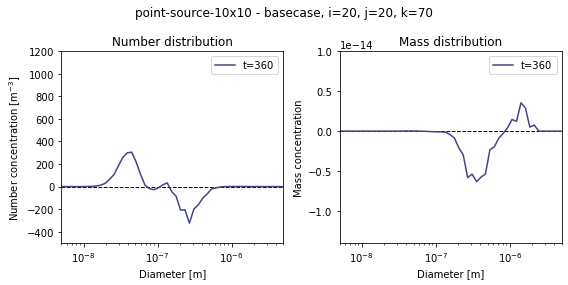

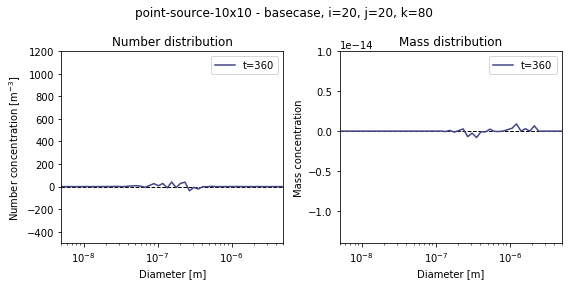

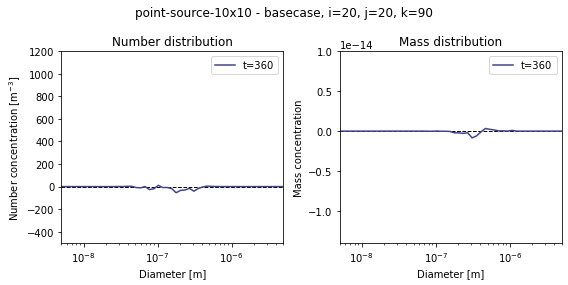

In [50]:
for k in np.arange(0, 91, 10):
    plotDistDiff(scenario1='point-source-10x10', scenario2='basecase', i=20, j=20, k=k,#np.arange(0, 91, 10), 
             local_binning=20, times=[72], num_ylims=(-500, 1200), mass_ylims=(-1.4e-14, 1e-14))

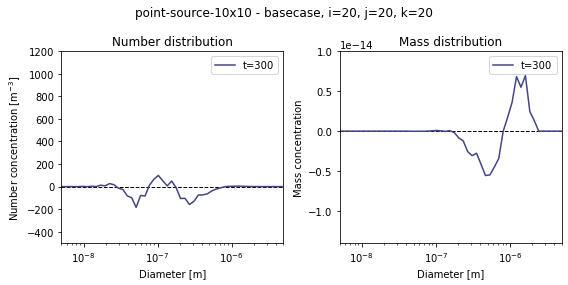

In [38]:
plotDistDiff(scenario1='point-source-10x10', scenario2='basecase', i=20, j=20, k=20, local_binning=20, times=[60], num_ylims=(-500, 1200), mass_ylims=(-1.4e-14, 1e-14))

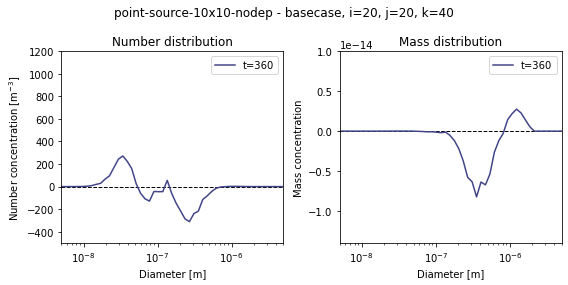

In [39]:
plotDistDiff(scenario1='point-source-10x10-nodep', scenario2='basecase', i=20, j=20, k=40, local_binning=20, times=[72], num_ylims=(-500, 1200), mass_ylims=(-1.4e-14, 1.e-14))

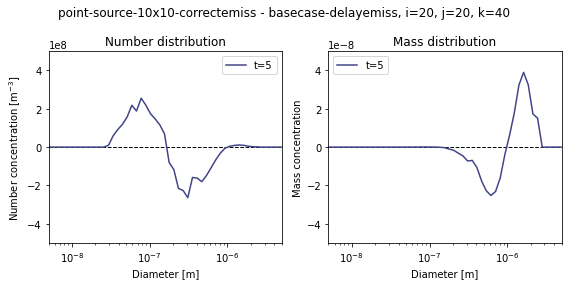

In [44]:
plotDistDiff(scenario1='point-source-10x10-correctemiss', scenario2='basecase-delayemiss', i=20, j=20, k=40, local_binning=20, times=[1], num_ylims=(-5e8, 5e8), mass_ylims=(-5e-8, 5.e-8))

/tmp/ipykernel_44983/170224107.py:44: RuntimeWarning: divide by zero encountered in divide
  diff = diff / np.array(scenario2_bin_vals)
/tmp/ipykernel_44983/170224107.py:44: RuntimeWarning: invalid value encountered in divide
  diff = diff / np.array(scenario2_bin_vals)
/tmp/ipykernel_44983/170224107.py:44: RuntimeWarning: divide by zero encountered in divide
  diff = diff / np.array(scenario2_bin_vals)
/tmp/ipykernel_44983/170224107.py:44: RuntimeWarning: invalid value encountered in divide
  diff = diff / np.array(scenario2_bin_vals)


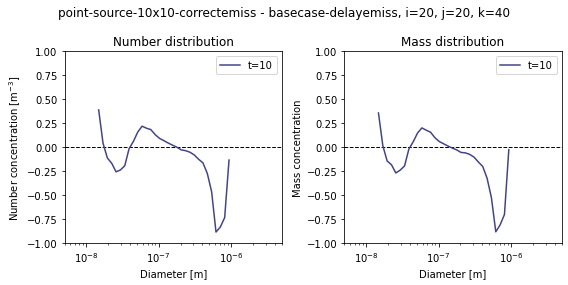

In [53]:
plotDistDiff(scenario1='point-source-10x10-correctemiss', scenario2='basecase-delayemiss', i=20, j=20, k=40, local_binning=20, times=[2], reldiff=True, num_ylims=(-1, 1), mass_ylims=(-1, 1))

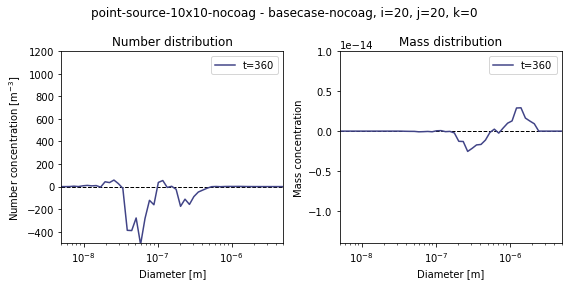

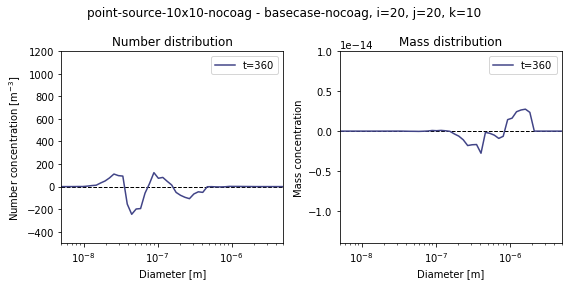

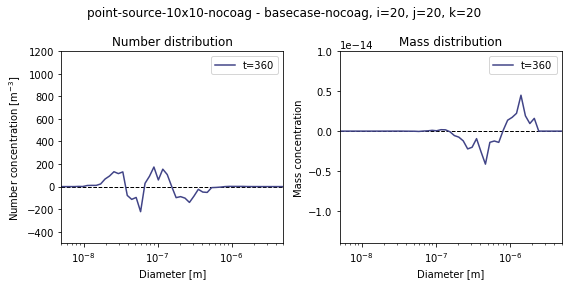

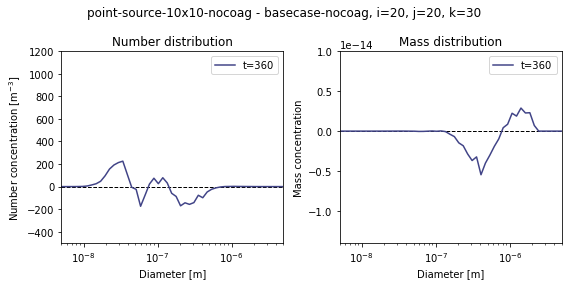

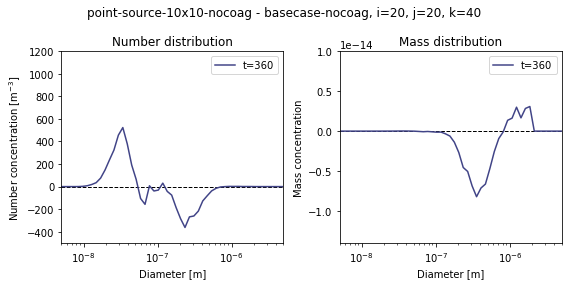

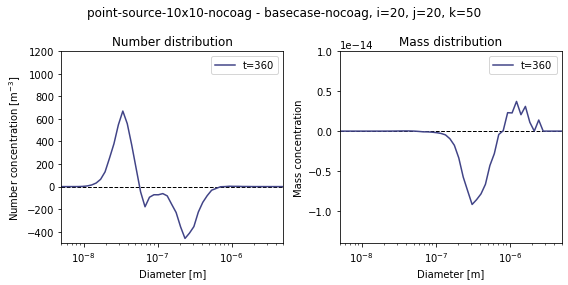

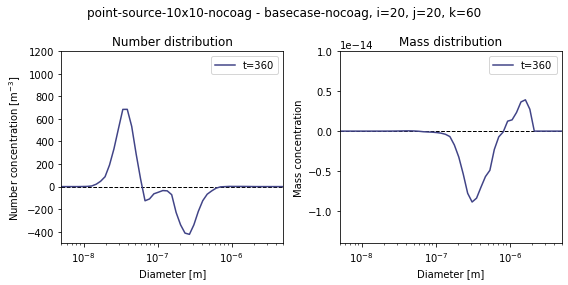

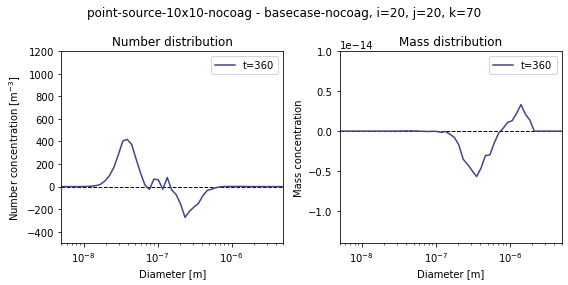

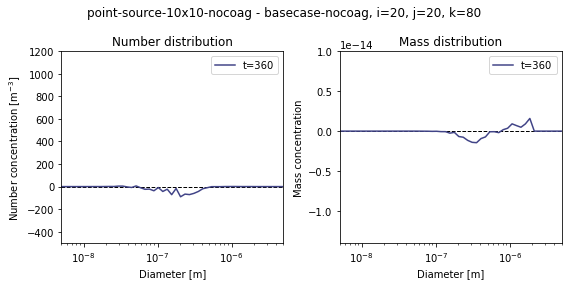

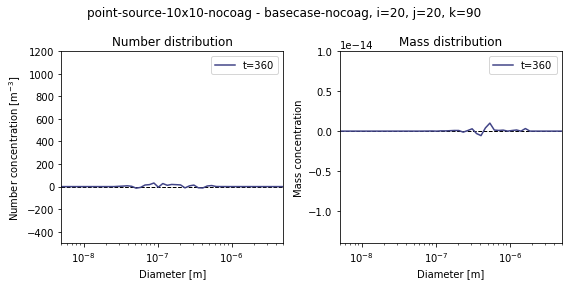

In [53]:
for k in np.arange(0, 91, 10):
    plotDistDiff(scenario1='point-source-10x10-nocoag', scenario2='basecase-nocoag', i=20, j=20, k=k, local_binning=20, times=[72], num_ylims=(-500, 1200), mass_ylims=(-1.4e-14, 1.e-14))

Notice how the total number concentration for the 10x10 case is slightly lower than for the basecase in the coagulation-active scenarios (blue and green lines). This indicates the enhancement of coagulation due to a high concentration emissions plume in the point-source case. 
It's possible part of this is also due to depositional losses?

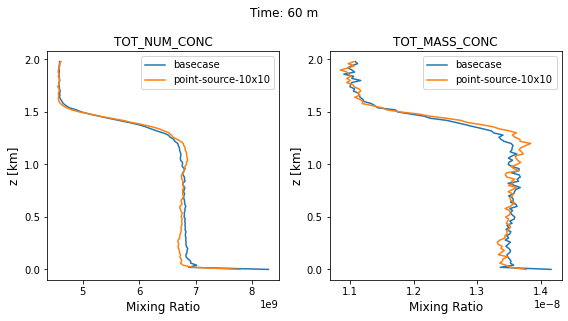

In [10]:
plotScenariosVarsVerticalProfile(scenarios=['basecase',  'point-source-10x10',], variables=['TOT_NUM_CONC', 'TOT_MASS_CONC'
                                                                                          #'pmc_ARO1'
                                                                                          ], 
                                 time=12, mixingratio=True)

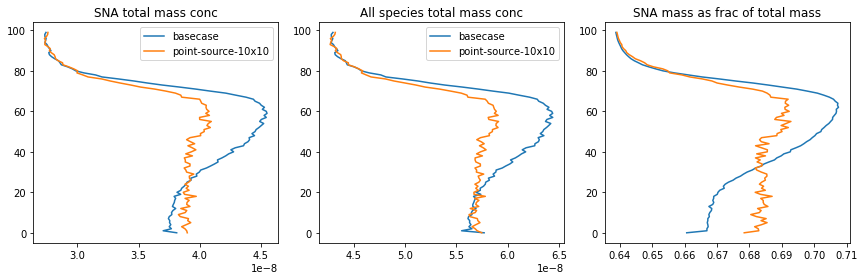

In [21]:
fig, ax  = plt.subplots(1,3, figsize=(3*4,4))
scenarios=['basecase', 'point-source-10x10']
mixingratio=True
time = 72

for scenario in scenarios:
    #times = np.arange(n_times)
    var_array = np.zeros((n_times))
    if mixingratio:
        inverse_airdens = aerodata_dict[scenario]['aerodata']['ALT'][time, :, :, :]
        mass_conc_array = inverse_airdens*aerodata_dict[scenario]['aerodata']['TOT_MASS_CONC'][time, :, :, :]
        sna_conc_array = inverse_airdens*(aerodata_dict[scenario]['aerodata']['pmc_SO4'][time, :, :, :]+
                                          aerodata_dict[scenario]['aerodata']['pmc_NO3'][time, :, :, :]+
                                          aerodata_dict[scenario]['aerodata']['pmc_NH4'][time, :, :, :])

    else:
        mass_conc_array = aerodata_dict[scenario]['aerodata']['TOT_MASS_CONC'][time, :, :, :]
        sna_conc_array = (aerodata_dict[scenario]['aerodata']['pmc_SO4'][time, :, :, :]+
                        aerodata_dict[scenario]['aerodata']['pmc_NO3'][time, :, :, :]+
                        aerodata_dict[scenario]['aerodata']['pmc_NH4'][time, :, :, :] )

    
    mass_conc_array_mean = mass_conc_array.mean(axis=(1,2))
    sna_conc_array_mean = sna_conc_array.mean(axis=(1,2))
        

    ax[0].plot(sna_conc_array_mean, np.arange(100), label = scenario)
    ax[1].plot(mass_conc_array_mean, np.arange(100), label = scenario)
    ax[2].plot(sna_conc_array_mean/mass_conc_array_mean, np.arange(100), label = scenario)



#cbar = fig.colorbar(cs, label=f'{variable} {var_units}')
ax[0].legend()
ax[1].legend()
#ax.set_xlabel('Time (mins)', fontsize=12)
#ax.set_ylabel(f'{var_units}', fontsize=12)
#ax.set_xticks(np.linspace(0, n_times-1, 13))
#ax.set_xticklabels(5*np.linspace(0, n_times-1, 13))
#ax.set_yticks(np.arange(0, n_levels+1, 25))
#ax.set_yticklabels(np.linspace(0, 2, 5).round(2))
ax[0].set_title('SNA total mass conc')
ax[1].set_title('All species total mass conc')
ax[2].set_title('SNA mass as frac of total mass')
#plt.suptitle(f'Z-level: {zlevel}')
plt.tight_layout()

`aerodistdata` variables:

`'Times', 'BIN_CENTERS', 'BIN_EDGES', 'num_a001', 'num_a002', 'num_a003', 'num_a004', 'num_a005', 'num_a006', 'num_a007', 'num_a008', 'num_a009', 'num_a010', 'num_a011', 'num_a012', 'num_a013', 'num_a014', 'num_a015', 'num_a016', 'num_a017', 'num_a018', 'num_a019', 'num_a020', 'num_a021', 'num_a022', 'num_a023', 'num_a024', 'num_a025', 'num_a026', 'num_a027', 'num_a028', 'num_a029', 'num_a030', 'num_a031', 'num_a032', 'num_a033', 'num_a034', 'num_a035', 'num_a036', 'num_a037', 'num_a038', 'num_a039', 'num_a040', 'num_a041', 'num_a042', 'num_a043', 'num_a044', 'num_a045', 'num_a046', 'num_a047', 'num_a048', 'num_a049', 'num_a050', 'num_a051', 'num_a052', 'num_a053', 'num_a054', 'num_a055', 'num_a056', 'num_a057', 'num_a058', 'num_a059', 'num_a060', 'num_a061', 'num_a062', 'num_a063', 'num_a064', 'num_a065', 'num_a066', 'num_a067', 'num_a068', 'num_a069', 'num_a070', 'num_a071', 'num_a072', 'num_a073', 'num_a074', 'num_a075', 'num_a076', 'num_a077', 'num_a078', 'num_a079', 'num_a080', 'num_a081', 'num_a082', 'num_a083', 'num_a084', 'num_a085', 'num_a086', 'num_a087', 'num_a088', 'num_a089', 'num_a090', 'num_a091', 'num_a092', 'num_a093', 'num_a094', 'num_a095', 'num_a096', 'num_a097', 'num_a098', 'num_a099', 'num_a100', 'mass_a001', 'mass_a002', 'mass_a003', 'mass_a004', 'mass_a005', 'mass_a006', 'mass_a007', 'mass_a008', 'mass_a009', 'mass_a010', 'mass_a011', 'mass_a012', 'mass_a013', 'mass_a014', 'mass_a015', 'mass_a016', 'mass_a017', 'mass_a018', 'mass_a019', 'mass_a020', 'mass_a021', 'mass_a022', 'mass_a023', 'mass_a024', 'mass_a025', 'mass_a026', 'mass_a027', 'mass_a028', 'mass_a029', 'mass_a030', 'mass_a031', 'mass_a032', 'mass_a033', 'mass_a034', 'mass_a035', 'mass_a036', 'mass_a037', 'mass_a038', 'mass_a039', 'mass_a040', 'mass_a041', 'mass_a042', 'mass_a043', 'mass_a044', 'mass_a045', 'mass_a046', 'mass_a047', 'mass_a048', 'mass_a049', 'mass_a050', 'mass_a051', 'mass_a052', 'mass_a053', 'mass_a054', 'mass_a055', 'mass_a056', 'mass_a057', 'mass_a058', 'mass_a059', 'mass_a060', 'mass_a061', 'mass_a062', 'mass_a063', 'mass_a064', 'mass_a065', 'mass_a066', 'mass_a067', 'mass_a068', 'mass_a069', 'mass_a070', 'mass_a071', 'mass_a072', 'mass_a073', 'mass_a074', 'mass_a075', 'mass_a076', 'mass_a077', 'mass_a078', 'mass_a079', 'mass_a080', 'mass_a081', 'mass_a082', 'mass_a083', 'mass_a084', 'mass_a085', 'mass_a086', 'mass_a087', 'mass_a088', 'mass_a089', 'mass_a090', 'mass_a091', 'mass_a092', 'mass_a093', 'mass_a094', 'mass_a095', 'mass_a096', 'mass_a097', 'mass_a098', 'mass_a099', 'mass_a100', 'u_flux_a001', 'u_flux_a002', 'u_flux_a003', 'u_flux_a004', 'u_flux_a005', 'u_flux_a006', 'u_flux_a007', 'u_flux_a008', 'u_flux_a009', 'u_flux_a010', 'u_flux_a011', 'u_flux_a012', 'u_flux_a013', 'u_flux_a014', 'u_flux_a015', 'u_flux_a016', 'u_flux_a017', 'u_flux_a018', 'u_flux_a019', 'u_flux_a020', 'u_flux_a021', 'u_flux_a022', 'u_flux_a023', 'u_flux_a024', 'u_flux_a025', 'u_flux_a026', 'u_flux_a027', 'u_flux_a028', 'u_flux_a029', 'u_flux_a030', 'u_flux_a031', 'u_flux_a032', 'u_flux_a033', 'u_flux_a034', 'u_flux_a035', 'u_flux_a036', 'u_flux_a037', 'u_flux_a038', 'u_flux_a039', 'u_flux_a040', 'v_flux_a001', 'v_flux_a002', 'v_flux_a003', 'v_flux_a004', 'v_flux_a005', 'v_flux_a006', 'v_flux_a007', 'v_flux_a008', 'v_flux_a009', 'v_flux_a010', 'v_flux_a011', 'v_flux_a012', 'v_flux_a013', 'v_flux_a014', 'v_flux_a015', 'v_flux_a016', 'v_flux_a017', 'v_flux_a018', 'v_flux_a019', 'v_flux_a020', 'v_flux_a021', 'v_flux_a022', 'v_flux_a023', 'v_flux_a024', 'v_flux_a025', 'v_flux_a026', 'v_flux_a027', 'v_flux_a028', 'v_flux_a029', 'v_flux_a030', 'v_flux_a031', 'v_flux_a032', 'v_flux_a033', 'v_flux_a034', 'v_flux_a035', 'v_flux_a036', 'v_flux_a037', 'v_flux_a038', 'v_flux_a039', 'v_flux_a040', 'w_flux_a001', 'w_flux_a002', 'w_flux_a003', 'w_flux_a004', 'w_flux_a005', 'w_flux_a006', 'w_flux_a007', 'w_flux_a008', 'w_flux_a009', 'w_flux_a010', 'w_flux_a011', 'w_flux_a012', 'w_flux_a013', 'w_flux_a014', 'w_flux_a015', 'w_flux_a016', 'w_flux_a017', 'w_flux_a018', 'w_flux_a019', 'w_flux_a020', 'w_flux_a021', 'w_flux_a022', 'w_flux_a023', 'w_flux_a024', 'w_flux_a025', 'w_flux_a026', 'w_flux_a027', 'w_flux_a028', 'w_flux_a029', 'w_flux_a030', 'w_flux_a031', 'w_flux_a032', 'w_flux_a033', 'w_flux_a034', 'w_flux_a035', 'w_flux_a036', 'w_flux_a037', 'w_flux_a038', 'w_flux_a039', 'w_flux_a040'`

All `aerodata` parameters:

`'T', 'P', 'ALT', 'PB', 'DNW', 'DN', 'Z', 'Z_AT_W', 'MAPFAC_M', 'MAPFAC_U', 'MAPFAC_V', 'MAPFAC_MX', 'MAPFAC_MY', 'MAPFAC_UX', 'MAPFAC_UY', 'MAPFAC_VX', 'MF_VX_INV', 'MAPFAC_VY', 'TAUAER1', 'TAUAER2', 'TAUAER3', 'TAUAER4', 'GAER1', 'GAER2', 'GAER3', 'GAER4', 'WAER1', 'WAER2', 'WAER3', 'WAER4', 'h2so4', 'hno3', 'hcl', 'nh3', 'no', 'no2', 'no3', 'n2o5', 'hono', 'hno4', 'o3', 'o1d', 'O3P', 'oh', 'ho2', 'h2o2', 'co', 'so2', 'ch4', 'c2h6', 'ch3o2', 'ethp', 'hcho', 'ch3oh', 'ANOL', 'ch3ooh', 'ETHOOH', 'ald2', 'hcooh', 'RCOOH', 'c2o3', 'pan', 'aro1', 'aro2', 'alk1', 'ole1', 'api1', 'api2', 'lim1', 'lim2', 'par', 'AONE', 'mgly', 'eth', 'OLET', 'OLEI', 'tol', 'xyl', 'cres', 'to2', 'cro', 'open', 'onit', 'rooh', 'ro2', 'ano2', 'nap', 'xo2', 'xpar', 'isop', 'isoprd', 'isopp', 'isopn', 'isopo2', 'api', 'lim', 'dms', 'msa', 'dmso', 'dmso2', 'ch3so2h', 'ch3sch2oo', 'ch3so2', 'ch3so3', 'ch3so2oo', 'ch3so2ch2oo', 'SULFHOX', 'NUM_CONC_a01', 'NUM_CONC_a02', 'NUM_CONC_a03', 'NUM_CONC_a04', 'NUM_CONC_a05', 'NUM_CONC_a06', 'NUM_CONC_a07', 'NUM_CONC_a08', 'NUM_CONC_a09', 'NUM_CONC_a10', 'NUM_CONC_a11', 'NUM_CONC_a12', 'NUM_CONC_a13', 'NUM_CONC_a14', 'NUM_CONC_a15', 'NUM_CONC_a16', 'NUM_CONC_a17', 'NUM_CONC_a18', 'NUM_CONC_a19', 'NUM_CONC_a20', 'NUM_CONC_a21', 'NUM_CONC_a22', 'NUM_CONC_a23', 'NUM_CONC_a24', 'NUM_CONC_a25', 'NUM_CONC_a26', 'NUM_CONC_a27', 'NUM_CONC_a28', 'NUM_CONC_a29', 'NUM_CONC_a30', 'NUM_CONC_a31', 'NUM_CONC_a32', 'NUM_CONC_a33', 'NUM_CONC_a34', 'NUM_CONC_a35', 'NUM_CONC_a36', 'NUM_CONC_a37', 'NUM_CONC_a38', 'NUM_CONC_a39', 'NUM_CONC_a40', 'BIN_CENTERS', 'BIN_EDGES', 'DENSITY_DRY_AIR', 'TEMPERATURE', 'REL_HUMID', 'TOT_MASS_CONC', 'TOT_NUM_CONC', 'TOT_WET_NUM_CONC', 'TOT_HYDROPHOBIC_MASS_CONC', 'TOT_HYDROPHYLIC_MASS_CONC', 'PM1_MASS_CONC', 'PM25_MASS_CONC', 'PM10_MASS_CONC', 'EXT_AER_550', 'EXT_AER_550_INTERNAL', 'EXT_AER_550_EXTERNAL', 'SCAT_AER_550', 'SCAT_AER_550_INTERNAL', 'SCAT_AER_550_EXTERNAL', 'NUM_CONC_A1', 'NUM_CONC_A2', 'NUM_CONC_A3', 'MASS_CONC_A1', 'MASS_CONC_A2', 'MASS_CONC_A3', 'SCAT_AER_550_PR_A1', 'SCAT_AER_550_INTERNAL_A1', 'SCAT_AER_550_EXTERNAL_A1', 'SCAT_AER_550_PR_A2', 'SCAT_AER_550_INTERNAL_A2', 'SCAT_AER_550_EXTERNAL_A2', 'SCAT_AER_550_PR_A3', 'SCAT_AER_550_INTERNAL_A3', 'SCAT_AER_550_EXTERNAL_A3', 'EXT_AER_550_PR_A1', 'EXT_AER_550_INTERNAL_A1', 'EXT_AER_550_EXTERNAL_A1', 'EXT_AER_550_PR_A2', 'EXT_AER_550_INTERNAL_A2', 'EXT_AER_550_EXTERNAL_A2', 'EXT_AER_550_PR_A3', 'EXT_AER_550_INTERNAL_A3', 'EXT_AER_550_EXTERNAL_A3', 'ccn_pr_001_a1', 'ccn_pr_001_a2', 'ccn_pr_001_a3', 'ccn_pr_003_a1', 'ccn_pr_003_a2', 'ccn_pr_003_a3', 'ccn_pr_006_a1', 'ccn_pr_006_a2', 'ccn_pr_006_a3', 'ccn_pr_010_a1', 'ccn_pr_010_a2', 'ccn_pr_010_a3', 'ccn_internal_001_a1', 'ccn_internal_001_a2', 'ccn_internal_001_a3', 'ccn_internal_003_a1', 'ccn_internal_003_a2', 'ccn_internal_003_a3', 'ccn_internal_006_a1', 'ccn_internal_006_a2', 'ccn_internal_006_a3', 'ccn_internal_010_a1', 'ccn_internal_010_a2', 'ccn_internal_010_a3', 'ccn_external_001_a1', 'ccn_external_001_a2', 'ccn_external_001_a3', 'ccn_external_003_a1', 'ccn_external_003_a2', 'ccn_external_003_a3', 'ccn_external_006_a1', 'ccn_external_006_a2', 'ccn_external_006_a3', 'ccn_external_010_a1', 'ccn_external_010_a2', 'ccn_external_010_a3', 'N_PARTS', 'CELL_VOL', 'N_COMPONENTS', 'TOT_NUM_CONC_COAGULATED', 'TOT_BC_NUM_CONC', 'TOT_BC_NUM_CONC_AGED', 'TOT_COAGULATION_NUM_CONC', 'D_ALPHA', 'D_GAMMA', 'CHI', 'D_ALPHA_CCN', 'D_GAMMA_CCN', 'CHI_CCN', 'D_ALPHA_OPT', 'D_GAMMA_OPT', 'CHI_OPT', 'D_ALPHA_SUBMICRON', 'D_GAMMA_SUBMICRON', 'CHI_SUBMICRON', 'D_ALPHA_CCN_SUBMICRON', 'D_GAMMA_CCN_SUBMICRON', 'CHI_CCN_SUBMICRON', 'D_ALPHA_OPT_SUBMICRON', 'D_GAMMA_OPT_SUBMICRON', 'CHI_OPT_SUBMICRON', 'D_ALPHA_SPECIES_A1', 'D_GAMMA_SPECIES_A1', 'CHI_SPECIES_A1', 'D_ALPHA_CCN_A1', 'D_GAMMA_CCN_A1', 'CHI_CCN_A1', 'D_ALPHA_OPT_A1', 'D_GAMMA_OPT_A1', 'CHI_OPT_A1', 'D_ALPHA_SPECIES_A2', 'D_GAMMA_SPECIES_A2', 'CHI_SPECIES_A2', 'D_ALPHA_CCN_A2', 'D_GAMMA_CCN_A2', 'CHI_CCN_A2', 'D_ALPHA_OPT_A2', 'D_GAMMA_OPT_A2', 'CHI_OPT_A2', 'D_ALPHA_SPECIES_A3', 'D_GAMMA_SPECIES_A3', 'CHI_SPECIES_A3', 'D_ALPHA_CCN_A3', 'D_GAMMA_CCN_A3', 'CHI_CCN_A3', 'D_ALPHA_OPT_A3', 'D_GAMMA_OPT_A3', 'CHI_OPT_A3', 'pmc_SO4', 'pmc_NO3', 'pmc_Cl', 'pmc_NH4', 'pmc_MSA', 'pmc_ARO1', 'pmc_ARO2', 'pmc_ALK1', 'pmc_OLE1', 'pmc_API1', 'pmc_API2', 'pmc_LIM1', 'pmc_LIM2', 'pmc_CO3', 'pmc_Na', 'pmc_Ca', 'pmc_OIN', 'pmc_OC', 'pmc_BC', 'pmc_H2O', 'ccn_001', 'ccn_003', 'ccn_006', 'ccn_010', 'ccn_internal_001', 'ccn_internal_003', 'ccn_internal_006', 'ccn_internal_010', 'ccn_external_001', 'ccn_external_003', 'ccn_external_006', 'ccn_external_010', 'num_conc_source_000', 'num_conc_source_001', 'num_conc_source_002', 'num_conc_source_003'`

Aerosol parameters in `aerodata`

'pmc_SO4', 'pmc_NO3', 'pmc_Cl', 'pmc_NH4', 
'pmc_MSA' *(None)*, 'pmc_ARO1' **Interesting**, 'pmc_ARO2' **Interesting**, 
'pmc_ALK1', 'pmc_OLE1', 'pmc_API1', 'pmc_API2', 
'pmc_LIM1', 'pmc_LIM2', 'pmc_CO3' *(None)*, 'pmc_Na' *(None)*, 
'pmc_Ca' *(None)*, 'pmc_OIN' *(None)*, 'pmc_OC', 'pmc_BC', 'pmc_H2O'

CCN variables. Using the total CCN **mass** concentration (`ccn_001`, `ccn_003`, `ccn_006`, `ccn_010`) at a given supersaturation instead of mode-separated concentrations. These variables are in units $kg\cdot m^{-3}$ so it would be helpful to convert them to **mass mixing ratios**

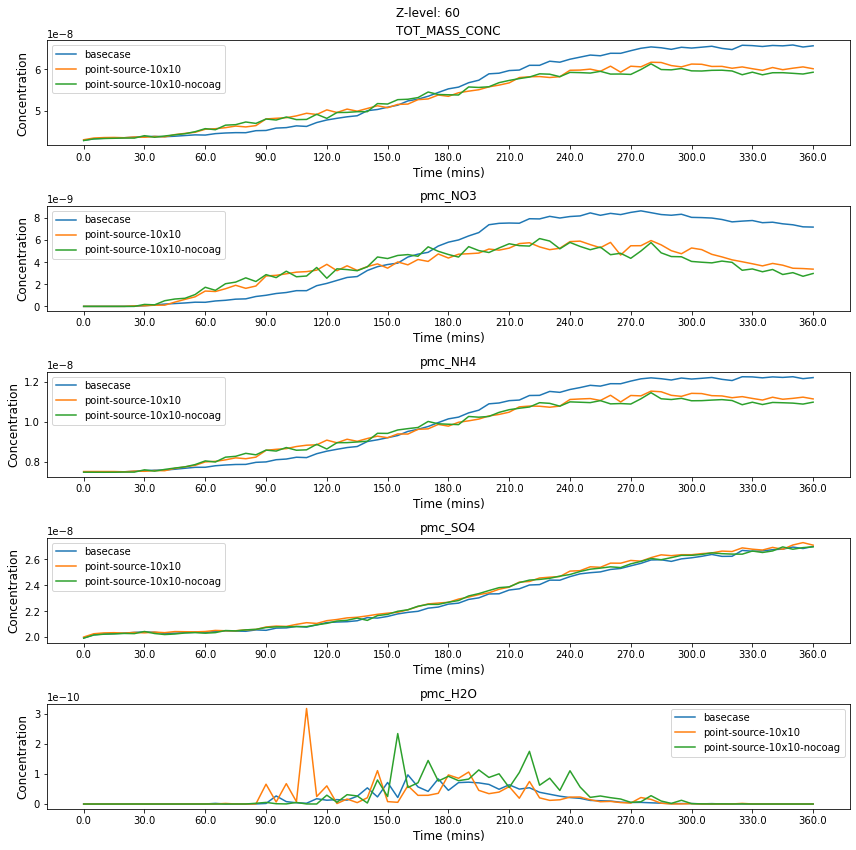

In [26]:
scenarios = ['basecase', #'basecase-nocoag', #'fx1fy0', 'road-8x', 
             'point-source-10x10', 
             'point-source-10x10-nocoag'
             ]
variables = ['TOT_MASS_CONC', 'pmc_NO3', 'pmc_NH4', 'pmc_SO4', 'pmc_H2O']
mixingratio = False
zlevel = 60
plotScenariosVarsLevelConc(scenarios, variables, zlevel, mixingratio)

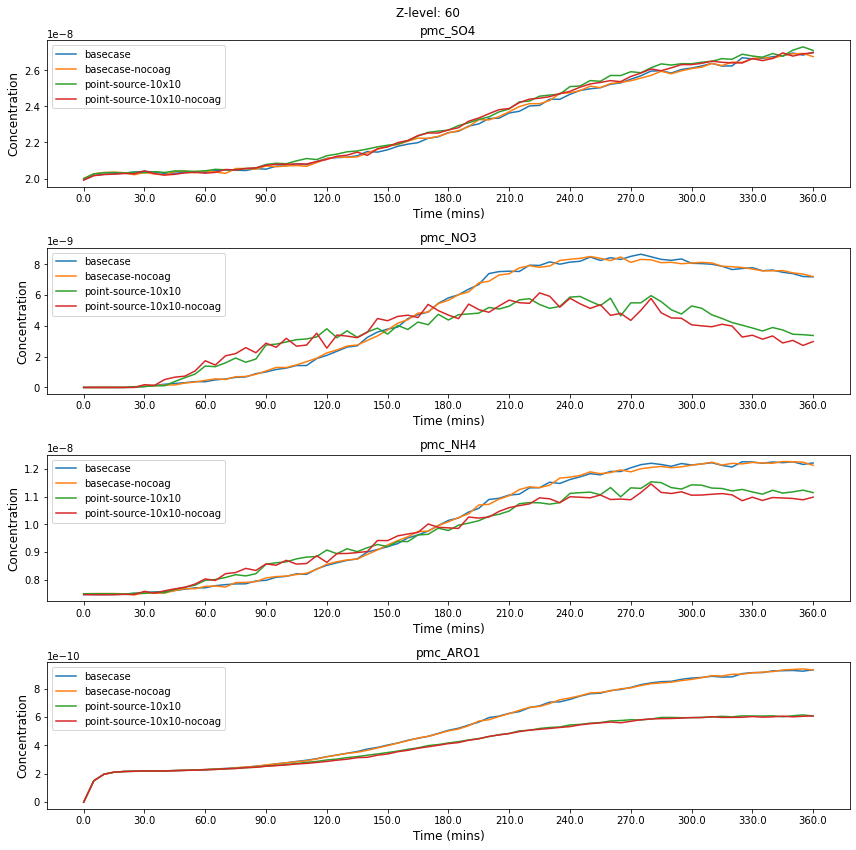

In [10]:
scenarios = ['basecase', 'basecase-nocoag', #'fx1fy0', 'road-8x', 
             'point-source-10x10', 'point-source-10x10-nocoag']
variables = ['pmc_SO4', 'pmc_NO3', 'pmc_NH4', 'pmc_ARO1']
mixingratio = False
zlevel = 60
plotScenariosVarsLevelConc(scenarios, variables, zlevel, mixingratio)

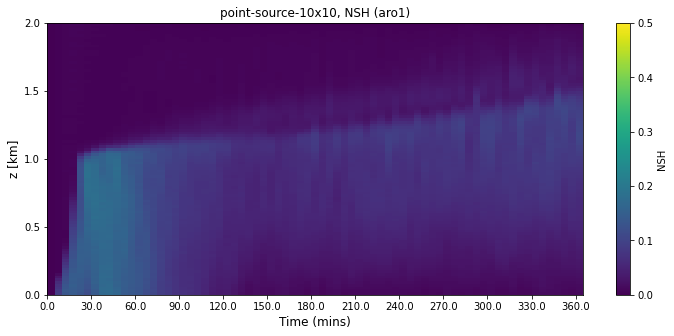

In [3]:
plotNSH(scenario='point-source-10x10', variable='aro1', vmin=0, vmax=.5)

hno3 not in NSH dictionary for point-source-10x10, calculating


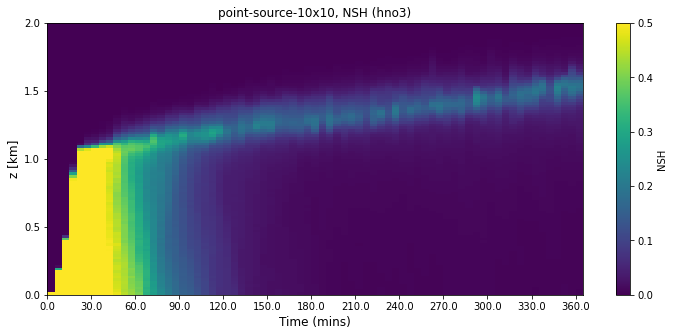

In [52]:
plotNSH(scenario='point-source-10x10', variable='hno3', vmin=0, vmax=.5)

nh3 not in NSH dictionary for point-source-10x10, calculating


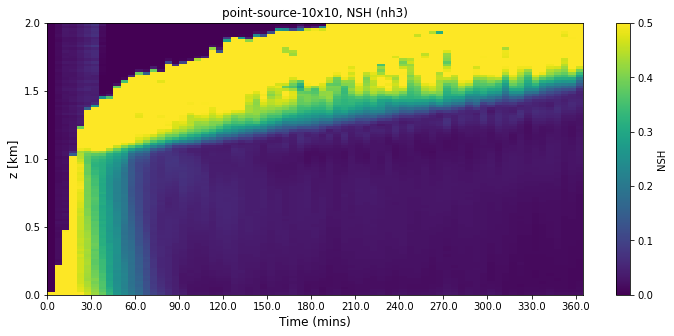

In [28]:
plotNSH(scenario='point-source-10x10', variable='nh3', vmin=0, vmax=.5)

0.0115256375 0.005179307 0.009878805
0.010527149 0.004160436 0.008893326


Text(0.5, 1.0, 'point-source-10x10')

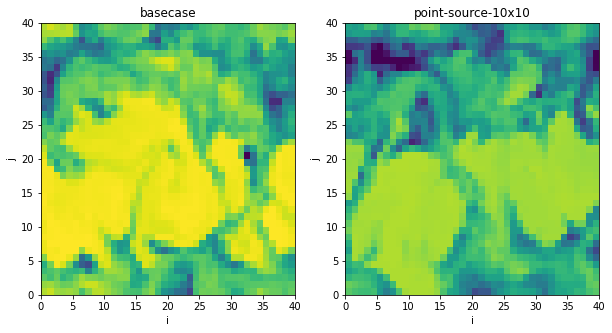

In [3]:
var = 'so2'
tidx = 60
k = 60

scenario = 'basecase'
scenario_aerodata = aerodata_dict[scenario]['aerodata']
fig, ax = plt.subplots(1,2, figsize=(10,5))
max_val = scenario_aerodata[var][tidx, k, :, :].max()
min_val = scenario_aerodata[var][tidx, k, :, :].min()
ax[0].pcolormesh(scenario_aerodata[var][tidx, k, :, :], norm=mplcolors.LogNorm(vmin=min_val, vmax=max_val))
print(scenario_aerodata[var][tidx, k, :, :].max(), scenario_aerodata[var][tidx, k, :, :].min(), scenario_aerodata[var][tidx, k, :, :].mean())
#ax.plot([i], [j], marker='*', c='white', markeredgecolor='k', markeredgewidth=.5, markersize=15)
ax[0].set_ylabel('j')
ax[0].set_xlabel('i')
#ax[0].set_title(f'Total number conc. at t = {5*tidx} m')
ax[0].set_title(f'{scenario}')

scenario = 'point-source-10x10'
scenario_aerodata = aerodata_dict[scenario]['aerodata']
ax[1].pcolormesh(scenario_aerodata[var][tidx, k, :, :], norm=mplcolors.LogNorm(vmin=min_val, vmax=max_val))
print(scenario_aerodata[var][tidx, k, :, :].max(), scenario_aerodata[var][tidx, k, :, :].min(), scenario_aerodata[var][tidx, k, :, :].mean())
#ax.plot([i], [j], marker='*', c='white', markeredgecolor='k', markeredgewidth=.5, markersize=15)
ax[1].set_ylabel('j')
ax[1].set_xlabel('i')
#ax[0].set_title(f'Total number conc. at t = {5*tidx} m')
ax[1].set_title(f'{scenario}')

Given that the total hydrophylic mass is lower for higher heterogeneity scenarios, this seems to suggest that coagulation is not the only mechanism contributing to lower CCN concentrations as mass is conserved under coagulation events.

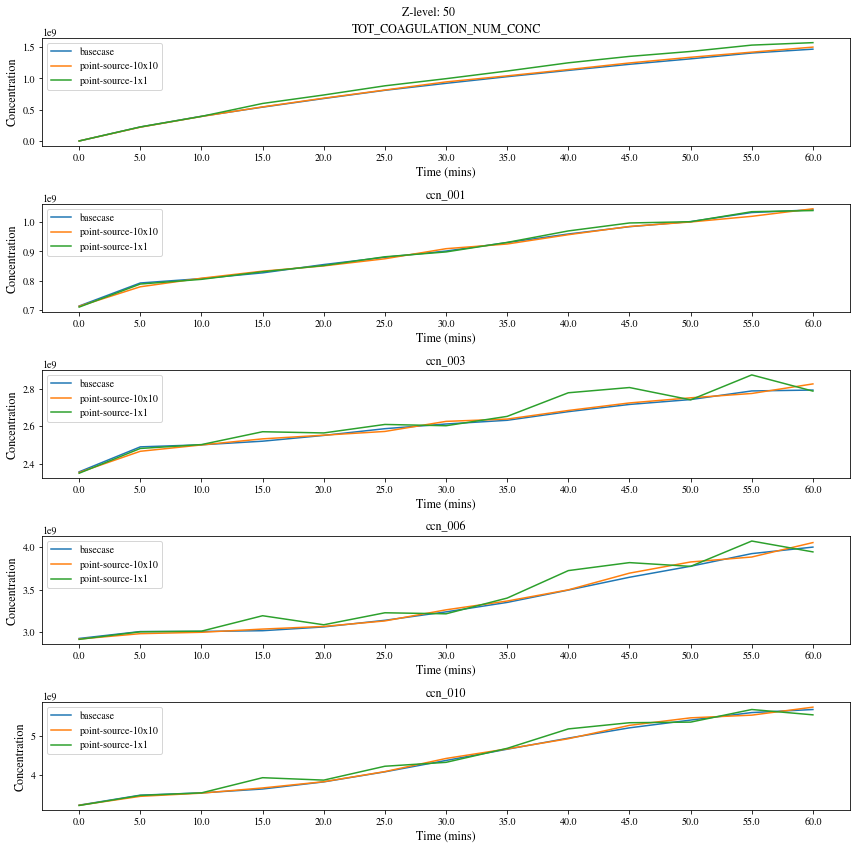

In [49]:
scenarios = [
             'basecase', 
             #'basecase-nocoag', #'fx1fy0', 'road-8x', 
             'point-source-10x10', 
             'point-source-1x1'
             #'point-source-10x10-nocoag'
             ]
n_times = 6
variables = ['TOT_COAGULATION_NUM_CONC', 
'ccn_001', 'ccn_003', 'ccn_006', 'ccn_010']
mixingratio = False
zlevel = 50
plotScenariosVarsLevelConc(scenarios, variables, zlevel, mixingratio)

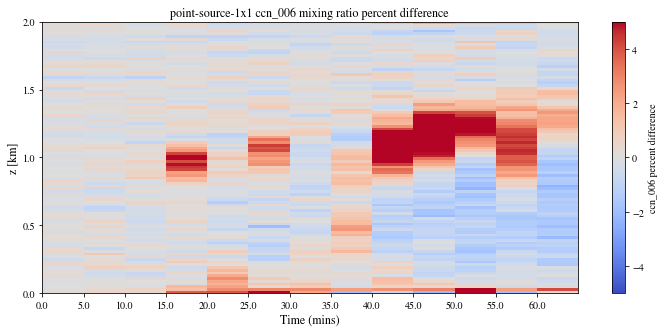

In [40]:
variable = 'ccn_006'
scenario = 'point-source-1x1'
plotVarPercentDiff(scenario, variable, vmin=-5, vmax=5, 
                   mixingratio=True)

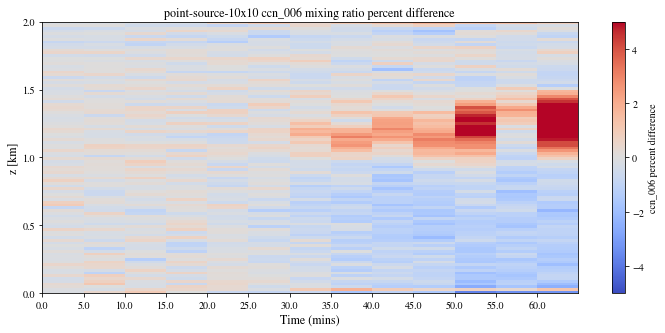

In [39]:
variable = 'ccn_006'
scenario = 'point-source-10x10'
plotVarPercentDiff(scenario, variable, vmin=-5, vmax=5, 
                   mixingratio=True)

/data/nriemer/b/sf20/wrf-partmc-spatial-het/WRFV3/test/em_les/analysis/bulk_output/helperfuncs.py:79: RuntimeWarning: invalid value encountered in divide
  rel_diff = 100*(array_scenario - array_basecase)/array_basecase


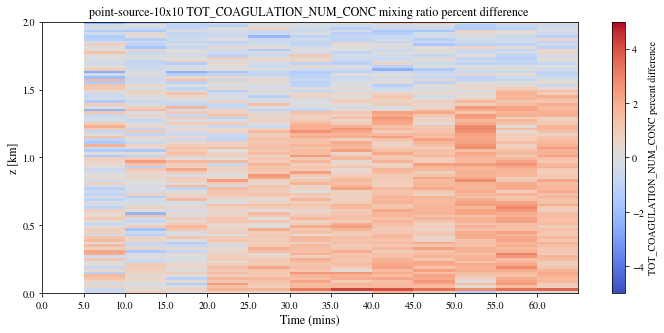

In [41]:
variable = 'TOT_COAGULATION_NUM_CONC'
scenario = 'point-source-10x10'
plotVarPercentDiff(scenario, variable, vmin=-5, vmax=5, 
                   mixingratio=True)

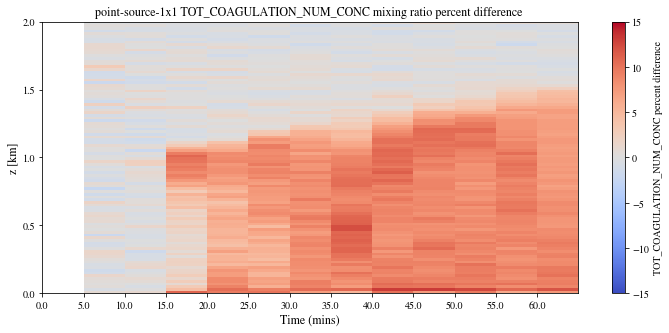

In [43]:
variable = 'TOT_COAGULATION_NUM_CONC'
scenario = 'point-source-1x1'
plotVarPercentDiff(scenario, variable, vmin=-15, vmax=15, 
                   mixingratio=True)

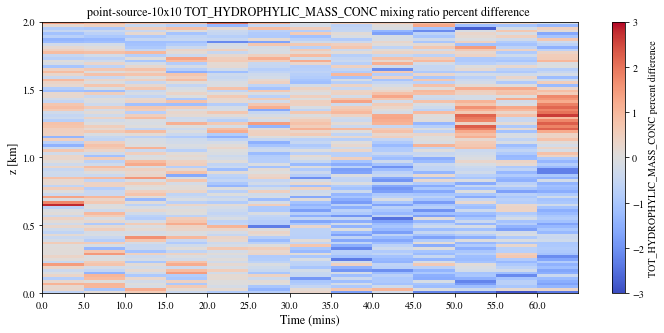

In [47]:
variable = 'TOT_HYDROPHYLIC_MASS_CONC'
scenario = 'point-source-10x10'
plotVarPercentDiff(scenario, variable, vmin=-3, vmax=3, 
                   mixingratio=True)

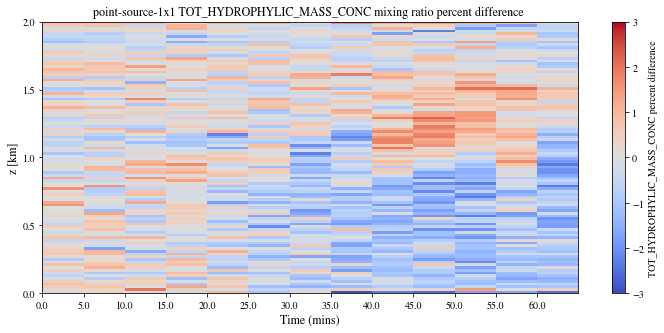

In [46]:
variable = 'TOT_HYDROPHYLIC_MASS_CONC'
scenario = 'point-source-1x1'
plotVarPercentDiff(scenario, variable, vmin=-3, vmax=3, 
                   mixingratio=True)

In [26]:
aerodata_dict['point-source-10x10-correctemiss']['aerodata']['ccn_001']

<class 'netCDF4._netCDF4.Variable'>
float32 ccn_001(Time, bottom_top, south_north, west_east)
    FieldType: 104
    MemoryOrder: XYZ
    description: 001, total mass
    units: m^-3
    stagger: 
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (7, 100, 40, 40)
filling on, default _FillValue of 9.969209968386869e+36 used

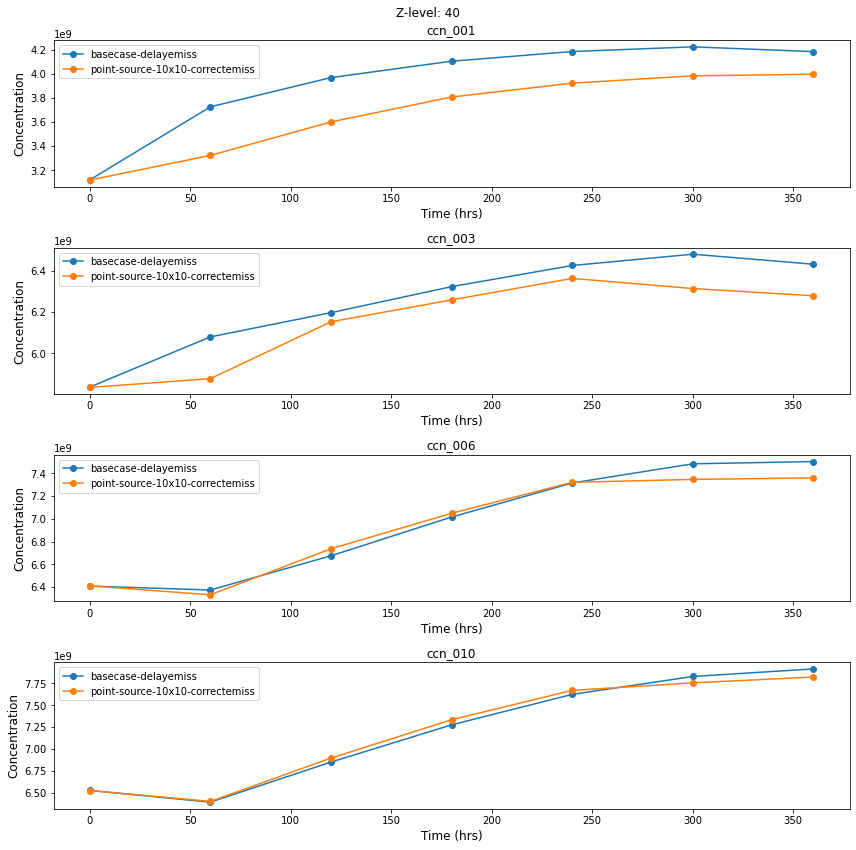

In [30]:
scenarios = [
             'basecase-delayemiss',
             #'basecase', 
             #'basecase-nocoag', #'fx1fy0', 'road-8x', 
             'point-source-10x10-correctemiss',
             #'point-source-10x10', 
             #'point-source-10x10-nocoag'
             ]
n_times = 7
variables = [#'TOT_HYDROPHYLIC_MASS_CONC', 
'ccn_001', 'ccn_003', 'ccn_006', 'ccn_010']
mixingratio = False
zlevel = 40

times = np.arange(0, 361, 60)

fig, axs  = plt.subplots(len(variables),1, figsize=(12,12))

for ax, variable in zip(axs, variables):
    for scenario in scenarios:
        var_array = np.zeros((n_times))
        for i, t in enumerate(times):
            if scenario.endswith('emiss'):
                itime = int(t/60)
            else:
                itime = int(t/5)
            if mixingratio:
                inverse_airdens = aerodata_dict[scenario]['aerodata']['ALT'][itime, zlevel, :, :]
                level_array = inverse_airdens*aerodata_dict[scenario]['aerodata'][variable][itime, zlevel, :, :]
            else:
                level_array = aerodata_dict[scenario]['aerodata'][variable][itime, zlevel, :, :]
            var_array[i] = level_array.mean()
            

        ax.plot(times, var_array, label = scenario, marker='o')

    if mixingratio:
        var_units = 'Mixing Ratio'
    else:
        var_units = 'Concentration'

    #cbar = fig.colorbar(cs, label=f'{variable} {var_units}')
    ax.legend()
    ax.set_xlabel('Time (hrs)', fontsize=12)
    ax.set_ylabel(f'{var_units}', fontsize=12)
    #ax.set_xticks(np.linspace(0, n_times-1, 13))
    #ax.set_xticklabels(60*np.linspace(0, n_times-1, 13))
    #ax.set_yticks(np.arange(0, n_levels+1, 25))
    #ax.set_yticklabels(np.linspace(0, 2, 5).round(2))
    ax.set_title(f'{variable}')
plt.suptitle(f'Z-level: {zlevel}')
plt.tight_layout()

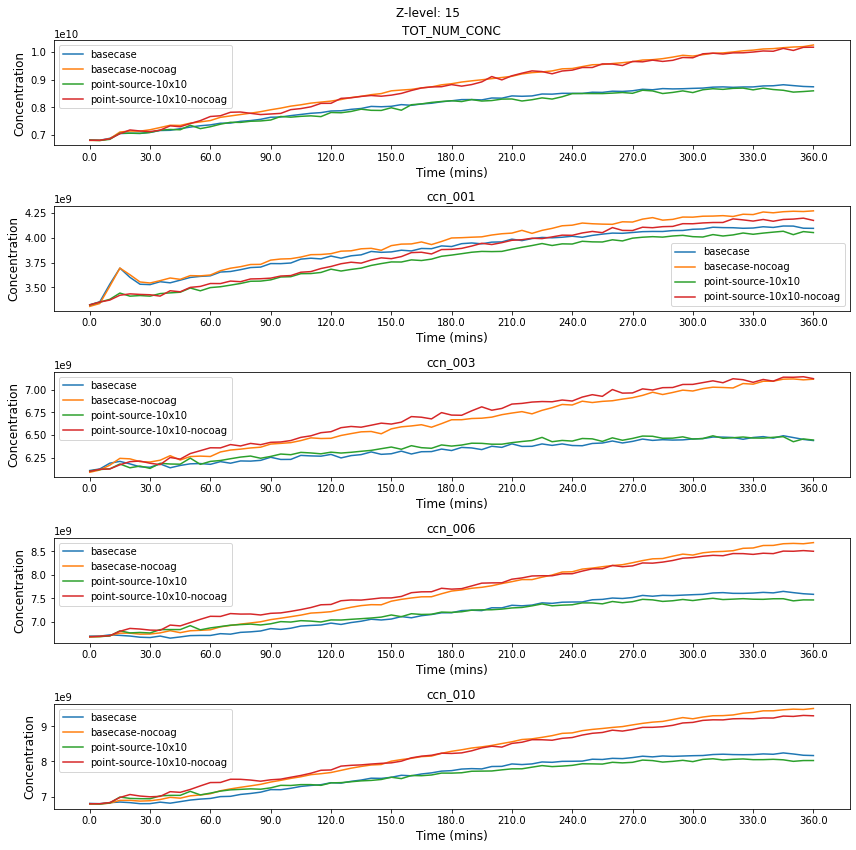

In [7]:
scenarios = ['basecase', 'basecase-nocoag', #'fx1fy0', 'road-8x', 
             'point-source-10x10', 'point-source-10x10-nocoag']
variables = ['TOT_NUM_CONC', 'ccn_001', 'ccn_003', 'ccn_006', 'ccn_010'
]
mixingratio = False
zlevel = 15
plotScenariosVarsLevelConc(scenarios, variables, zlevel, mixingratio)

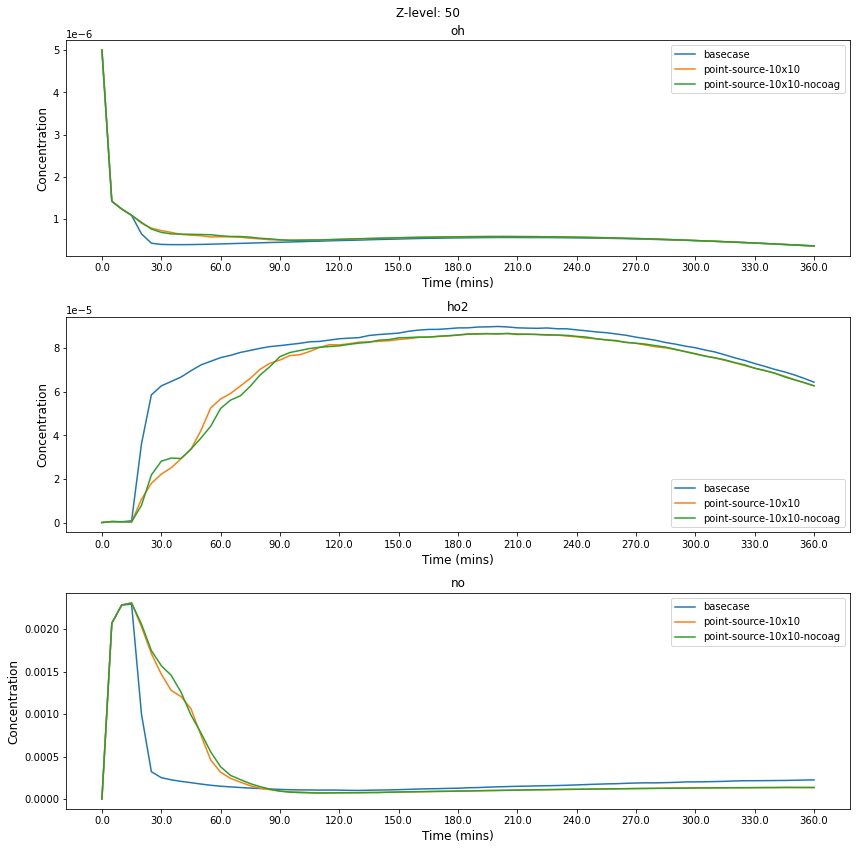

In [8]:
scenarios = ['basecase', #'fx1fy0', 'road-8x', 
             'point-source-10x10', 'point-source-10x10-nocoag']
variables = ['oh', 'ho2', 'no']
mixingratio = False
zlevel = 50
plotScenariosVarsLevelConc(scenarios, variables, zlevel, mixingratio)

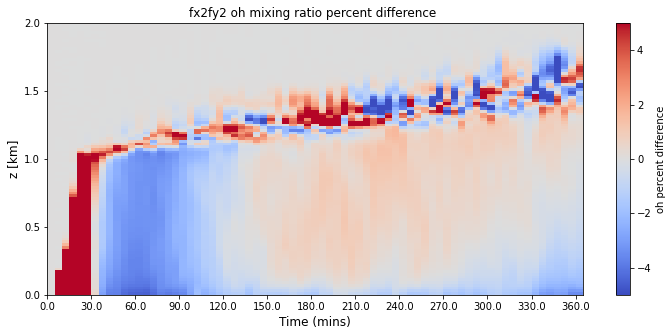

In [18]:
variable = 'oh'#'ccn_pr_010_a1'
scenario = 'fx2fy2'
plotVarPercentDiff(scenario, variable, vmin=-5, vmax=5, mixingratio=True)

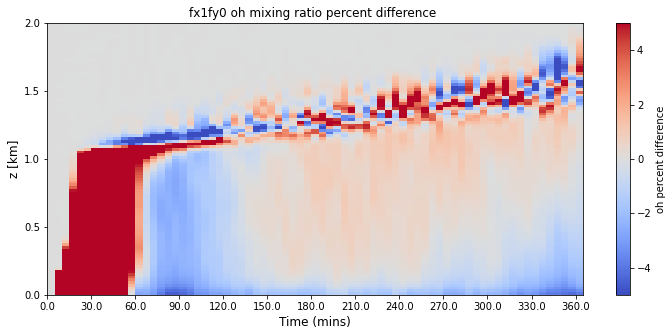

In [17]:
variable = 'oh'#'ccn_pr_010_a1'
scenario = 'fx1fy0'
plotVarPercentDiff(scenario, variable, vmin=-5, vmax=5, mixingratio=True)

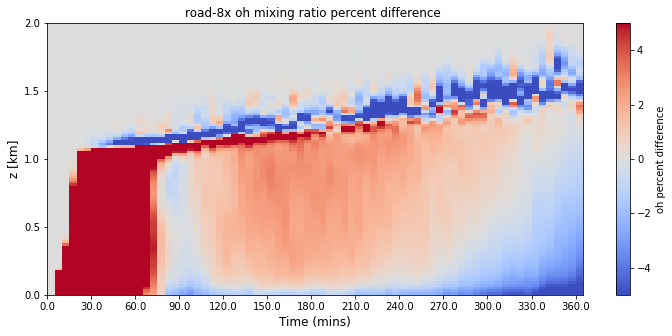

In [16]:
variable = 'oh'#'ccn_pr_010_a1'
scenario = 'road-8x'
plotVarPercentDiff(scenario, variable, vmin=-5, vmax=5, mixingratio=True)

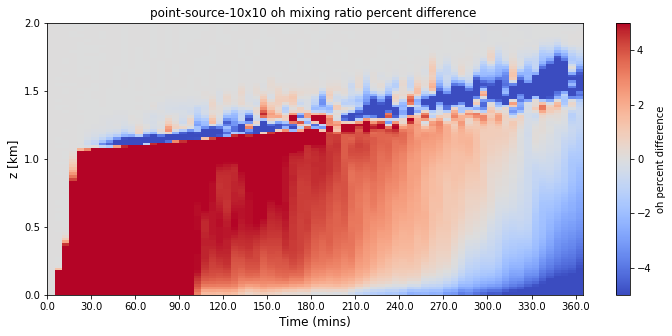

In [15]:

variable = 'oh'#'ccn_pr_010_a1'
scenario = 'point-source-10x10'
plotVarPercentDiff(scenario, variable, vmin=-5, vmax=5, mixingratio=True)

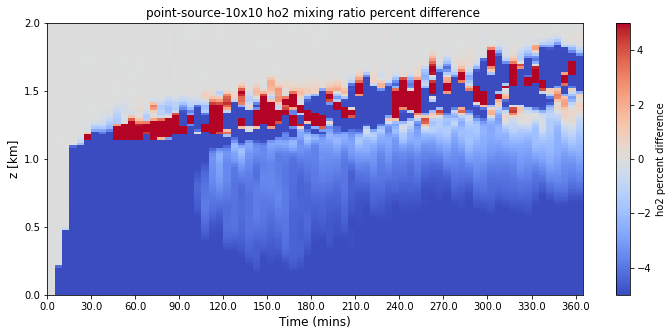

In [21]:

variable = 'ho2'#'ccn_pr_010_a1'
scenario = 'point-source-10x10'
plotVarPercentDiff(scenario, variable, vmin=-5, vmax=5, mixingratio=True)

/tmp/ipykernel_200113/3427415913.py:39: RuntimeWarning: invalid value encountered in divide
  rel_diff = 100*(array_scenario - array_basecase)/array_basecase


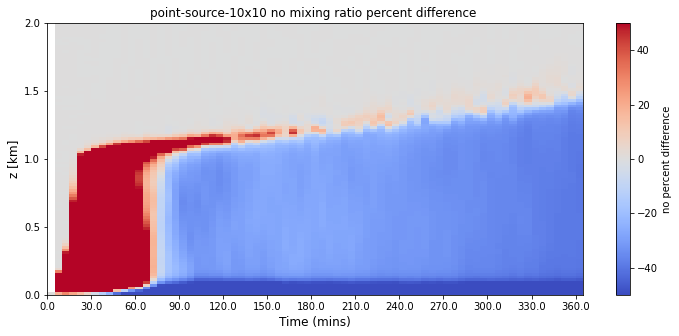

In [24]:

variable = 'no'#'ccn_pr_010_a1'
scenario = 'point-source-10x10'
plotVarPercentDiff(scenario, variable, vmin=-50, vmax=50, mixingratio=True)

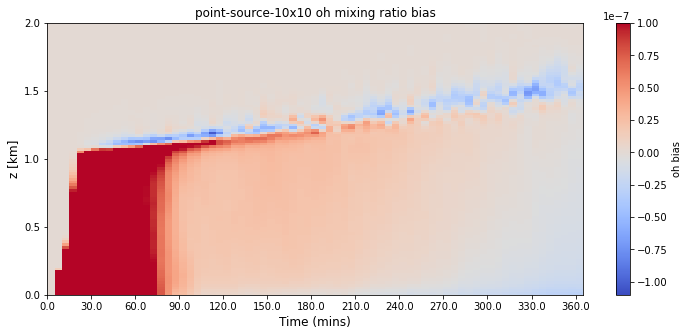

In [54]:

variable = 'oh'#'ccn_pr_010_a1'
scenario = 'point-source-10x10'
plotVarBias(scenario, variable, vmin=1e-7, vmax=-1e-7, 
            mixingratio=True)

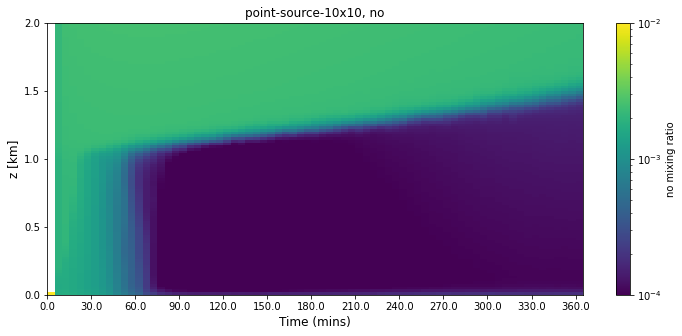

In [35]:
variable = 'no'#'ccn_pr_010_a1'
scenario = 'point-source-10x10'
plotZT(scenario, variable, vmin=0.0001, vmax=0.01, lognorm=True, mixingratio=True)

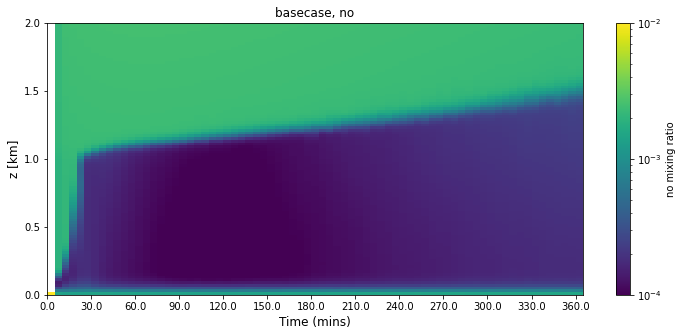

In [36]:
variable = 'no'#'ccn_pr_010_a1'
scenario = 'basecase'
plotZT(scenario, variable, vmin=0.0001, vmax=0.01, lognorm=True, mixingratio=True)

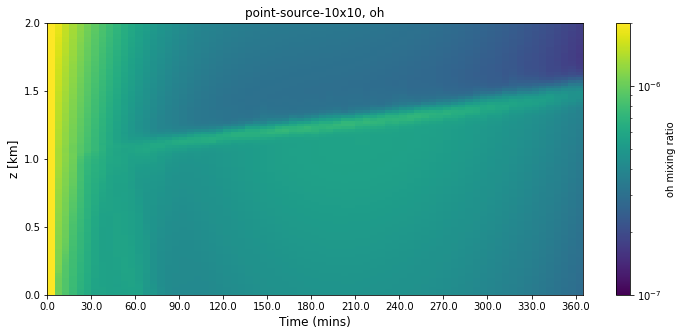

In [18]:
variable = 'oh'#'ccn_pr_010_a1'
scenario = 'point-source-10x10'
plotZT(scenario, variable, vmin=1e-7, vmax=2e-6, lognorm=True, mixingratio=True)

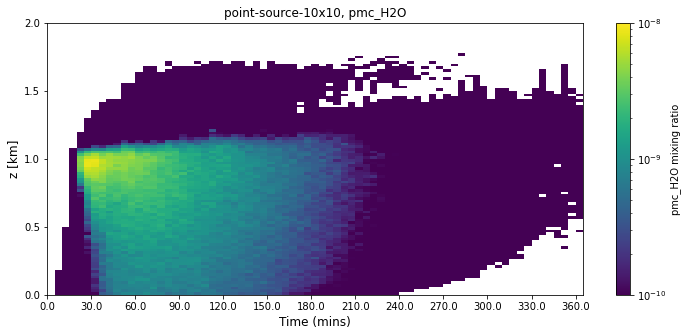

In [67]:
variable = 'pmc_H2O'#'ccn_pr_010_a1'
scenario = 'point-source-10x10'
plotZT(scenario, variable, vmin=1e-10, vmax=1e-8, lognorm=True, 
mixingratio=True)

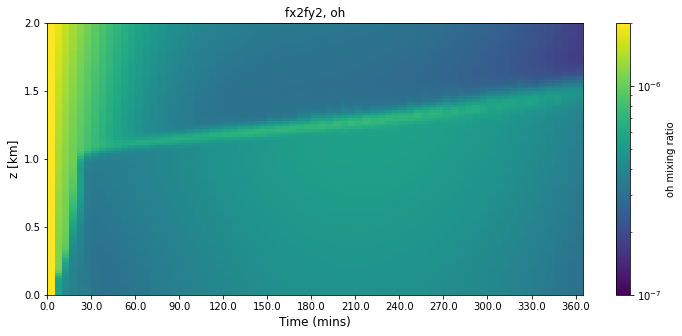

In [17]:
variable = 'oh'#'ccn_pr_010_a1'
scenario = 'fx2fy2'
plotZT(scenario, variable, vmin=1e-7, vmax=2e-6, lognorm=True, mixingratio=True)

/tmp/ipykernel_200113/3427415913.py:39: RuntimeWarning: invalid value encountered in divide
  rel_diff = 100*(array_scenario - array_basecase)/array_basecase


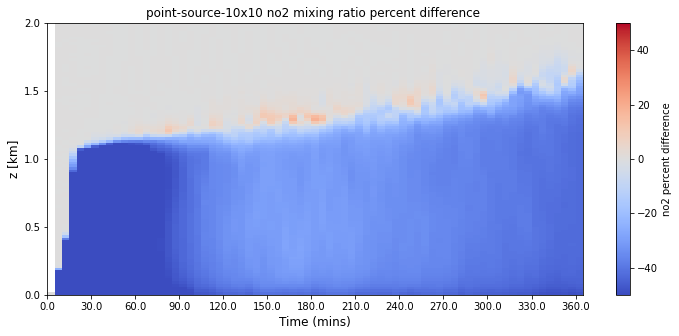

In [29]:
variable = 'no2'#'ccn_pr_010_a1'
scenario = 'point-source-10x10'
plotVarPercentDiff(scenario, variable, vmin=-50, vmax=50, mixingratio=True)

oh not in NSH dictionary for fx2fy2, calculating


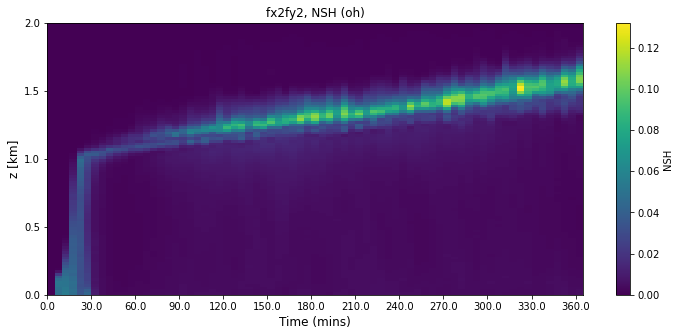

In [20]:

variable = 'oh'#'ccn_pr_010_a1'
scenario = 'fx2fy2'
plotNSH(scenario, variable, vmin=None, vmax=None, lognorm=False)

oh not in NSH dictionary for point-source-10x10, calculating


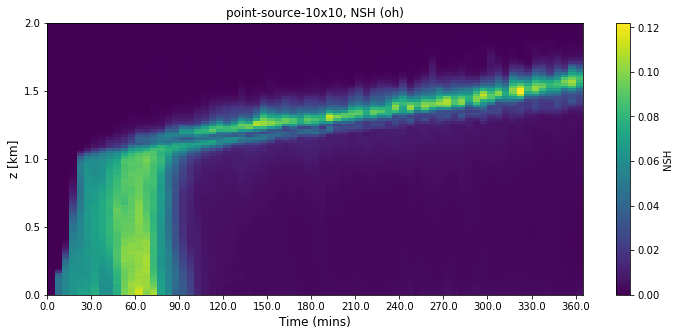

In [19]:

variable = 'oh'#'ccn_pr_010_a1'
scenario = 'point-source-10x10'
plotNSH(scenario, variable, vmin=None, vmax=None, lognorm=False)

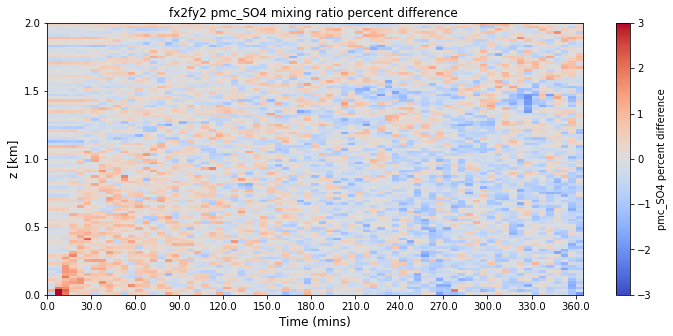

In [12]:
variable = 'pmc_SO4'#'ccn_pr_010_a1'
scenario = 'fx2fy2'
plotVarPercentDiff(scenario, variable,vmin=-3, vmax=3, mixingratio=True)

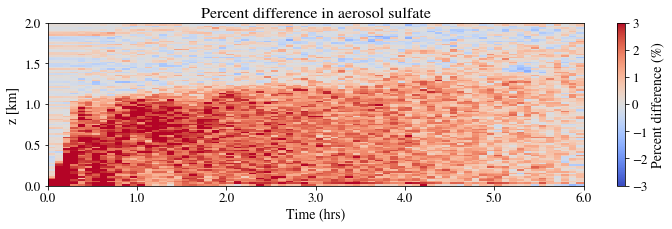

In [36]:
variable = 'pmc_SO4'#'ccn_pr_010_a1'
scenario = 'point-source-10x10'
vmin=-3
vmax=3
mixingratio=True

rel_diff = calculateVarPercentDiff(scenario, variable, mixingratio, skip_t0=True)
fig, ax  = plt.subplots(1,1, figsize=(12,3))
cs = ax.pcolormesh(rel_diff.T, cmap=plt.cm.coolwarm, vmin=vmin, vmax=vmax)
cbar = fig.colorbar(cs, label=f'{variable} percent difference')

#ax.set_xlabel('Time (mins)', fontsize=12)
#ax.set_ylabel('z [km]', fontsize=12)
#ax.set_xticks(np.linspace(0, n_times-1, 13))
#ax.set_xticklabels(5*np.linspace(0, n_times-1, 13))
#ax.set_yticks(np.arange(0, n_levels+1, 25))
#ax.set_yticklabels(np.linspace(0, 2, 5).round(2))
if mixingratio:
    mixingratio_str = 'mixing ratio '
else:
    mixingratio_str = ''


cbar.ax.tick_params(labelsize=13) 
cbar.set_label(f'Percent difference (%)', size=14)

n_times = 73
delta_t = 1/12
ax.set_title('Percent difference in aerosol sulfate', fontsize=16)
ax.set_xlabel('Time (hrs)', fontsize=14)
ax.set_ylabel('z [km]', fontsize=14)
ax.set_xticks(np.linspace(0, n_times-1, 7))
ax.set_xticklabels(delta_t*np.linspace(0, n_times-1, 7), fontsize=13)
ax.set_yticks(np.arange(0, n_levels+1, 25))
ax.set_yticklabels(np.linspace(0, 2, 5).round(2), fontsize=13)

plt.savefig(f'./figures/pdiff-sulfate.pdf', format='pdf', bbox_inches='tight')

/data/nriemer/b/sf20/wrf-partmc-spatial-het/WRFV3/test/em_les/analysis/bulk_output/helperfuncs.py:79: RuntimeWarning: divide by zero encountered in divide
  rel_diff = 100*(array_scenario - array_basecase)/array_basecase
/data/nriemer/b/sf20/wrf-partmc-spatial-het/WRFV3/test/em_les/analysis/bulk_output/helperfuncs.py:79: RuntimeWarning: invalid value encountered in divide
  rel_diff = 100*(array_scenario - array_basecase)/array_basecase


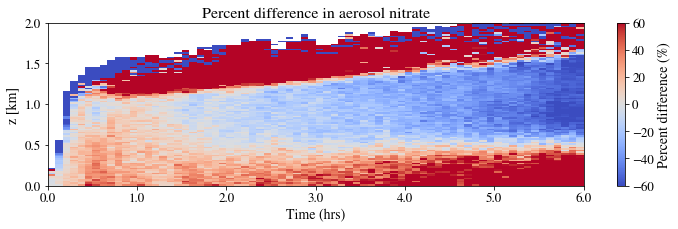

In [37]:
variable = 'pmc_NO3'#'ccn_pr_010_a1'
scenario = 'point-source-10x10'
vmin=-60
vmax=60
mixingratio=True

rel_diff = calculateVarPercentDiff(scenario, variable, mixingratio, skip_t0=True)
fig, ax  = plt.subplots(1,1, figsize=(12,3))
cs = ax.pcolormesh(rel_diff.T, cmap=plt.cm.coolwarm, vmin=vmin, vmax=vmax)
cbar = fig.colorbar(cs, label=f'{variable} percent difference')

#ax.set_xlabel('Time (mins)', fontsize=12)
#ax.set_ylabel('z [km]', fontsize=12)
#ax.set_xticks(np.linspace(0, n_times-1, 13))
#ax.set_xticklabels(5*np.linspace(0, n_times-1, 13))
#ax.set_yticks(np.arange(0, n_levels+1, 25))
#ax.set_yticklabels(np.linspace(0, 2, 5).round(2))
if mixingratio:
    mixingratio_str = 'mixing ratio '
else:
    mixingratio_str = ''


cbar.ax.tick_params(labelsize=13) 
cbar.set_label(f'Percent difference (%)', size=14)

n_times = 73
delta_t = 1/12
ax.set_title('Percent difference in aerosol nitrate', fontsize=16)
ax.set_xlabel('Time (hrs)', fontsize=14)
ax.set_ylabel('z [km]', fontsize=14)
ax.set_xticks(np.linspace(0, n_times-1, 7))
ax.set_xticklabels(delta_t*np.linspace(0, n_times-1, 7), fontsize=13)
ax.set_yticks(np.arange(0, n_levels+1, 25))
ax.set_yticklabels(np.linspace(0, 2, 5).round(2), fontsize=13)

plt.savefig(f'./figures/pdiff-nitrate.pdf', format='pdf', bbox_inches='tight')

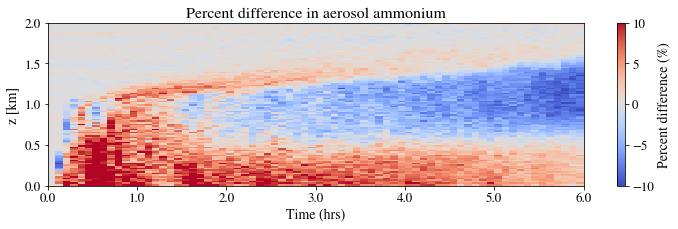

In [35]:
variable = 'pmc_NH4'#'ccn_pr_010_a1'
scenario = 'point-source-10x10'
vmin=-10
vmax=10
mixingratio=True

rel_diff = calculateVarPercentDiff(scenario, variable, mixingratio, skip_t0=True)
fig, ax  = plt.subplots(1,1, figsize=(12,3))
cs = ax.pcolormesh(rel_diff.T, cmap=plt.cm.coolwarm, vmin=vmin, vmax=vmax)
cbar = fig.colorbar(cs, label=f'{variable} percent difference')

#ax.set_xlabel('Time (mins)', fontsize=12)
#ax.set_ylabel('z [km]', fontsize=12)
#ax.set_xticks(np.linspace(0, n_times-1, 13))
#ax.set_xticklabels(5*np.linspace(0, n_times-1, 13))
#ax.set_yticks(np.arange(0, n_levels+1, 25))
#ax.set_yticklabels(np.linspace(0, 2, 5).round(2))
if mixingratio:
    mixingratio_str = 'mixing ratio '
else:
    mixingratio_str = ''


cbar.ax.tick_params(labelsize=13) 
cbar.set_label(f'Percent difference (%)', size=14)

n_times = 73
delta_t = 1/12
ax.set_title('Percent difference in aerosol ammonium', fontsize=16)
ax.set_xlabel('Time (hrs)', fontsize=14)
ax.set_ylabel('z [km]', fontsize=14)
ax.set_xticks(np.linspace(0, n_times-1, 7))
ax.set_xticklabels(delta_t*np.linspace(0, n_times-1, 7), fontsize=13)
ax.set_yticks(np.arange(0, n_levels+1, 25))
ax.set_yticklabels(np.linspace(0, 2, 5).round(2), fontsize=13)

plt.savefig(f'./figures/pdiff-ammonium.pdf', format='pdf', bbox_inches='tight')

/data/nriemer/b/sf20/wrf-partmc-spatial-het/WRFV3/test/em_les/analysis/bulk_output/helperfuncs.py:79: RuntimeWarning: divide by zero encountered in divide
  rel_diff = 100*(array_scenario - array_basecase)/array_basecase
/data/nriemer/b/sf20/wrf-partmc-spatial-het/WRFV3/test/em_les/analysis/bulk_output/helperfuncs.py:79: RuntimeWarning: invalid value encountered in divide
  rel_diff = 100*(array_scenario - array_basecase)/array_basecase
/tmp/ipykernel_24071/3062046020.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(delta_t*np.linspace(0, n_times-1, 7), fontsize=13)


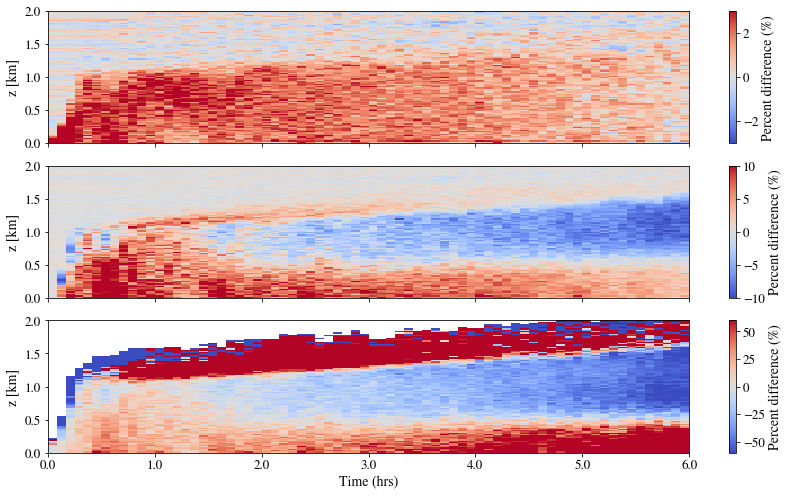

In [52]:
fig, axs  = plt.subplots(3,1, figsize=(12,7))
for i, (ax, variable, pdiffrange) in enumerate(zip(axs.flatten(), ['pmc_SO4', 'pmc_NH4', 'pmc_NO3'], [3, 10, 60])):
    scenario = 'point-source-10x10'
    vmin=-1*pdiffrange
    vmax=pdiffrange
    mixingratio=True

    rel_diff = calculateVarPercentDiff(scenario, variable, mixingratio, skip_t0=True)
    
    cs = ax.pcolormesh(rel_diff.T, cmap=plt.cm.coolwarm, vmin=vmin, vmax=vmax)
    cbar = fig.colorbar(cs, label=f'{variable} percent difference', ax=ax)

    if mixingratio:
        mixingratio_str = 'mixing ratio '
    else:
        mixingratio_str = ''

    cbar.ax.tick_params(labelsize=13) 
    cbar.set_label(f'Percent difference (%)', size=14)

    n_times = 73
    delta_t = 1/12
    #ax.set_title('Percent difference in aerosol sulfate', fontsize=16)
    if i == 2:
        ax.set_xlabel('Time (hrs)', fontsize=14)
        ax.set_xticklabels(delta_t*np.linspace(0, n_times-1, 7), fontsize=13)
    else:
        ax.set_xticklabels([])
    ax.set_ylabel('z [km]', fontsize=14)
    ax.set_xticks(np.linspace(0, n_times-1, 7))
    
    ax.set_yticks(np.arange(0, n_levels+1, 25))
    ax.set_yticklabels(np.linspace(0, 2, 5).round(2), fontsize=13)

plt.tight_layout()
plt.savefig(f'./figures/pdiff-SNA.pdf', format='pdf', bbox_inches='tight')

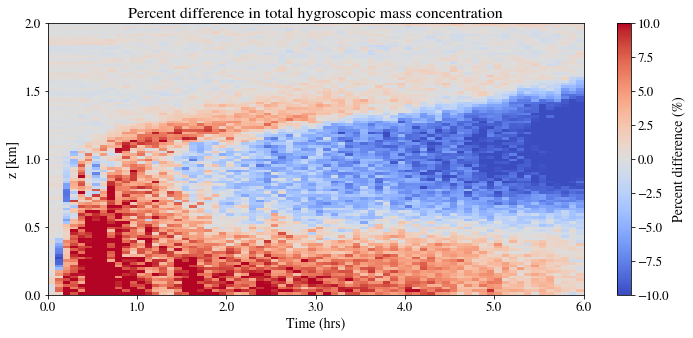

In [2]:
variable = 'TOT_HYDROPHYLIC_MASS_CONC'
scenario = 'point-source-10x10'
vmin=-10
vmax=10
mixingratio=False
skip_t0=True

rel_diff = calculateVarPercentDiff(scenario, variable, mixingratio, skip_t0)
fig, ax  = plt.subplots(1,1, figsize=(12,5))
cs = ax.pcolormesh(rel_diff.T, cmap=plt.cm.coolwarm, vmin=vmin, vmax=vmax)
cbar = fig.colorbar(cs, label=f'{variable} percent difference')

#ax.set_xlabel('Time (mins)', fontsize=12)
#ax.set_ylabel('z [km]', fontsize=12)
#ax.set_xticks(np.linspace(0, n_times-1, 13))
#ax.set_xticklabels(5*np.linspace(0, n_times-1, 13))
#ax.set_yticks(np.arange(0, n_levels+1, 25))
#ax.set_yticklabels(np.linspace(0, 2, 5).round(2))
if mixingratio:
    mixingratio_str = 'mixing ratio '
else:
    mixingratio_str = ''


cbar.ax.tick_params(labelsize=13) 
cbar.set_label(f'Percent difference (%)', size=14)

n_times = 73
delta_t = 1/12
ax.set_title('Percent difference in total hygroscopic mass concentration', fontsize=16)
ax.set_xlabel('Time (hrs)', fontsize=14)
ax.set_ylabel('z [km]', fontsize=14)
ax.set_xticks(np.linspace(0, n_times-1, 7))
ax.set_xticklabels(delta_t*np.linspace(0, n_times-1, 7), fontsize=13)
ax.set_yticks(np.arange(0, n_levels+1, 25))
ax.set_yticklabels(np.linspace(0, 2, 5).round(2), fontsize=13)

plt.savefig(f'./figures/pdiff-tothydromassconc.pdf', format='pdf', bbox_inches='tight')


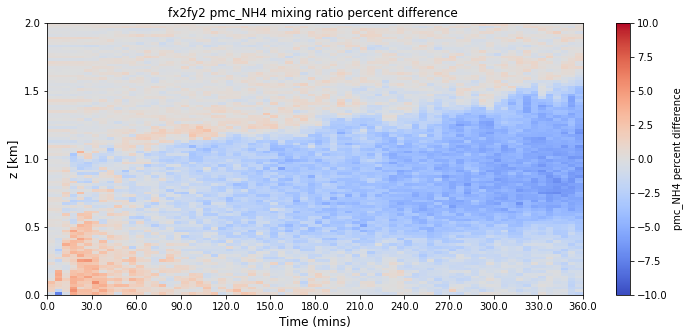

In [22]:
variable = 'pmc_NH4'#'ccn_pr_010_a1'
scenario = 'fx2fy2'
plotVarPercentDiff(scenario, variable,vmin=-10, vmax=10,
                    mixingratio=True, skip_t0=True)

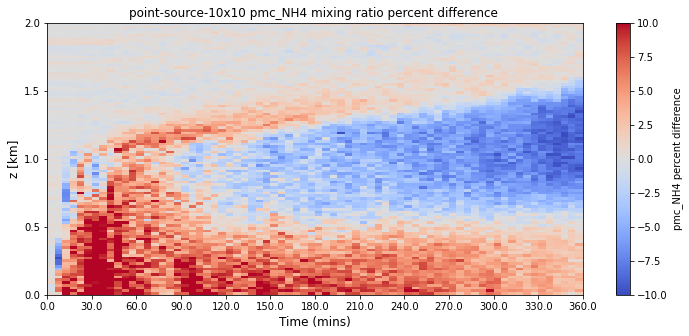

In [21]:
variable = 'pmc_NH4'#'ccn_pr_010_a1'
scenario = 'point-source-10x10'
plotVarPercentDiff(scenario, variable,vmin=-10, vmax=10,
                    mixingratio=True, skip_t0=True)

/tmp/ipykernel_109864/3427415913.py:39: RuntimeWarning: divide by zero encountered in divide
  rel_diff = 100*(array_scenario - array_basecase)/array_basecase
/tmp/ipykernel_109864/3427415913.py:39: RuntimeWarning: invalid value encountered in divide
  rel_diff = 100*(array_scenario - array_basecase)/array_basecase


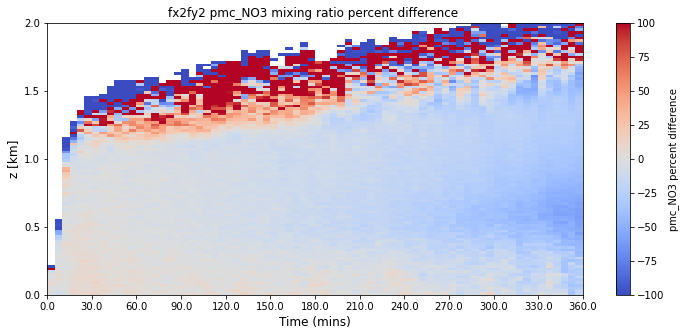

In [17]:
variable = 'pmc_NO3'#'ccn_pr_010_a1'
scenario = 'fx2fy2'
plotVarPercentDiff(scenario, variable,vmin=-100, vmax=100,
                    mixingratio=True, skip_t0=True)

/tmp/ipykernel_109864/3427415913.py:39: RuntimeWarning: divide by zero encountered in divide
  rel_diff = 100*(array_scenario - array_basecase)/array_basecase
/tmp/ipykernel_109864/3427415913.py:39: RuntimeWarning: invalid value encountered in divide
  rel_diff = 100*(array_scenario - array_basecase)/array_basecase


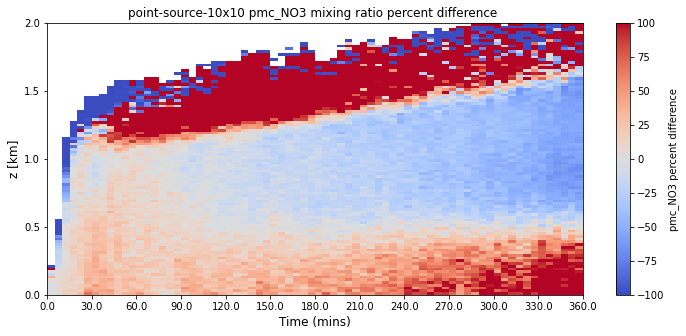

In [16]:
variable = 'pmc_NO3'#'ccn_pr_010_a1'
scenario = 'point-source-10x10'
plotVarPercentDiff(scenario, variable,vmin=-100, vmax=100,
                    mixingratio=True, skip_t0=True)

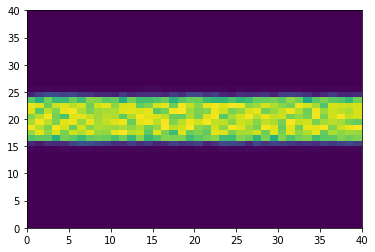

In [9]:
plt.pcolormesh(aerodata_dict['road-8x']['aerodata']['so2'][1, 0, :, :])

so2 not in NSH dictionary for point-source-10x10, calculating


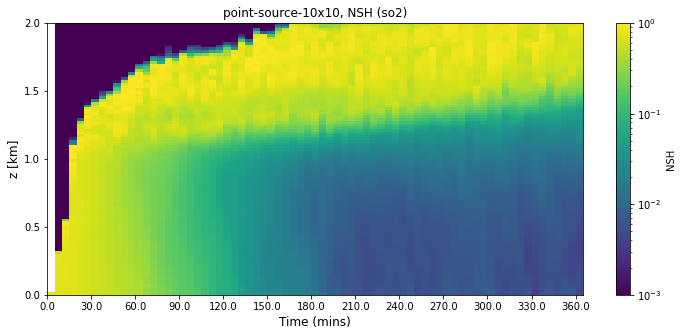

In [46]:
plotNSH(scenario='point-source-10x10', variable='so2', vmin=1e-3, vmax=1, lognorm=True)

o3 not in NSH dictionary for point-source-10x10, calculating


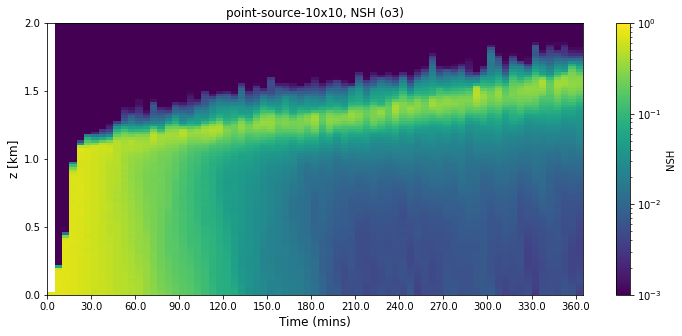

In [47]:
plotNSH(scenario='point-source-10x10', variable='o3', vmin=1e-3, vmax=1, lognorm=True)

ccn_006 not in NSH dictionary for fx1fy0, calculating


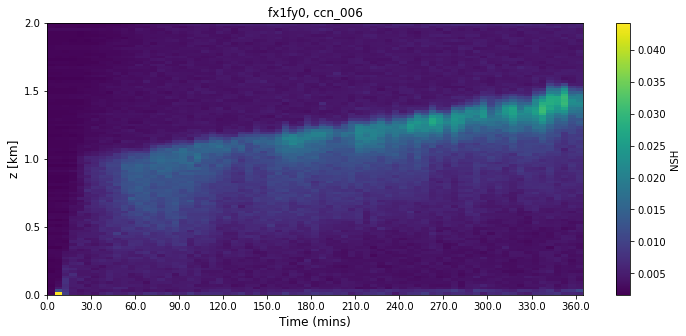

In [43]:
plotNSH(scenario='fx1fy0', variable='ccn_006')

ccn_010 not in NSH dictionary for road-double, calculating


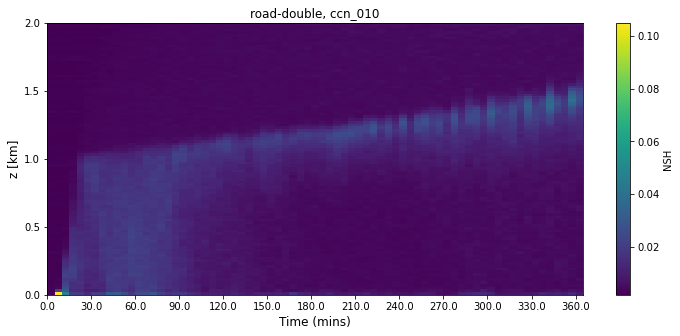

In [10]:
variable = 'ccn_010'
scenario = 'road-double'
plotNSH(scenario, variable)

ccn_006 not in NSH dictionary for basecase, calculating


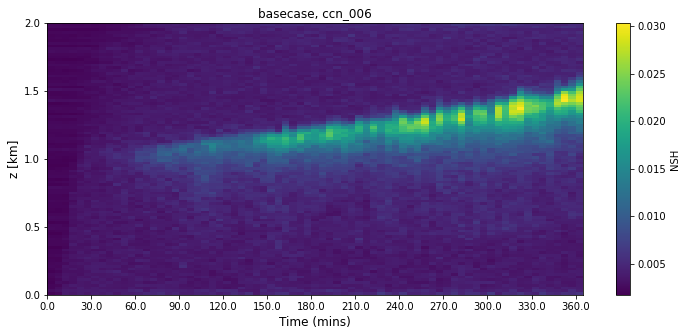

In [44]:
variable = 'ccn_006'
scenario = 'basecase'
plotNSH(scenario, variable)

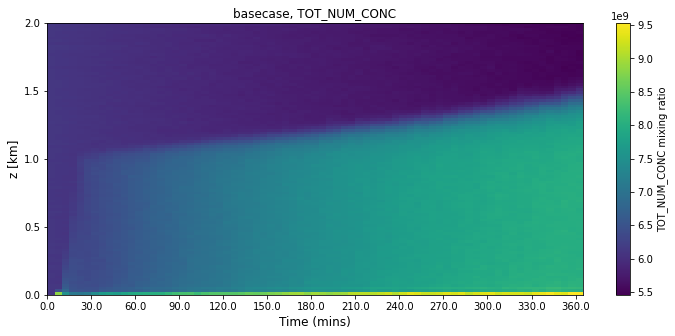

In [21]:
variable = 'TOT_NUM_CONC'
scenario = 'basecase'
plotZT(scenario, variable)

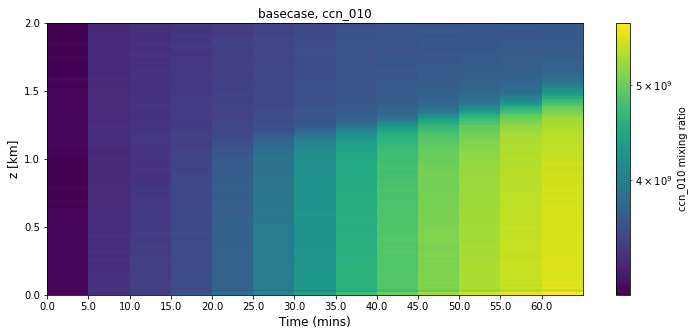

In [19]:
variable = 'ccn_010'
scenario = 'basecase'
plotZT(scenario, variable, #vmin=3e9, vmax=4e9, 
       lognorm=True)

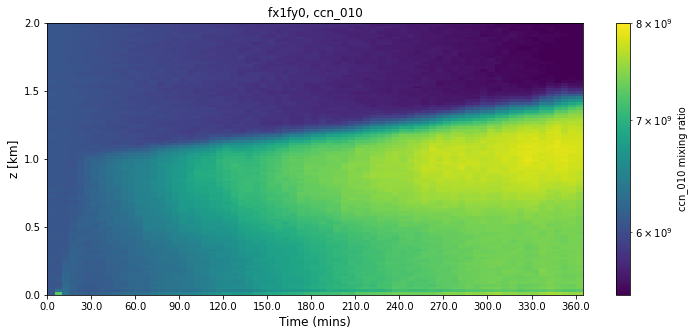

In [168]:
variable = 'ccn_010'
scenario = 'fx1fy0'
plotZT(scenario, variable, vmin=5.5e9, vmax=8e9, lognorm=True)

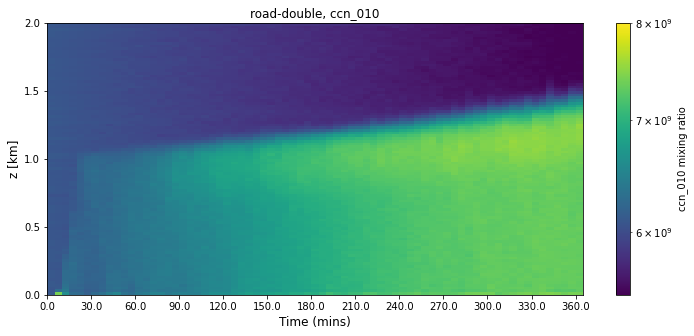

In [11]:
variable = 'ccn_010'
scenario = 'road-double'
plotZT(scenario, variable, vmin=5.5e9, vmax=8e9, lognorm=True)

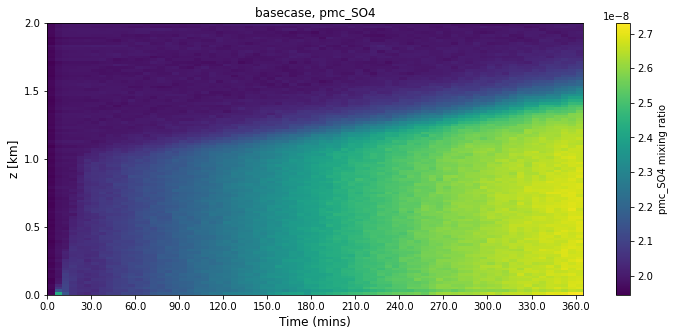

In [16]:
variable = 'pmc_SO4'
scenario = 'basecase'
plotZT(scenario, variable)

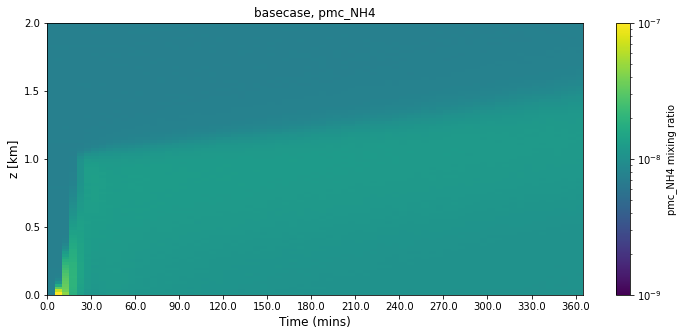

In [15]:
variable = 'pmc_NH4'
scenario = 'basecase'
plotZT(scenario, variable, vmin=1e-9, vmax=1e-7, lognorm=True)

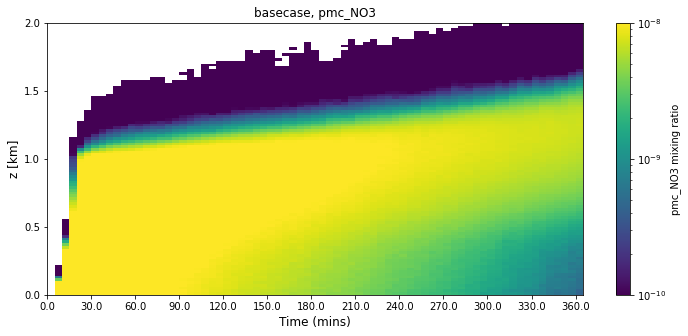

In [14]:
variable = 'pmc_NO3'
scenario = 'basecase'
plotZT(scenario, variable,vmin=1e-10, vmax=1e-8, lognorm=True)

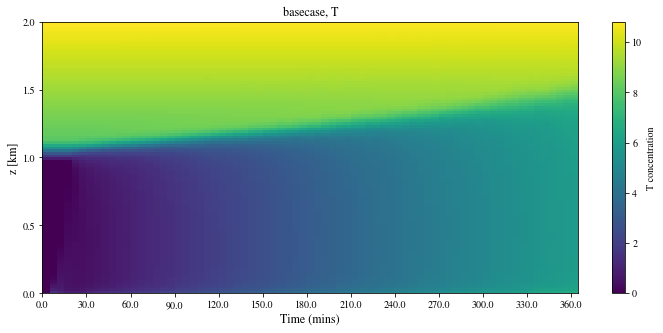

In [83]:
variable = 'T'
scenario = 'basecase'
plotZT(scenario, variable,mixingratio=False)#vmin=1e-10, vmax=1e-8, lognorm=True)

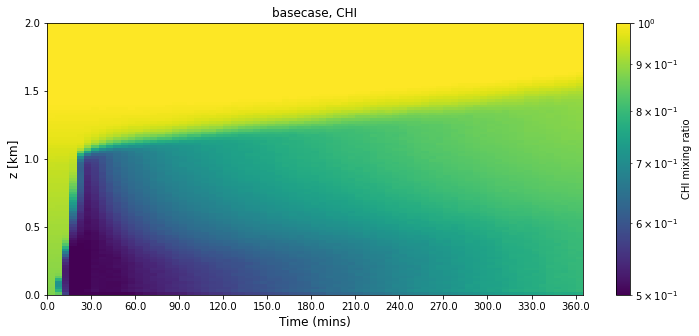

In [89]:
variable = 'CHI'
scenario = 'basecase'
plotZT(scenario, variable, vmin=5e-1, vmax=1, lognorm=True)

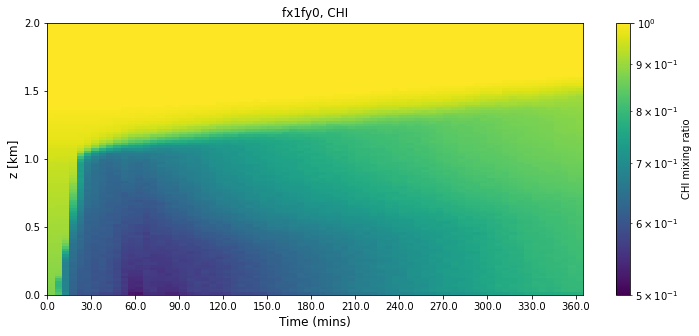

In [88]:
variable = 'CHI'
scenario = 'fx1fy0'
plotZT(scenario, variable, vmin=5e-1, vmax=1, lognorm=True)

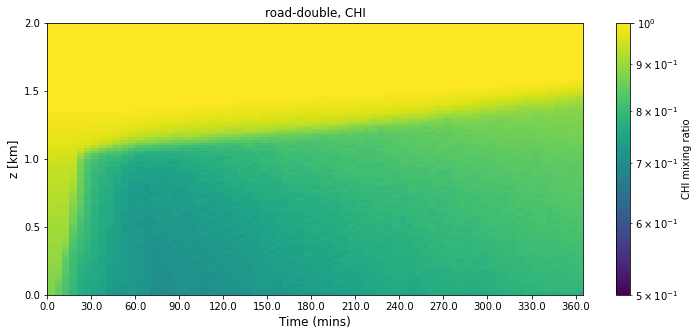

In [12]:
variable = 'CHI'
scenario = 'road-double'
plotZT(scenario, variable, vmin=5e-1, vmax=1, lognorm=True)

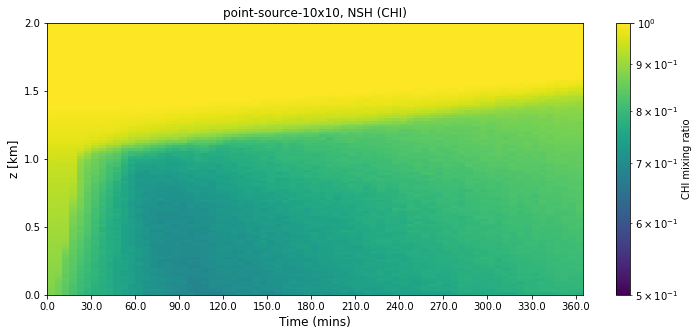

In [24]:
variable = 'CHI'
scenario = 'point-source-10x10'
plotZT(scenario, variable, vmin=5e-1, vmax=1, lognorm=True)

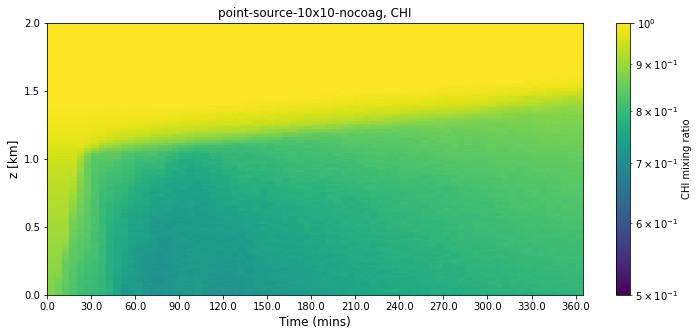

In [31]:
variable = 'CHI'
scenario = 'point-source-10x10-nocoag'
plotZT(scenario, variable, vmin=5e-1, vmax=1, lognorm=True)

In [263]:
nsh_dict['pointsource']['TOT_NUM_CONC'][-1, 20]

0.029134610726106933

TOT_NUM_CONC not in NSH dictionary for pointsource, calculating


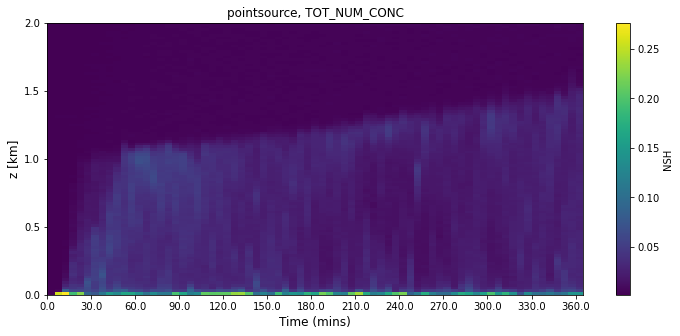

In [257]:
variable = 'TOT_NUM_CONC'
scenario = 'pointsource'
plotNSH(scenario, variable)

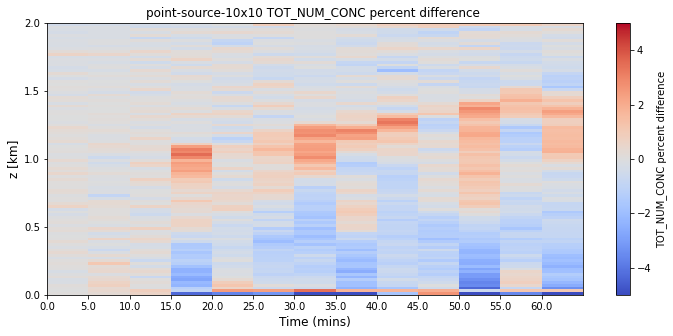

In [22]:
plotVarPercentDiff('point-source-10x10', 'TOT_NUM_CONC', vmin=-5, vmax=5)

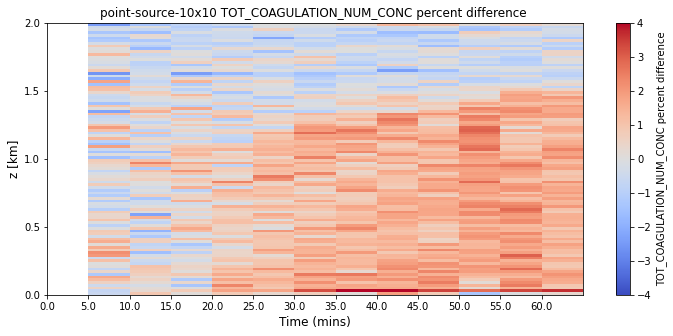

In [38]:
plotVarPercentDiff('point-source-10x10', 'TOT_COAGULATION_NUM_CONC', vmin=-4, vmax=4)

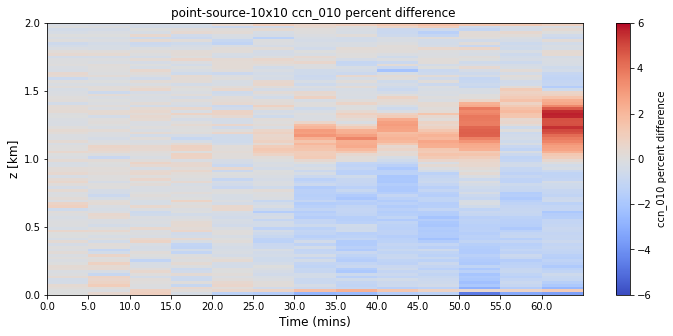

In [33]:
plotVarPercentDiff('point-source-10x10', 'ccn_010', vmin=-6, vmax=6)

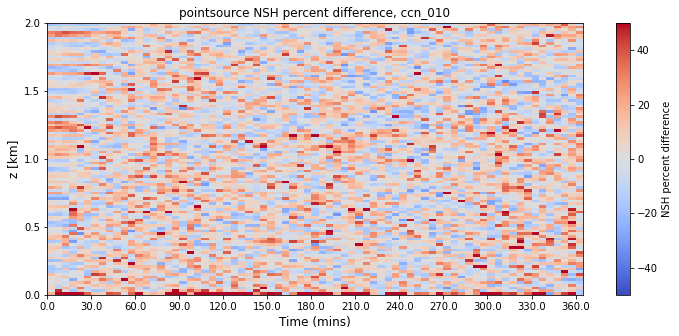

In [145]:
plotNSHPercentDiff(scenario='pointsource', variable='ccn_010', vmin=-50, vmax=50)

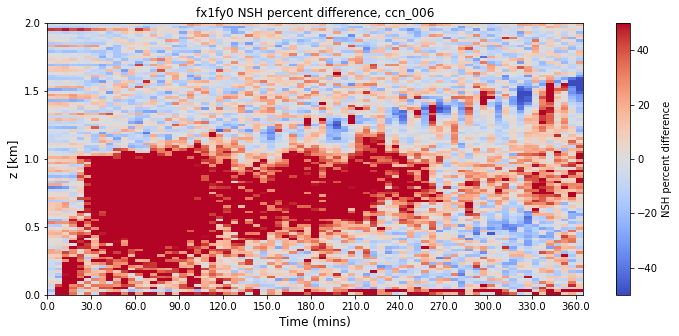

In [48]:
plotNSHPercentDiff(scenario='fx1fy0', variable='ccn_006', vmin=-50, vmax=50)

ccn_006 not in NSH dictionary for road-double, calculating
ccn_006 not in NSH dictionary for basecase, calculating


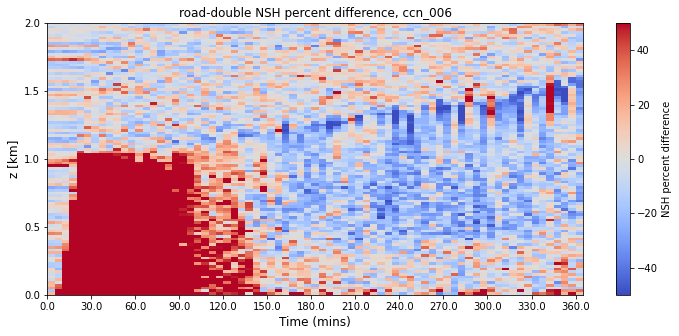

In [13]:
plotNSHPercentDiff(scenario='road-double', variable='ccn_006', vmin=-50, vmax=50)

ccn_006 not in NSH dictionary for point-source-10x10, calculating
ccn_006 not in NSH dictionary for basecase, calculating


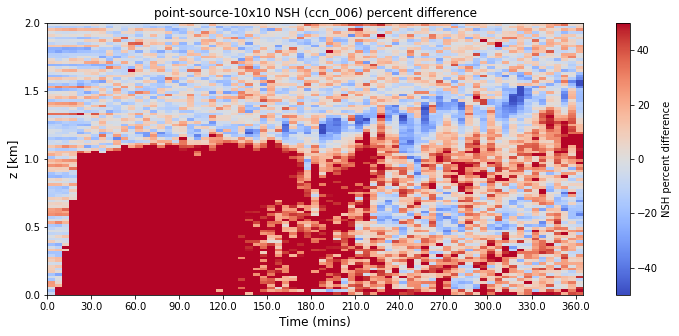

In [27]:
plotNSHPercentDiff(scenario='point-source-10x10', variable='ccn_006', vmin=-50, vmax=50)

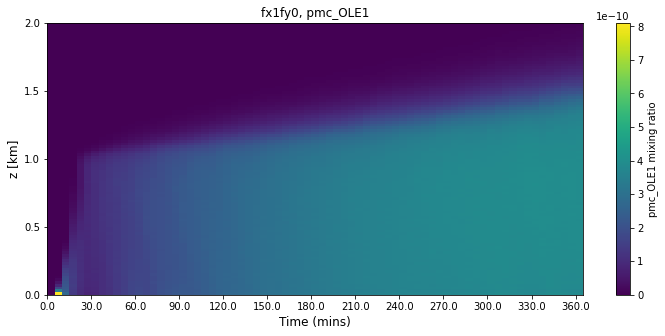

In [150]:
variable = 'pmc_OLE1'#'ccn_010'#'ccn_pr_010_a1'
scenario = 'fx1fy0'
plotZT(scenario, variable, )#vmin=1e-10, vmax=1e-9, lognorm=True, mixingratio=True)

In [ ]:
variable = 'pmc_SO4'#'ccn_010'#'ccn_pr_010_a1'
scenario = 'basecase'
plotZT(scenario, variable, vmin=None, vmax=None, lognorm=False, mixingratio=True)

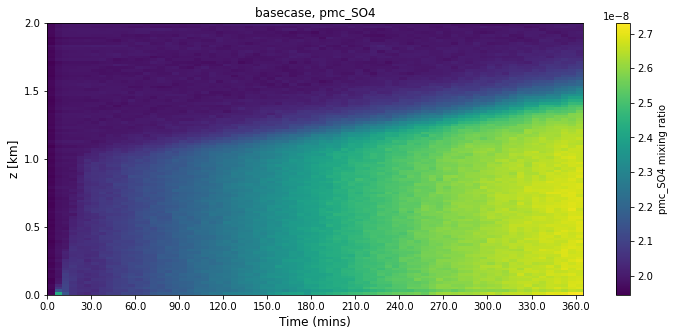

In [14]:
variable = 'pmc_SO4'#'ccn_010'#'ccn_pr_010_a1'
scenario = 'basecase'
plotZT(scenario, variable, vmin=None, vmax=None, lognorm=False, mixingratio=True)

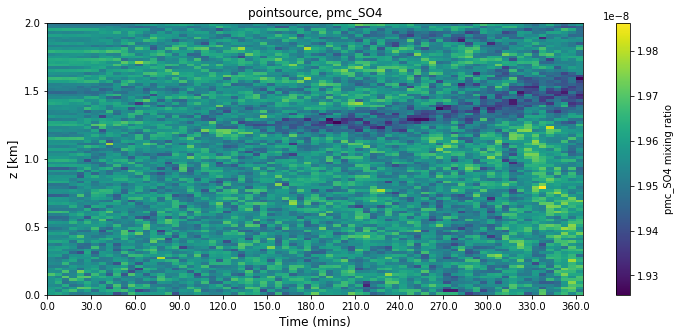

In [150]:
variable = 'pmc_SO4'#'ccn_010'#'ccn_pr_010_a1'
scenario = 'pointsource'
plotZT(scenario, variable, vmin=None, vmax=None, lognorm=False, mixingratio=True)

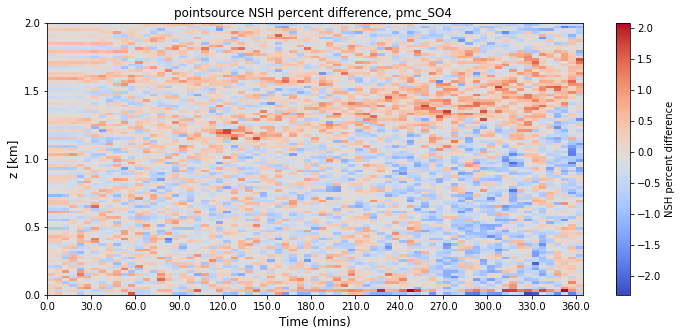

In [161]:
variable = 'pmc_SO4'#'ccn_010'#'ccn_pr_010_a1'
scenario = 'pointsource'
plotVarPercentDiff(scenario, variable, vmin=None, vmax=None, mixingratio=False)

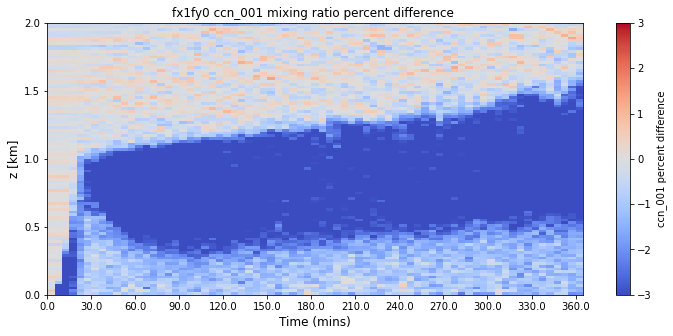

In [17]:
variable = 'ccn_001'#'ccn_pr_010_a1'
scenario = 'fx1fy0'
plotVarPercentDiff(scenario, variable, vmin=-3, vmax=3, mixingratio=True)

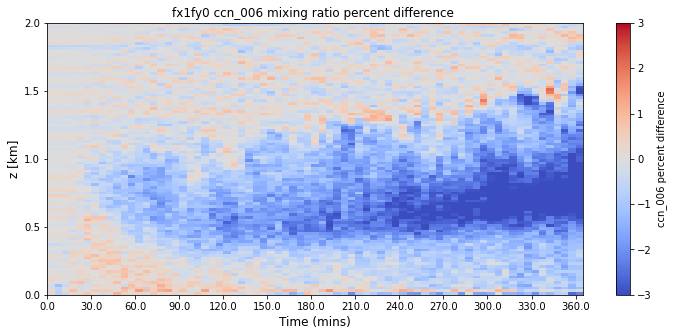

In [57]:
variable = 'ccn_006'#'ccn_pr_010_a1'
scenario = 'fx1fy0'
plotVarPercentDiff(scenario, variable, vmin=-3, vmax=3, mixingratio=True)

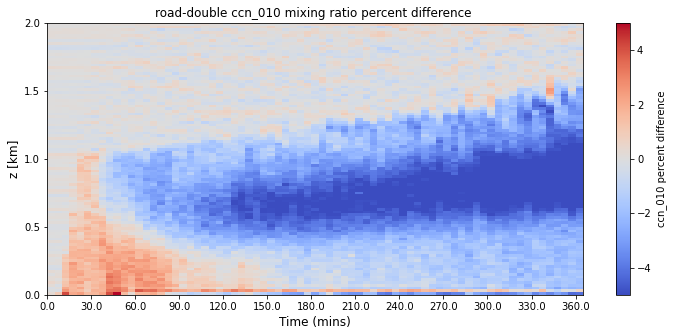

In [18]:
variable = 'ccn_010'#'ccn_pr_010_a1'
scenario = 'road-double'
plotVarPercentDiff(scenario, variable, vmin=-5, vmax=5, mixingratio=True)

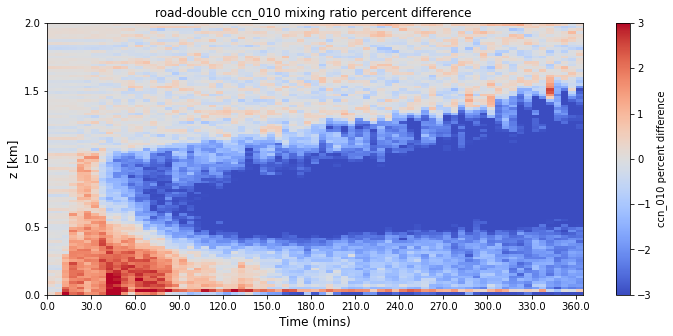

In [24]:
variable = 'ccn_010'#'ccn_pr_010_a1'
scenario = 'road-double'
plotVarPercentDiff(scenario, variable, vmin=-3, vmax=3, mixingratio=True)

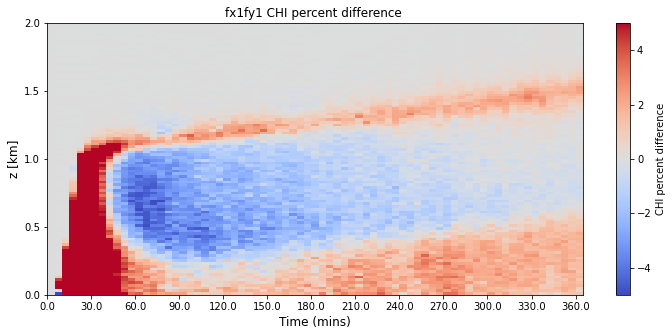

In [91]:
variable = 'CHI'#'ccn_pr_010_a1'
scenario = 'fx1fy1'
plotVarPercentDiff(scenario, variable, vmin=-5, vmax=5, mixingratio=False)

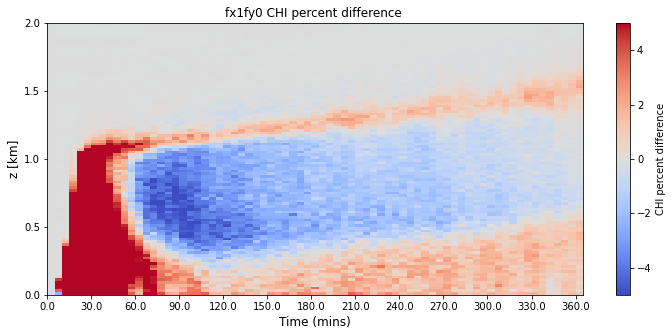

In [81]:
variable = 'CHI'#'ccn_pr_010_a1'
scenario = 'fx1fy0'
plotVarPercentDiff(scenario, variable, vmin=-5, vmax=5, mixingratio=False)

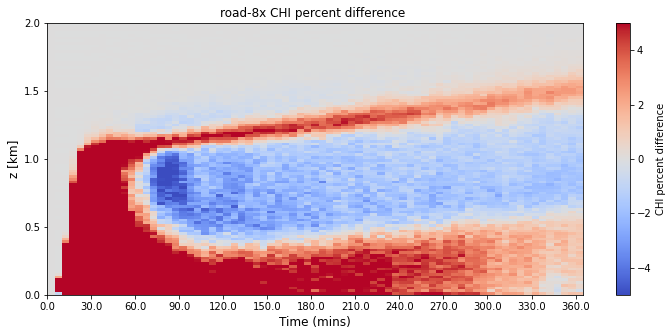

In [92]:
variable = 'CHI'#'ccn_pr_010_a1'
scenario = 'road-8x'
plotVarPercentDiff(scenario, variable, vmin=-5, vmax=5, mixingratio=False)

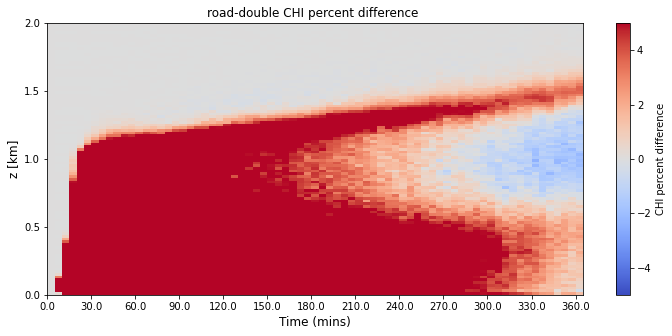

In [43]:
variable = 'CHI'#'ccn_pr_010_a1'
scenario = 'road-double'
plotVarPercentDiff(scenario, variable, vmin=-5, vmax=5, mixingratio=False)

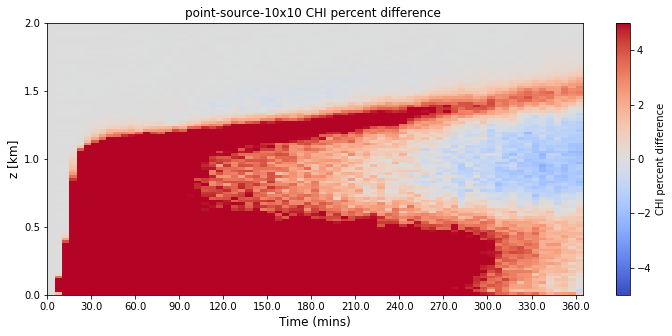

In [28]:
variable = 'CHI'#'ccn_pr_010_a1'
scenario = 'point-source-10x10'
plotVarPercentDiff(scenario, variable, vmin=-5, vmax=5, mixingratio=False)

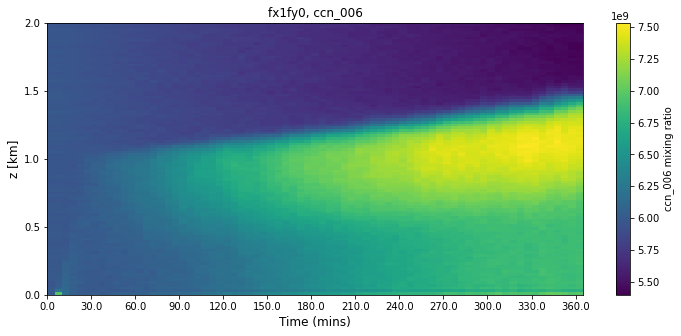

In [61]:
variable = 'ccn_006'#'ccn_pr_010_a1'
scenario = 'fx1fy0'
plotZT(scenario, variable, vmin=None, vmax=None, lognorm=False, mixingratio=True)

Text(0.5, 1.0, 'CCN (S=0.1%)')

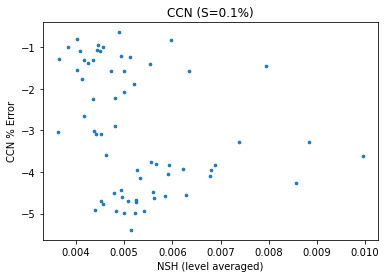

In [42]:
variable = 'ccn_001'#'ccn_pr_010_a1'
scenario = 'fx1fy0'
var_pdiff = calculateVarPercentDiff(scenario, variable,  mixingratio=False)

if variable not in nsh_dict[scenario]:
    print(f'{variable} not in NSH dictionary for {scenario}, calculating')
    nsh_array = calculateNSHTimeSlice(scenario, variable)
else:
    nsh_array = nsh_dict[scenario][variable]

t_start = 72
t_end = 73
z_lower = 0
z_upper = 65
nsh_plot_data = nsh_array[t_start:t_end, z_lower:z_upper].T.flatten()
varpdiff_plot_data = var_pdiff[t_start:t_end, z_lower:z_upper].T.flatten()
plt.scatter(nsh_plot_data, varpdiff_plot_data, s=7)
plt.xlabel('NSH (level averaged)')
plt.ylabel('CCN % Error')
plt.title('CCN (S=0.1%)')

Text(0.5, 1.0, 'CCN (S=0.1%)')

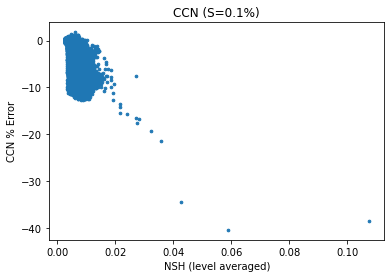

In [19]:
variable = 'ccn_001'#'ccn_pr_010_a1'
scenario = 'road-double'
var_pdiff = calculateVarPercentDiff(scenario, variable,  mixingratio=False)

if variable not in nsh_dict[scenario]:
    print(f'{variable} not in NSH dictionary for {scenario}, calculating')
    nsh_array = calculateNSHTimeSlice(scenario, variable)
else:
    nsh_array = nsh_dict[scenario][variable]

t_start = 0
t_end = 73
z_lower = 0
z_upper = 100
nsh_plot_data = nsh_array[t_start:t_end, z_lower:z_upper].T.flatten()
varpdiff_plot_data = var_pdiff[t_start:t_end, z_lower:z_upper].T.flatten()
plt.scatter(nsh_plot_data, varpdiff_plot_data, s=7)
plt.xlabel('NSH (level averaged)')
plt.ylabel('CCN % Error')
plt.title('CCN (S=0.1%)')

ccn_003 not in NSH dictionary for road-double, calculating


Text(0.5, 1.0, 'CCN (S=0.1%)')

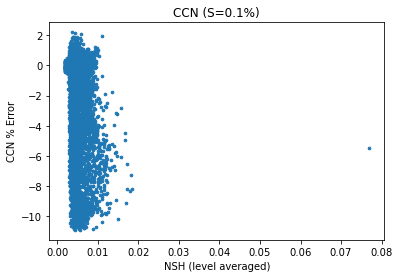

In [20]:
variable = 'ccn_003'#'ccn_pr_010_a1'
scenario = 'road-double'
var_pdiff = calculateVarPercentDiff(scenario, variable,  mixingratio=False)

if variable not in nsh_dict[scenario]:
    print(f'{variable} not in NSH dictionary for {scenario}, calculating')
    nsh_array = calculateNSHTimeSlice(scenario, variable)
else:
    nsh_array = nsh_dict[scenario][variable]

t_start = 0
t_end = 73
z_lower = 0
z_upper = 100
nsh_plot_data = nsh_array[t_start:t_end, z_lower:z_upper].T.flatten()
varpdiff_plot_data = var_pdiff[t_start:t_end, z_lower:z_upper].T.flatten()
plt.scatter(nsh_plot_data, varpdiff_plot_data, s=7)
plt.xlabel('NSH (level averaged)')
plt.ylabel('CCN % Error')
plt.title('CCN (S=0.1%)')

Text(0.5, 1.0, 'CCN (S=1%)')

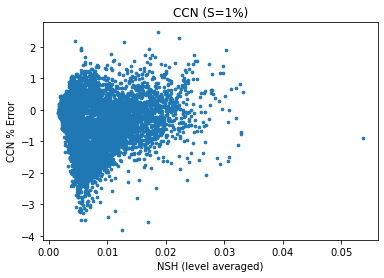

In [177]:
variable = 'ccn_010'#'ccn_pr_010_a1'
scenario = 'fx1fy0'
var_pdiff = calculateVarPercentDiff(scenario, variable,  mixingratio=False)

if variable not in nsh_dict[scenario]:
    print(f'{variable} not in NSH dictionary for {scenario}, calculating')
    nsh_array = calculateNSHTimeSlice(scenario, variable)
else:
    nsh_array = nsh_dict[scenario][variable]

t_start = 0
t_end = 73
z_lower = 0
z_upper = 100
nsh_plot_data = nsh_array[t_start:t_end, z_lower:z_upper].T.flatten()
varpdiff_plot_data = var_pdiff[t_start:t_end, z_lower:z_upper].T.flatten()
plt.scatter(nsh_plot_data, varpdiff_plot_data, s=7)
plt.xlabel('NSH (level averaged)')
plt.ylabel('CCN % Error')
plt.title('CCN (S=1%)')

In [71]:
nsh_array.shape

(73, 100)

Text(0, 0.5, 'SO4 % Error (Scenario 1 vs. Basecase)')

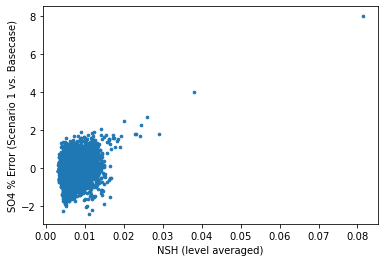

In [67]:
variable = 'pmc_SO4'#'ccn_pr_010_a1'
scenario = 'fx1fy0'
var_pdiff = calculateVarPercentDiff(scenario, variable,  mixingratio=False)

if variable not in nsh_dict[scenario]:
    print(f'{variable} not in NSH dictionary for {scenario}, calculating')
    nsh_array = calculateNSHTimeSlice(scenario, variable)
else:
    nsh_array = nsh_dict[scenario][variable]

plt.scatter(nsh_array.T.flatten(), var_pdiff.T.flatten(), s=7)
plt.xlabel('NSH (level averaged)')
plt.ylabel('SO4 % Error (Scenario 1 vs. Basecase)')

Text(0, 0.5, 'SO4 % Error (Scenario 1 vs. Basecase)')

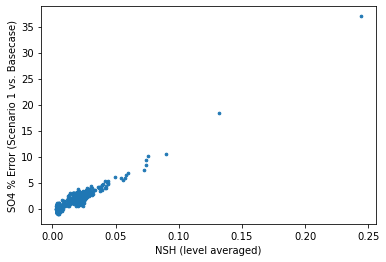

In [39]:
variable = 'pmc_SO4'#'ccn_pr_010_a1'
scenario = 'road-double'
var_pdiff = calculateVarPercentDiff(scenario, variable,  mixingratio=False)

if variable not in nsh_dict[scenario]:
    print(f'{variable} not in NSH dictionary for {scenario}, calculating')
    nsh_array = calculateNSHTimeSlice(scenario, variable)
else:
    nsh_array = nsh_dict[scenario][variable]

t_start = 0
t_end = 12
z_lower = 0
z_upper = 100
nsh_plot_data = nsh_array[t_start:t_end, z_lower:z_upper].T.flatten()
varpdiff_plot_data = var_pdiff[t_start:t_end, z_lower:z_upper].T.flatten()
plt.scatter(nsh_plot_data, varpdiff_plot_data, s=7)
plt.xlabel('NSH (level averaged)')
plt.ylabel('SO4 % Error (Scenario 1 vs. Basecase)')

pmc_NH4 not in NSH dictionary for fx1fy0, calculating


Text(0, 0.5, 'SO4 % Error (Scenario 1 vs. Basecase)')

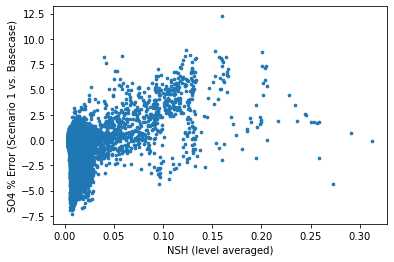

In [68]:
variable = 'pmc_NH4'#'ccn_pr_010_a1'
scenario = 'fx1fy0'
var_pdiff = calculateVarPercentDiff(scenario, variable,  mixingratio=False)

if variable not in nsh_dict[scenario]:
    print(f'{variable} not in NSH dictionary for {scenario}, calculating')
    nsh_array = calculateNSHTimeSlice(scenario, variable)
else:
    nsh_array = nsh_dict[scenario][variable]

plt.scatter(nsh_array.T.flatten(), var_pdiff.T.flatten(), s=7)
plt.xlabel('NSH (level averaged)')
plt.ylabel('SO4 % Error (Scenario 1 vs. Basecase)')

/tmp/ipykernel_167361/3427415913.py:39: RuntimeWarning: invalid value encountered in divide
  rel_diff = 100*(array_scenario - array_basecase)/array_basecase


(-110.0, 100.0)

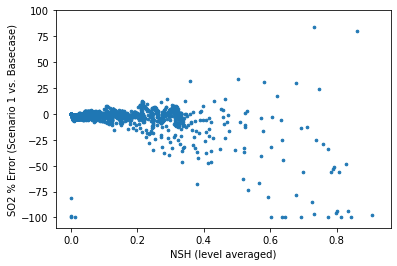

In [131]:
variable = 'so2'#'ccn_pr_010_a1'
scenario = 'fx1fy0'
var_pdiff = calculateVarPercentDiff(scenario, variable,  mixingratio=False)

if variable not in nsh_dict[scenario]:
    print(f'{variable} not in NSH dictionary for {scenario}, calculating')
    nsh_array = calculateNSHTimeSlice(scenario, variable)
else:
    nsh_array = nsh_dict[scenario][variable]

t_start = 0
t_end = 73
z_lower = 0
z_upper = 60
nsh_plot_data = nsh_array[t_start:t_end, z_lower:z_upper].T.flatten()
varpdiff_plot_data = var_pdiff[t_start:t_end, z_lower:z_upper].T.flatten()
plt.scatter(nsh_plot_data, varpdiff_plot_data, s=7)
plt.xlabel('NSH (level averaged)')
plt.ylabel('SO2 % Error (Scenario 1 vs. Basecase)')
plt.ylim(-110, 100)

pmc_SO4 not in NSH dictionary for pointsource, calculating


Text(0, 0.5, 'CCN % Error (Scenario 1 vs. Basecase)')

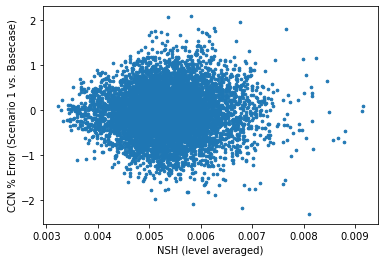

In [167]:
variable = 'pmc_SO4'#'ccn_010'#'ccn_pr_010_a1'
scenario = 'pointsource'
var_pdiff = calculateVarPercentDiff(scenario, variable,  mixingratio=False)

if variable not in nsh_dict[scenario]:
    print(f'{variable} not in NSH dictionary for {scenario}, calculating')
    nsh_array = calculateNSHTimeSlice(scenario, variable)
else:
    nsh_array = nsh_dict[scenario][variable]

plt.scatter(nsh_array.T.flatten(), var_pdiff.T.flatten(), s=7)
plt.xlabel('NSH (level averaged)')
plt.ylabel('CCN % Error (Scenario 1 vs. Basecase)')

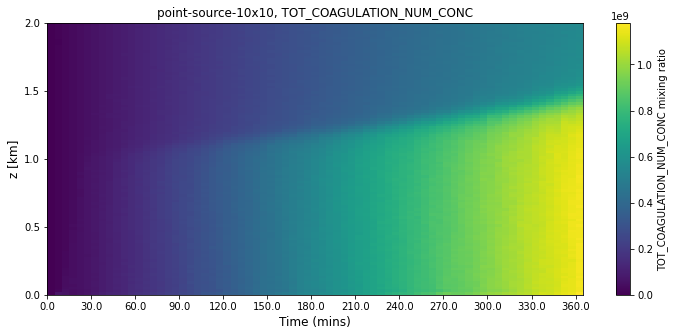

In [13]:
variable = 'TOT_COAGULATION_NUM_CONC'
scenario = 'point-source-10x10'
plotZT(scenario, variable, vmin=None, vmax=None, lognorm=False, mixingratio=True)

Confirming that coagulation was indeed turned off for the `point-source-10x10-nocoag` run.

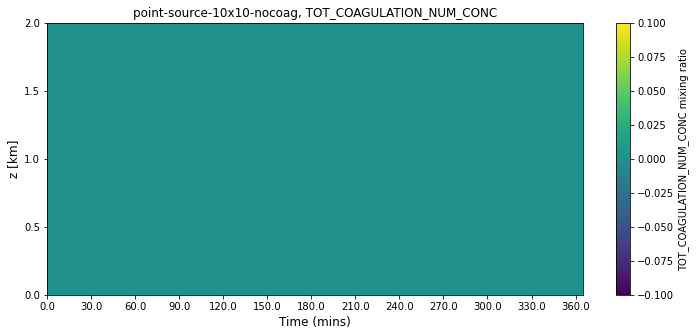

In [14]:
variable = 'TOT_COAGULATION_NUM_CONC'
scenario = 'point-source-10x10-nocoag'
plotZT(scenario, variable, vmin=None, vmax=None, lognorm=False, mixingratio=True)

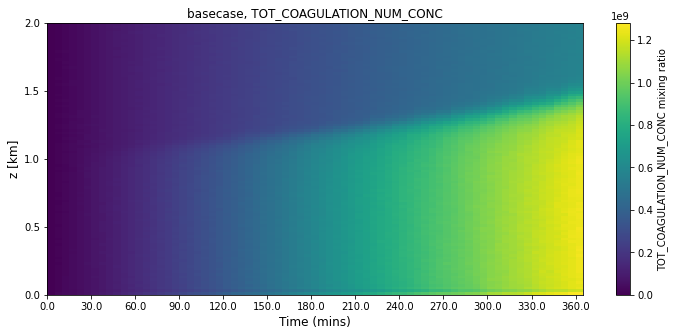

In [170]:
variable = 'TOT_COAGULATION_NUM_CONC'#'TOT_NUM_CONC'#'ccn_pr_010_a1'
scenario = 'basecase'
plotZT(scenario, variable, vmin=None, vmax=None, lognorm=False, mixingratio=True)

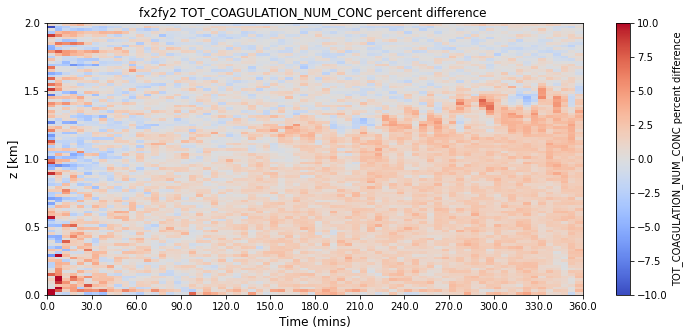

In [10]:
variable = 'TOT_COAGULATION_NUM_CONC'
scenario = 'fx2fy2'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, mixingratio=False, skip_t0=True)

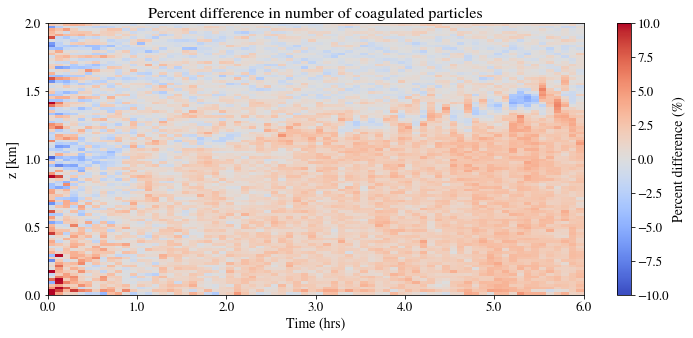

In [38]:
variable = 'TOT_COAGULATION_NUM_CONC'
scenario = 'fx1fy1'
vmin=-10
vmax=10
mixingratio=False
skip_t0=True

rel_diff = calculateVarPercentDiff(scenario, variable, mixingratio, skip_t0)
fig, ax  = plt.subplots(1,1, figsize=(12,5))
cs = ax.pcolormesh(rel_diff.T, cmap=plt.cm.coolwarm, vmin=vmin, vmax=vmax)
cbar = fig.colorbar(cs, label=f'{variable} percent difference')

#ax.set_xlabel('Time (mins)', fontsize=12)
#ax.set_ylabel('z [km]', fontsize=12)
#ax.set_xticks(np.linspace(0, n_times-1, 13))
#ax.set_xticklabels(5*np.linspace(0, n_times-1, 13))
#ax.set_yticks(np.arange(0, n_levels+1, 25))
#ax.set_yticklabels(np.linspace(0, 2, 5).round(2))
if mixingratio:
    mixingratio_str = 'mixing ratio '
else:
    mixingratio_str = ''


cbar.ax.tick_params(labelsize=13) 
cbar.set_label(f'Percent difference (%)', size=14)

n_times = 73
delta_t = 1/12
ax.set_title('Percent difference in number of coagulated particles', fontsize=16)
ax.set_xlabel('Time (hrs)', fontsize=14)
ax.set_ylabel('z [km]', fontsize=14)
ax.set_xticks(np.linspace(0, n_times-1, 7))
ax.set_xticklabels(delta_t*np.linspace(0, n_times-1, 7), fontsize=13)
ax.set_yticks(np.arange(0, n_levels+1, 25))
ax.set_yticklabels(np.linspace(0, 2, 5).round(2), fontsize=13)

plt.savefig(f'./figures/coag-pdiff-fx1fy1.pdf', format='pdf', bbox_inches='tight')


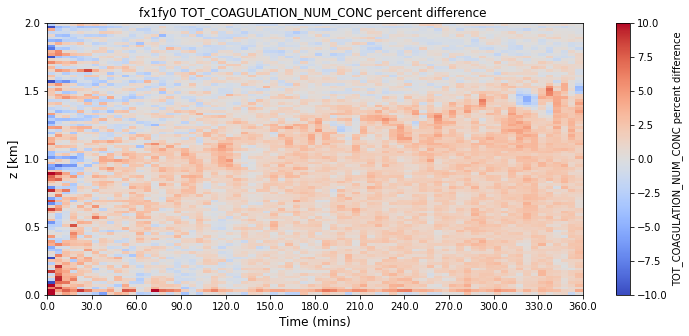

In [28]:
variable = 'TOT_COAGULATION_NUM_CONC'
scenario = 'fx1fy0'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, mixingratio=False, skip_t0=True)

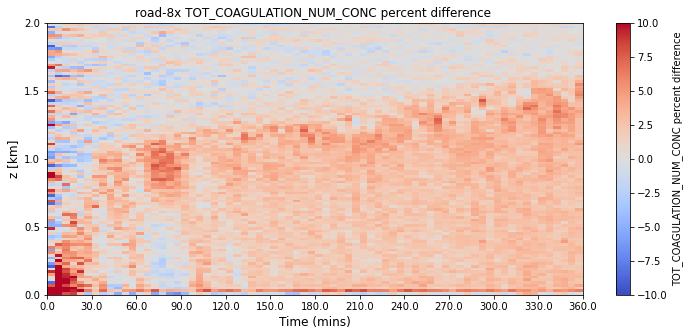

In [45]:
variable = 'TOT_COAGULATION_NUM_CONC'
scenario = 'road-8x'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, mixingratio=False, skip_t0=True)

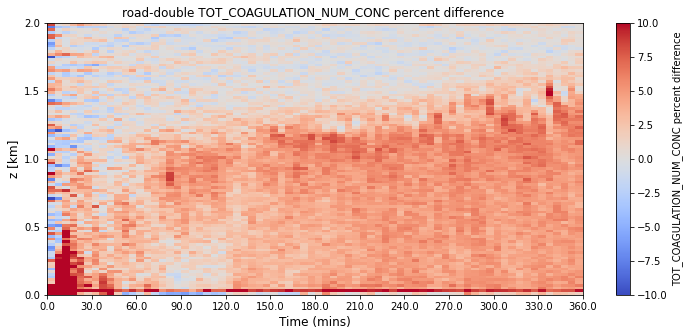

In [27]:
variable = 'TOT_COAGULATION_NUM_CONC'
scenario = 'road-double'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, mixingratio=False, skip_t0=True)

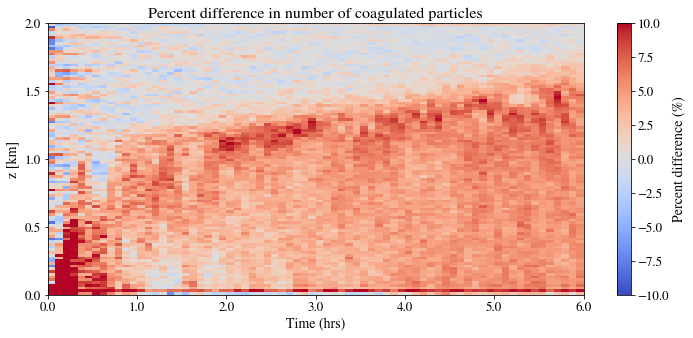

In [11]:
variable = 'TOT_COAGULATION_NUM_CONC'
scenario = 'point-source-10x10'
vmin=-10
vmax=10
mixingratio=False
skip_t0=True

rel_diff = calculateVarPercentDiff(scenario, variable, mixingratio, skip_t0)
fig, ax  = plt.subplots(1,1, figsize=(12,5))
cs = ax.pcolormesh(rel_diff.T, cmap=plt.cm.coolwarm, vmin=vmin, vmax=vmax)
cbar = fig.colorbar(cs, label=f'{variable} percent difference')

#ax.set_xlabel('Time (mins)', fontsize=12)
#ax.set_ylabel('z [km]', fontsize=12)
#ax.set_xticks(np.linspace(0, n_times-1, 13))
#ax.set_xticklabels(5*np.linspace(0, n_times-1, 13))
#ax.set_yticks(np.arange(0, n_levels+1, 25))
#ax.set_yticklabels(np.linspace(0, 2, 5).round(2))
if mixingratio:
    mixingratio_str = 'mixing ratio '
else:
    mixingratio_str = ''


cbar.ax.tick_params(labelsize=13) 
cbar.set_label(f'Percent difference (%)', size=14)

n_times = 73
delta_t = 1/12
ax.set_title('Percent difference in number of coagulated particles', fontsize=16)
ax.set_xlabel('Time (hrs)', fontsize=14)
ax.set_ylabel('z [km]', fontsize=14)
ax.set_xticks(np.linspace(0, n_times-1, 7))
ax.set_xticklabels(delta_t*np.linspace(0, n_times-1, 7), fontsize=13)
ax.set_yticks(np.arange(0, n_levels+1, 25))
ax.set_yticklabels(np.linspace(0, 2, 5).round(2), fontsize=13)

plt.savefig(f'./figures/coag-pdiff-pointsource10x10.pdf', format='pdf', bbox_inches='tight')

In [14]:
tot_conc_dict = {}
min_particle_size = 50
if min_particle_size not in tot_conc_dict:
    tot_conc_dict[min_particle_size] = {}

In [15]:
scenario = 'basecase'
dist_type = 'num'
tot_conc_dict[min_particle_size][scenario] = calcTotConcZT(scenario, dist_type, min_particle_size)

In [16]:
scenario = 'point-source-10x10'
dist_type = 'num'
tot_conc_dict[min_particle_size][scenario] = calcTotConcZT(scenario, dist_type, min_particle_size)

In [17]:
rel_diff = 100*(tot_conc_dict[min_particle_size][scenario] - tot_conc_dict[min_particle_size]['basecase'])/tot_conc_dict[min_particle_size]['basecase']


In [18]:
rel_diff.shape

(73, 100)

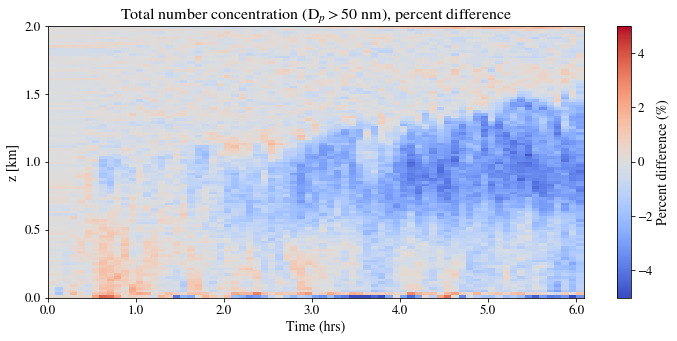

In [21]:
fig, ax  = plt.subplots(1,1, figsize=(12,5))
vmin, vmax = -5, 5
cs = ax.pcolormesh(rel_diff.T, cmap=plt.cm.coolwarm, vmin=vmin, vmax=vmax)
cbar = fig.colorbar(cs)
cbar.ax.tick_params(labelsize=13) 
cbar.set_label(f'Percent difference (%)', size=14)

n_times = rel_diff.shape[0]
delta_t = 1/12
ax.set_title('Total number concentration (D$_p > 50 $ nm), percent difference', fontsize=16)
ax.set_xlabel('Time (hrs)', fontsize=14)
ax.set_ylabel('z [km]', fontsize=14)
ax.set_xticks(np.linspace(0, n_times-1, 7))
ax.set_xticklabels(delta_t*np.linspace(0, n_times-1, 7), fontsize=13)
ax.set_yticks(np.arange(0, n_levels+1, 25))
ax.set_yticklabels(np.linspace(0, 2, 5).round(2), fontsize=13)

plt.savefig(f'./figures/total-numconc-likelytoactivate.pdf', format='pdf', bbox_inches='tight')

In [4]:
i = 20
j = 20
k = 65
scenario = 'basecase'
local_binning = 5
dist_type = 'mass'

n_bins = 100
bins = np.arange(n_bins)
times = np.arange(n_times)

scenario_aerodata = aerodata_dict[scenario]['aerodata']
scenario_distdata = aerodata_dict[scenario]['distdata']

var_array = np.zeros((n_times, n_levels))

bin_edges = scenario_distdata['BIN_EDGES'][:].data[0]#scenario_aerodata['BIN_EDGES'][:].data[0]
bin_centers = scenario_distdata['BIN_CENTERS'][:].data[0]#scenario_aerodata['BIN_CENTERS'][:].data[0]
bin_width = bin_edges[1:] - bin_edges[:-1]
for time_idx in times:
    dist_vals = []
    bin_vals = []
    for bin_idx in bins:
        bin_idx += 1 # 1 indexing 
        if local_binning:
                bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time_idx, k, j-local_binning:j+local_binning, i-local_binning:i+local_binning].data/1e6
                bin_data = bin_data.mean()
        else:
            bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time_idx, k, j, i].data.item()/1e6
        bin_vals.append(bin_data)
        #dist_vals.append(bin_idx)
    var_array[time_idx, :] = bin_vals





Text(0.5, 1.0, 'basecase, Size distribution i=20, j=20, k=10')

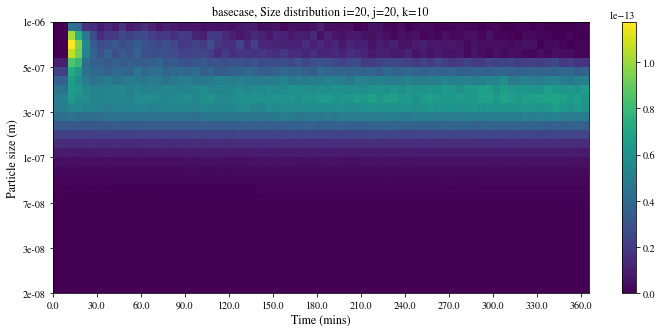

In [57]:
fig, ax  = plt.subplots(1,1, figsize=(12,5))

cs = ax.pcolormesh(var_array.T)


cbar = fig.colorbar(cs, )#abel=f'{variable}')

ax.set_xlabel('Time (mins)', fontsize=12)
ax.set_ylabel('Particle size (m)', fontsize=12)
ax.set_xticks(np.linspace(0, n_times-1, 13))
ax.set_xticklabels(5*np.linspace(0, n_times-1, 13))
ax.set_yticks(np.arange(0, n_bins)[::5])

fmt_bin_centers = [f'{binc:3.0e}' for binc in bin_centers[::5]]
ax.set_yticklabels(fmt_bin_centers)
#ax.set_yscale('log')
ax.set_ylim(20, 50)

ax.set_title(f'{scenario}, Size distribution i={i}, j={j}, k={k}')

In [10]:
aerodata_dict['basecase']['distdata'].variables.keys()

dict_keys(['Times', 'BIN_CENTERS', 'BIN_EDGES', 'num_a001', 'num_a002', 'num_a003', 'num_a004', 'num_a005', 'num_a006', 'num_a007', 'num_a008', 'num_a009', 'num_a010', 'num_a011', 'num_a012', 'num_a013', 'num_a014', 'num_a015', 'num_a016', 'num_a017', 'num_a018', 'num_a019', 'num_a020', 'num_a021', 'num_a022', 'num_a023', 'num_a024', 'num_a025', 'num_a026', 'num_a027', 'num_a028', 'num_a029', 'num_a030', 'num_a031', 'num_a032', 'num_a033', 'num_a034', 'num_a035', 'num_a036', 'num_a037', 'num_a038', 'num_a039', 'num_a040', 'num_a041', 'num_a042', 'num_a043', 'num_a044', 'num_a045', 'num_a046', 'num_a047', 'num_a048', 'num_a049', 'num_a050', 'num_a051', 'num_a052', 'num_a053', 'num_a054', 'num_a055', 'num_a056', 'num_a057', 'num_a058', 'num_a059', 'num_a060', 'num_a061', 'num_a062', 'num_a063', 'num_a064', 'num_a065', 'num_a066', 'num_a067', 'num_a068', 'num_a069', 'num_a070', 'num_a071', 'num_a072', 'num_a073', 'num_a074', 'num_a075', 'num_a076', 'num_a077', 'num_a078', 'num_a079', 'num

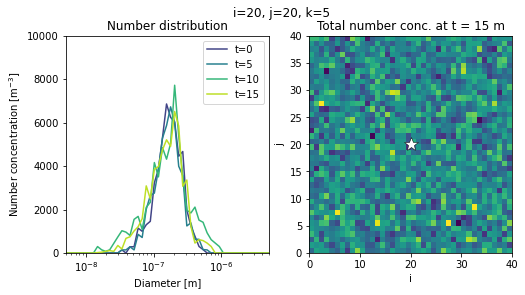

In [19]:
scenario = 'basecase'
i = 20
j = 20
k = 5
plotNumberDist(scenario, i, j, k, ylims=(0, 10000), times=[0, 1, 2, 3], numconctimeidx=3)

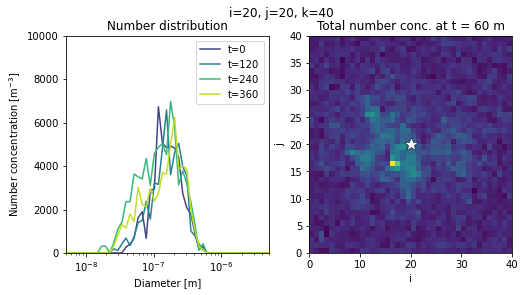

In [48]:
scenario = 'point-source-10x10'
i = 20
j = 20
k = 40
plotNumberDist(scenario, i, j, k, #ylims=(0, 4e4), 
               numconctimeidx=12)

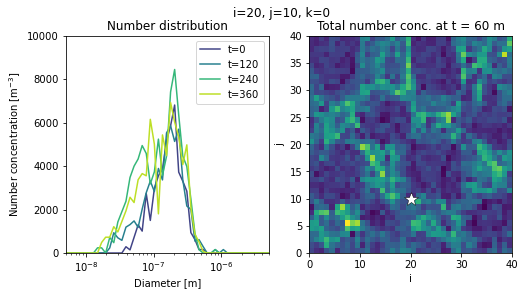

In [19]:
scenario = 'fx2fy2'
i = 20
j = 10
k = 0
plotNumberDist(scenario, i, j, k, ylims=(0, 10000), numconctimeidx=12)

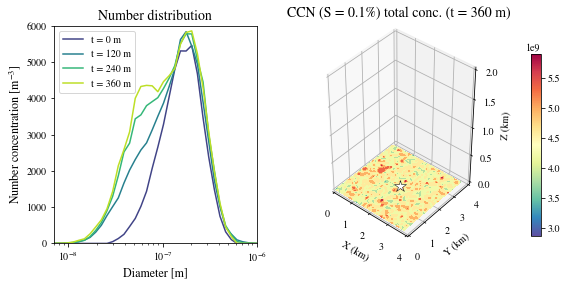

In [206]:
plotDistand3DCrossSec(scenario='basecase', i=20, j=20, k=0, dist_type='num', xlims=(7e-9, 1e-6),#times=[0, 48, 72],
                      ylims=(0, 6000),
                      tot_conc_var='ccn_001', tot_conc_title='CCN (S = 0.1%) total conc.', totconctimeidx=72,
                      savefig=True, local_binning=5, title_size=14, label_size=12
                      )

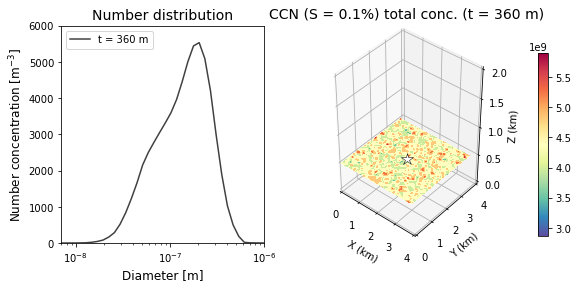

In [16]:
plotDistand3DCrossSec(scenario='basecase', i=20, j=20, k=25, dist_type='num', xlims=(7e-9, 1e-6),#times=[0, 48, 72],
                      ylims=(0, 6000),times=[72], dist_cmap='Greys_r',
                      tot_conc_var='ccn_001', tot_conc_title='CCN (S = 0.1%) total conc.', totconctimeidx=72,
                      savefig=True, local_binning=20, title_size=14, label_size=12
                      )

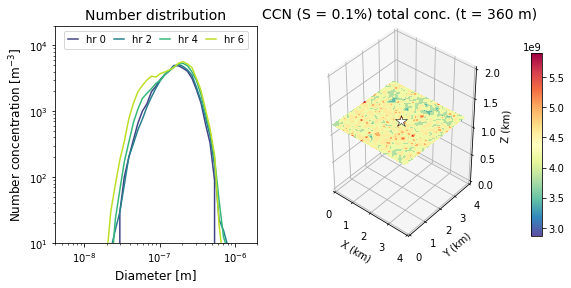

In [128]:
plotDistand3DCrossSec(scenario='basecase', i=20, j=20, k=60, dist_type='num', xlims=(4e-9, 2e-6),#times=[0, 48, 72],
                      ylims=(10, 2e4), yscale='log',legend_loc='upper center',
                      tot_conc_var='ccn_001', tot_conc_title='CCN (S = 0.1%) total conc.', totconctimeidx=72,
                      savefig=True, local_binning=5, title_size=14, label_size=12
                      )

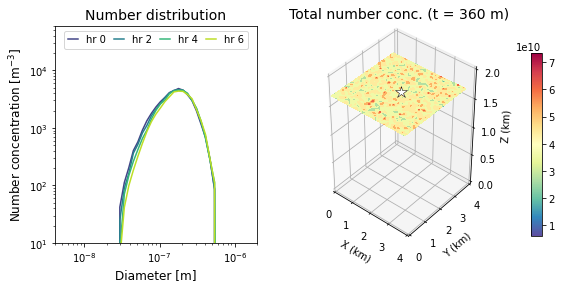

In [134]:
plotDistand3DCrossSec(scenario='point-source-10x10', i=20, j=20, k=85, dist_type='num', xlims=(4e-9, 2e-6),
                      ylims=(10, 6e4), yscale='log', legend_loc='upper center',
                      savefig=True, local_binning=4, title_size=14, label_size=12
                      )

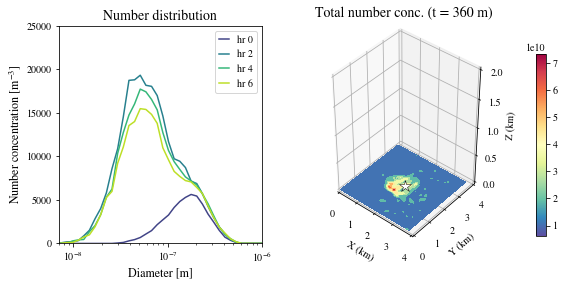

In [168]:
plotDistand3DCrossSec(scenario='point-source-10x10', i=20, j=20, k=0, dist_type='num', xlims=(7e-9, 1e-6),
                      ylims=(0, 25000), yscale='linear', legend_loc='upper right', legend_ncol=1,
                      savefig=True, local_binning=4, title_size=14, label_size=12
                      )

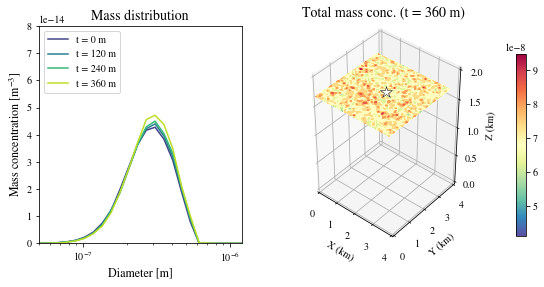

In [241]:
plotDistand3DCrossSec(scenario='basecase', i=20, j=21, k=85, dist_type='mass', 
                      #dist_cmap='coolwarm', dist_cmap_norm_range=(0.2, 1),times=[0, 72],
                      xlims=(5e-8, 1.2e-6),
                      ylims=(0, 8e-14),
                      local_binning=10,
                      #tot_conc_var='ccn_001', tot_conc_title='CCN (S = 0.1%) total conc.', 
                      totconctimeidx=72, lognorm=False, 
                      savefig=True, title_size=14, label_size=12
                      )

In [26]:
def animatecrossectionTime(time_idx):
    #ax.cla()
    ax1.clear()
    ax2.clear()

    x_vals = []
    bin_vals = []
    history_timestep = 5

    for bin_idx in range(100):
        bin_idx += 1 # 1 indexing 
        bin_data = scenario_distdata[f'num_a{str(bin_idx).zfill(3)}'][time_idx, k, j, i].data.item()/1e6
        bin_vals.append(bin_data)
        x_vals.append(bin_idx)

    ax1.plot(scenario_aerodata['BIN_CENTERS'][:].data[0], bin_vals, 
             label=f't={history_timestep*time_idx}', c='k')
    ax1.set_xlim(5e-9, 5e-6)
    ax1.set_ylim(0, 1e4)
    ax1.set_xscale('log')
    ax1.set_ylabel('Number concentration [m$^{-3}$]')
    ax1.set_xlabel('Diameter [m]')
    
    ax1.set_title(f'i={i}, j={j}, k={k}, Time = {history_timestep*time_idx} min')

    X, Y = np.meshgrid(np.arange(40), np.arange(40))

    num_conc_min = scenario_aerodata['TOT_NUM_CONC'][:, :, :, :].min()
    num_conc_max = scenario_aerodata['TOT_NUM_CONC'][:, :, :, :].max()

    ax2.contourf(X, Y, scenario_aerodata['TOT_NUM_CONC'][time_idx, k, :, :], 
                cmap=plt.cm.Spectral_r,
                #norm=mplcolors.LogNorm(vmin=num_conc_min, vmax=num_conc_max), 
                vmin=num_conc_min, vmax=num_conc_max,
                zdir='z',offset=k)
    ax2.plot([i], [j], zs=k, zdir='z', marker='*', c='white', markeredgecolor='k', 
             markeredgewidth=.5, markersize=12, zorder=10)

    nx = scenario_aerodata.dimensions['west_east'].size
    ny = scenario_aerodata.dimensions['south_north'].size
    nz = scenario_aerodata.dimensions['bottom_top'].size
    ax2.set_xlim(0, nx)
    ax2.set_ylim(0, ny)
    ax2.set_zlim(0, nz)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.set_title(f'Total number conc. at t = {history_timestep*time_idx} m', y=1.17, transform=ax2.transAxes)

    N = 1.5  # some number > 1 that stretches z axis as you desire
    ax2.set_box_aspect((1, 1, N))  # xy aspect ratio is 1:1, but stretches z axis
    ax2.view_init(elev=40., azim=-50)
    norm = matplotlib.colors.Normalize(vmin=num_conc_min, vmax=num_conc_max)
    sc = matplotlib.cm.ScalarMappable(cmap=plt.cm.Spectral_r, norm=norm)
    sc.set_array([])
    cax = ax2.inset_axes([1.08,.0, 0.05, 0.9])
    ax2.xaxis._axinfo['label']['space_factor'] = 2.8
    #cax = ax.inset_axes([.1,-.25, 0.8, 0.05]) #horizontal

    plt.colorbar(sc, cax=cax, orientation='vertical', shrink=.75)

#fig, ax =plt.subplots(1, 1, figsize=(7, 7))
fig = plt.figure(figsize=plt.figaspect(.5))

i = 20
j = 10
k = 2

scenario = 'fx1fy0'

scenario_aerodata = aerodata_dict[scenario]['aerodata']
scenario_distdata = aerodata_dict[scenario]['distdata']

ax1 = fig.add_subplot(1, 2, 1)
# Second subplot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

x_vals = []
bin_vals = []

ax1.set_xscale('log')

ax2.set_xlim(0, 40)
ax2.set_ylim(0, 40)

bin_edges = fx1fy0_aerodata['BIN_EDGES'][:].data[0]
bin_width = bin_edges[1:] - bin_edges[:-1]    

ani = animation.FuncAnimation(fig, animatecrossectionTime, np.arange(basecase_aerodata.dimensions['Time'].size)[:5], interval=400) 
ani.save(f'{scenario}_numconc_test_i{i}j{j}k{k}.gif', writer='imagemagick', fps=8, dpi=300)
plt.close()


In [159]:
dist_type = 'num'
times = np.array([0, 24, 48, 72])
history_timestep = 5
local_binning = 4
legend_loc = 'upper center'
i = 20
j = 20
scenario = 'point-source-10x10'


if dist_type == 'num':
    xlims = (7e-9, 1e-6)
    ylims = (0, 7000)
if dist_type == 'mass':
    xlims=(5e-8, 1.2e-6)
    ylims=(0, 8e-14)

def animatecrossectionHeight(k):
    
    #ax.cla()
    ax1.clear()
    ax2.clear()

    x_vals = []
    bin_vals = []

    dist_cmap_name = 'viridis'
    dist_cmap = plt.get_cmap(dist_cmap_name)
    dist_cmap_normrange = (0.2, 0.9)

    #fig = plt.figure(figsize=plt.figaspect(.5))
    #ax = fig.add_subplot(1, 2, 1)

    colors = dist_cmap(np.linspace(dist_cmap_normrange[0], 
                                   dist_cmap_normrange[1], 
                                   times.size))

    for c, time in zip(colors, times):
        x_vals = []
        bin_vals = []

        #bin_edges = scenario_distdata['BIN_EDGES'][:].data[0]
        #bin_width = bin_edges[1:] - bin_edges[:-1]

        for bin_idx in range(100):
            bin_idx += 1 # 1 indexing 
            bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j, i].data.item()/1e6
            if local_binning:
                bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j-local_binning:j+local_binning, i-local_binning:i+local_binning].data/1e6
                bin_data = bin_data.mean()
            bin_vals.append(bin_data)
            x_vals.append(bin_idx)

        ax1.plot(scenario_distdata['BIN_CENTERS'][:].data[0], bin_vals, label=f'hr {(1/60)*5*time:1.0f}',  c=c, lw=1.5)
        ax1.set_xscale('log')

    """
    for bin_idx in range(100):
        bin_idx += 1 # 1 indexing 
        bin_data = scenario_distdata[f'num_a{str(bin_idx).zfill(3)}'][time_idx, k, j, i].data.item()/1e6
        bin_vals.append(bin_data)
        x_vals.append(bin_idx)

    ax1.plot(scenario_aerodata['BIN_CENTERS'][:].data[0], bin_vals, 
             label=f't={history_timestep*time_idx}', c='k')
    """

    ax1.set_xlim(xlims[0], xlims[1])
    ax1.set_ylim(ylims[0], ylims[1])
    ax1.set_xscale('log')
    if dist_type == 'num':
        label = 'Number concentration [m$^{-3}$]'
    if dist_type == 'mass':
        label = 'Mass concentration [$kg\cdot m^{-3}$]'
        t = ax1.yaxis.get_offset_text()
        t.set_x(-.1)
    ax1.set_ylabel(label)
    ax1.set_xlabel('Diameter [m]')
    ax1.legend(loc=legend_loc, handlelength=1, ncol=len(times), columnspacing=0.8)

    totconc_t_idx = 72

    nx = scenario_aerodata.dimensions['west_east'].size
    ny = scenario_aerodata.dimensions['south_north'].size
    nz = scenario_aerodata.dimensions['bottom_top'].size
    domain_width = 4
    domain_height = 2

    ax1.set_title(f'x = {domain_width*i/nx} km, y = {domain_width*j/ny} km, z = {domain_height*k/nz:3.2f} km')

    X, Y = np.meshgrid(np.arange(40), np.arange(40))

    num_conc_min = scenario_aerodata['TOT_NUM_CONC'][:, :, :, :].min()
    num_conc_max = scenario_aerodata['TOT_NUM_CONC'][:, :, :, :].max()

    num_conc_min = 3e9
    num_conc_max = 1.7e10


    ax2.contourf(X, Y, scenario_aerodata['TOT_NUM_CONC'][totconc_t_idx, k, :, :], 
                cmap=plt.cm.Spectral_r,
                #norm=mplcolors.LogNorm(vmin=num_conc_min, vmax=num_conc_max), 
                vmin=num_conc_min, vmax=num_conc_max,
                zdir='z',offset=k)
    ax2.plot([i], [j], zs=k, zdir='z', marker='*', c='white', markeredgecolor='k', 
             markeredgewidth=.5, markersize=12, zorder=10)

    
    ax2.set_xlim(0, nx)
    ax2.set_ylim(0, ny)
    ax2.set_zlim(0, nz)
    
    ax2.set_xlabel('X (km)')
    ax2.set_ylabel('Y (km)')
    ax2.set_zlabel('Z (km)')

    ax2.set_xticks(np.linspace(0, nx+1, 5))
    ax2.set_xticklabels(np.linspace(0, 4, 5).astype(int))
    ax2.set_yticks(np.linspace(0, ny+1, 5))
    ax2.set_yticklabels(np.linspace(0, 4, 5).astype(int))
    ax2.set_zticks(np.linspace(0, nz+1, 5))
    ax2.set_zticklabels(np.linspace(0, 2, 5))

    if dist_type == 'num':
        title = 'Total number conc.'
    if dist_type == 'mass':
        title = 'Total mass conc.'
    ax2.set_title(f'{title} at t = {history_timestep*totconc_t_idx} m', 
                  y=1.17, transform=ax2.transAxes)

    N = 1.5  # some number > 1 that stretches z axis as you desire
    ax2.set_box_aspect((1, 1, N))  # xy aspect ratio is 1:1, but stretches z axis
    ax2.view_init(elev=40., azim=-50)
    norm = matplotlib.colors.Normalize(vmin=num_conc_min, vmax=num_conc_max)
    sc = matplotlib.cm.ScalarMappable(cmap=plt.cm.Spectral_r, norm=norm)
    sc.set_array([])
    cax = ax2.inset_axes([1.08,.0, 0.05, 0.9])
    ax2.xaxis._axinfo['label']['space_factor'] = 2.8
    #cax = ax.inset_axes([.1,-.25, 0.8, 0.05]) #horizontal

    plt.colorbar(sc, cax=cax, orientation='vertical', shrink=.75)

#fig, ax =plt.subplots(1, 1, figsize=(7, 7))
fig = plt.figure(figsize=plt.figaspect(.5))


scenario_aerodata = aerodata_dict[scenario]['aerodata']
scenario_distdata = aerodata_dict[scenario]['distdata']

ax1 = fig.add_subplot(1, 2, 1)
# Second subplot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

x_vals = []
bin_vals = []

ax1.set_xscale('log')

ax2.set_xlim(0, 40)
ax2.set_ylim(0, 40)

#bin_edges = fx1fy0_aerodata['BIN_EDGES'][:].data[0]
#bin_width = bin_edges[1:] - bin_edges[:-1]    

ani = animation.FuncAnimation(fig, animatecrossectionHeight, np.arange(basecase_aerodata.dimensions['bottom_top'].size), interval=400) 
ani.save(f'{scenario}_{dist_type}conc-vert-anim.gif', writer='imagemagick', fps=8, dpi=300)
plt.close()


In [20]:
basecase_aerodata.dimensions['Time'].size

73

[Text(0.0, 0, '0.0'),
 Text(12.0, 0, '1.0'),
 Text(24.0, 0, '2.0'),
 Text(36.0, 0, '3.0'),
 Text(48.0, 0, '4.0'),
 Text(60.0, 0, '5.0'),
 Text(72.0, 0, '6.0')]

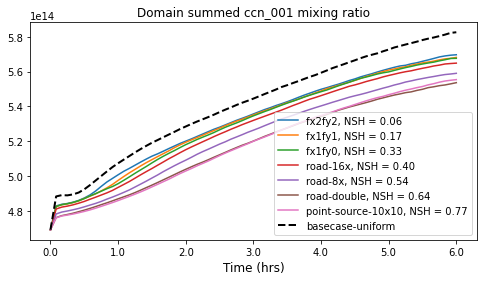

In [24]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))
#variable='pmc_NH4'
#variable='pmc_SO4'
#variable='h2so4'
variable='ccn_001'
for scenario_name in emissions_nsh_dict.keys():
    scenario_data = aerodata_dict[scenario_name]['aerodata']
    var_data = scenario_data[variable][:]
    inverse_airdens = aerodata_dict[scenario_name]['aerodata']['ALT'][:]
    var_data_mr = inverse_airdens*var_data
    nsh_val = emissions_nsh_dict[scenario_name]
    ax.plot(var_data_mr[:].sum(axis=3).sum(axis=2).sum(axis=1), label=f'{scenario_name}, NSH = {nsh_val:3.2f}')
var_data_mr = inverse_airdens*aerodata_dict['basecase']['aerodata'][variable]
ax.plot(var_data_mr[:].sum(axis=3).sum(axis=2).sum(axis=1), 
        label=f'basecase-uniform', c='k', lw=2, ls='--')
ax.legend()
ax.set_title(f'Domain summed {variable} mixing ratio')
ax.set_xlabel('Time (hrs)', fontsize=12)
ax.set_xticks(np.linspace(0, n_times-1, 7))
ax.set_xticklabels((1/12)*np.linspace(0, n_times-1, 7))

[Text(0.0, 0, '0.0'),
 Text(12.0, 0, '1.0'),
 Text(24.0, 0, '2.0'),
 Text(36.0, 0, '3.0'),
 Text(48.0, 0, '4.0'),
 Text(60.0, 0, '5.0'),
 Text(72.0, 0, '6.0')]

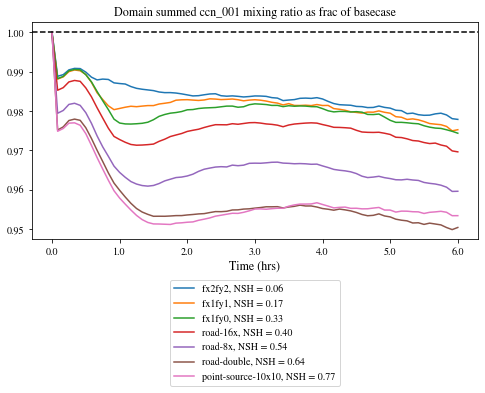

In [45]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))
#variable='pmc_NO3'
#variable='pmc_SO4'
variable='ccn_001'
#variable='h2so4'
for scenario_name in emissions_nsh_dict.keys():
    basecase_data = aerodata_dict['basecase']['aerodata']
    basecase_var_data = basecase_data[variable][:]
    basecase_inverse_airdens = basecase_data['ALT'][:]
    basecase_var_data_mr = basecase_inverse_airdens*basecase_var_data
    basecase_var_total = basecase_var_data_mr[:].sum(axis=3).sum(axis=2).sum(axis=1)

    scenario_data = aerodata_dict[scenario_name]['aerodata']
    var_data = scenario_data[variable][:]
    inverse_airdens = aerodata_dict[scenario_name]['aerodata']['ALT'][:]
    var_data_mr = inverse_airdens*var_data
    scenario_var_total = var_data_mr[:].sum(axis=3).sum(axis=2).sum(axis=1)

    ratio = scenario_var_total/basecase_var_total
    nsh_val = emissions_nsh_dict[scenario_name]
    ax.plot(ratio, label=f'{scenario_name}, NSH = {nsh_val:3.2f}')
ax.legend(bbox_to_anchor=(.5, -.43), loc='center')
ax.axhline(y=1.0, xmin=0, xmax=1, ls='--', c='k')
ax.set_title(f'Domain summed {variable} mixing ratio as frac of basecase')

ax.set_xlabel('Time (hrs)', fontsize=12)
ax.set_xticks(np.linspace(0, n_times-1, 7))
ax.set_xticklabels((1/12)*np.linspace(0, n_times-1, 7))

Calculating boxplot data for ccn_001


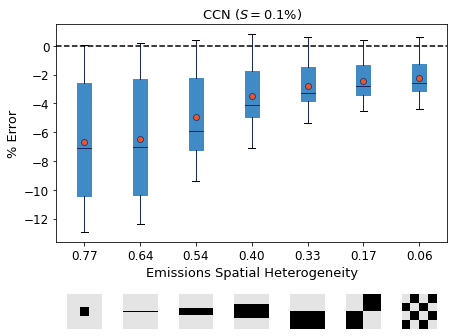

In [15]:
plotCCNError(variable='ccn_001', absolute=False)
#plotCCNError(variable='ccn_001', absolute=True)

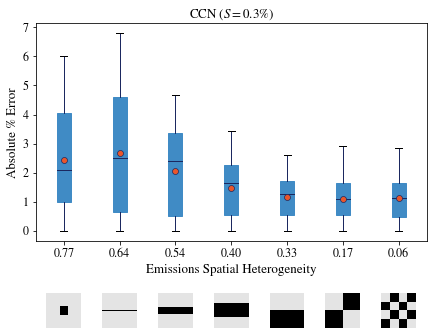

In [35]:
plotCCNError(variable='ccn_003', absolute=False)
#plotCCNError(variable='ccn_003', absolute=True)

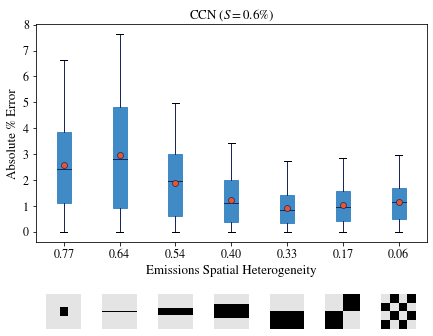

In [37]:
plotCCNError(variable='ccn_006', absolute=False)
#plotCCNError(variable='ccn_006', absolute=True)

Calculating boxplot data for ccn_010


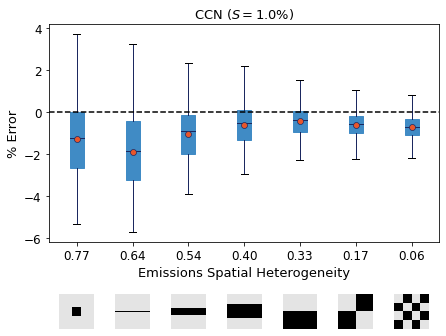

In [16]:
plotCCNError(variable='ccn_010', absolute=False)
#plotCCNError(variable='ccn_010', absolute=True)